# Tobias's Loading Simulation Analysis & Plotting

Tobias did all the simulation data here, I'm just using data he gave me.

In [1]:
import numpy as np
from numpy import array as arr
from matplotlib.pyplot import *
%matplotlib inline
from fitters import linear

In [2]:
import matplotlib as mpl
mpl.rc('font', family='cmr10') 
mpl.rcParams['mathtext.fontset'] = 'cm'
#mpl.rc('font', serif='Helvetica Neue') 
mpl.rc('font', size=9) 
mpl.rcParams['axes.unicode_minus'] = False

## tobias's data

In [3]:
pd1=[6, 8, 5, 4, 5, 2, 5, 6, 3, 6, 1, 2, 1, 4, 2, 1, 5, 7, 5, 9, 8, 6, 2,5, 6, 4, 8, 3, 4, 7, 6, 4, 4, 7, 5, 3, 3, 1, 6, 4, 4, 5, 8, 4, 5, 1,3, 4, 5, 3, 4, 5, 5, 5, 6, 2, 1, 7, 4, 4, 2, 4, 5, 4, 4, 3, 6, 7, 4,4, 9, 2, 6, 5, 4, 6, 3, 6, 3, 6, 3, 6, 5, 5, 2, 4, 5, 8, 1, 7, 4, 10,7, 1, 3, 8, 5, 6, 2, 7, 1, 7, 3, 5, 4, 4, 1, 6, 4, 5, 4, 3, 4, 5, 12,5, 5, 3, 3, 6, 3, 4, 7, 7, 3, 3, 5, 6, 10, 6, 5, 7, 3, 5, 3, 8, 7, 7,3, 2, 3, 5, 2, 1, 4, 5, 4, 2, 5, 8, 3, 5, 6, 5, 4, 7, 3, 3, 7, 5, 3,6, 3, 4, 4, 5, 4, 5, 5, 3, 2, 8, 4, 4, 8, 5, 8, 3, 2, 7, 2, 9, 5, 5,4, 4, 4, 8, 3, 5, 6, 4, 4, 6, 1, 5, 3, 4, 4, 6, 2, 2, 6, 4, 4, 5, 6,3, 5, 2, 2, 4, 7, 8, 3, 2, 4, 3, 3, 7, 4, 3, 3, 4, 3, 5, 9, 2, 5, 3,1, 3, 4, 3, 6, 4, 3, 4, 5, 2, 4, 5, 8, 7, 8, 7, 4, 4, 4, 3, 3, 5, 6,6, 6, 4, 5, 6, 4, 2, 0, 2, 6, 3, 5, 6, 6, 5, 5, 8, 3, 6, 9, 6, 6, 4,3, 4, 6, 6, 5, 11, 3, 4, 5, 5, 5, 10, 3, 2, 3, 4, 6, 4, 6, 9, 6, 3,4, 4, 1, 4, 7, 7, 3, 2, 1, 3, 4, 8, 5, 6, 6, 4, 6, 4, 1, 6, 2, 6, 7,7, 7, 6, 4, 3, 4, 6, 6, 4, 4, 4, 7, 3, 6, 4, 4, 3, 4, 3, 4, 4, 5, 6,2, 4, 3, 5, 4, 4, 7, 5, 3, 5, 7, 6, 7, 7, 1, 5, 3, 5, 5, 7, 6, 7, 7,8, 2, 6, 4, 7, 9, 3, 3, 2, 2, 3, 11, 4, 6, 6, 2, 1, 5, 13, 7, 2, 2,3, 3, 4, 8, 3, 11, 6, 2, 5, 7, 5, 7, 5, 11, 1, 3, 6, 6, 5, 5, 3, 6,4, 11, 6, 6, 1, 8, 9, 10, 6, 0, 0, 7, 1, 4, 4, 3, 4, 1, 7, 3, 5, 4,7, 6, 4, 6, 4, 11, 8, 4, 3, 9, 5, 5, 8, 8, 4, 6, 2, 7, 4, 6, 5, 5, 7,6, 3, 3, 3, 3, 4, 3, 5, 6, 4, 5, 2, 3, 4, 7, 3, 4, 4, 8, 2, 8, 4, 6,4, 4, 3, 3, 4, 12, 6, 3, 7, 8, 8, 9, 9, 5, 6, 3, 5, 4, 3, 4, 1, 5, 3,11, 2, 4, 4, 2, 5, 4, 5, 5, 4, 6, 3, 6, 6, 4, 2, 6, 3, 6, 3, 4, 4, 2,3, 2, 5, 3, 10, 5, 8, 8, 8, 6, 8, 6, 4, 5, 3, 3, 7, 4, 4, 4, 4, 5, 4,4, 6, 2, 4, 4, 6, 9, 3, 1, 6, 7, 3, 5, 2, 6, 7, 5, 2, 5, 7, 3, 3, 5,4, 7, 7, 6, 4, 3, 4, 6, 4, 5, 2, 5, 2, 5, 5, 4, 9, 3, 3, 6, 9, 7, 8,5, 4, 7, 2, 7, 2, 5, 1, 5, 10, 6, 6, 4, 7, 4, 4, 4, 3, 6, 4, 5, 10,4, 4, 5, 5, 6, 4, 4, 1, 5, 3, 7, 5, 5, 5, 5, 5, 2, 6, 1, 7, 2, 5, 2,6, 6, 5, 3, 4, 6, 6, 3, 5, 5, 5, 5, 2, 8, 5, 5, 6, 3, 5, 4, 1, 3, 5,5, 2, 5, 2, 2, 5, 10, 3, 5, 8, 2, 5, 6, 5, 6, 1, 9, 5, 8, 7, 6, 4, 3,2, 3, 8, 6, 6, 4, 7, 6, 5, 6, 4, 5, 4, 6, 3, 3, 6, 6, 3, 5, 6, 5, 8,6, 5, 3, 1, 4, 2, 6, 4, 7, 8, 3, 4, 6, 4, 5, 3, 5, 2, 5, 5, 2, 2, 6,6, 7, 8, 7, 2, 8, 2, 7, 3, 4, 3, 7, 3, 2, 4, 6, 6, 4, 4, 5, 3, 6, 6,9, 2, 2, 5, 6, 7, 11, 8, 4, 1, 3, 3, 2, 4, 3, 5, 3, 7, 8, 5, 9, 7, 9,2, 3, 8, 7, 2, 2, 7, 2, 5, 3, 8, 5, 6, 6, 6, 4, 6, 5, 5, 2, 7, 10,10, 1, 3, 4, 6, 2, 8, 2, 2, 7, 2, 3, 3, 7, 8, 4, 7, 2, 2, 7, 6, 2, 4,3, 1, 6, 8, 5, 5, 5, 4, 4, 7, 2, 5, 5, 9, 6, 5, 2, 2, 6, 9, 5, 7, 2,6, 4, 8, 7, 2, 6, 5, 3, 8, 4, 8, 2, 4, 3, 4, 6, 7, 4, 5, 4, 6, 5, 5,4, 3, 8, 1, 10, 7, 4, 4, 4, 4, 3, 10, 1, 4, 2, 3, 5, 5, 7, 2, 4, 6,4, 5, 6, 2, 3, 4, 2, 6, 5, 3, 6, 3, 6, 9, 5, 5, 5, 6, 2, 7, 7, 4, 7,4, 5, 4, 6, 5, 9, 7, 8, 4, 5, 3, 4, 3, 7, 2, 6, 7, 4, 3, 5, 9, 3, 6,3, 5, 5, 5, 5, 5, 4, 2, 1, 1, 2, 3, 2, 4, 3, 7, 5, 6, 4, 1, 5, 4, 7,9, 8, 8, 7, 10, 4, 4, 3, 4, 5, 2, 6, 6, 2, 6, 4, 6, 5, 7, 7, 2, 7, 4,2, 6, 5, 3, 6, 9, 2, 3, 9, 7, 2, 3, 6, 7, 5, 10, 4, 5, 0, 4, 2, 6, 8,2, 4, 8, 5, 2, 3, 3, 8, 5, 3, 6, 9, 5, 9, 7, 3, 6, 3, 11, 3, 3, 3, 8,2, 3, 8, 6, 2, 6, 3, 6, 4, 8, 11, 5, 5, 6, 7, 1, 9, 2, 4, 7, 8, 5, 2,5, 6, 4, 7, 8, 3, 2, 5, 6, 5, 4, 6, 9, 3, 2, 2, 8, 9, 8, 1, 0, 9, 3,4, 7, 5, 2, 5, 7, 6, 5, 8, 4, 7, 5, 7, 3, 7, 8, 1, 7, 5, 6, 6, 10, 4,6, 3, 6, 9, 8, 7, 4, 5, 5, 5, 3, 4, 6, 1, 7, 2, 1, 4, 7, 7, 3, 2, 2,1, 5, 7, 2, 4, 2, 7, 3, 5, 3, 4, 5, 5, 6, 5, 3, 5, 7, 7, 2, 6, 5, 2,5, 5, 4, 6, 7, 5, 5, 5, 5, 4, 5, 7, 10, 2, 4, 3, 5, 7, 7, 5, 4, 7, 7,6, 4, 3, 6, 10, 7, 6, 5, 6, 6, 9, 4, 5, 3, 0, 6, 2, 6, 3, 3, 2, 5, 5,5, 5, 5, 5, 9, 4, 4, 3, 3, 10, 3, 3, 10, 2, 3, 6, 4, 3, 6, 6, 6, 7,4, 5, 7, 7, 4, 7, 4, 4, 4, 2, 5, 5, 6, 3, 0, 3, 4, 7, 5, 5, 3, 7, 4,4, 5, 4, 3, 1, 7, 6, 8, 6, 4, 4, 3, 5, 4, 4, 2, 5, 3, 5, 7, 3, 6, 2,7, 4, 6, 6, 6, 3, 7, 9, 12, 6, 3, 8, 2, 5, 4, 5, 6, 5, 3, 4, 6, 4, 6,3, 4, 1, 7, 2, 3, 3, 6, 5, 4, 4, 7, 6, 5, 7, 2, 9, 3, 5, 6, 2, 4, 3,6, 2, 2, 4, 4, 3, 7, 7, 4, 4, 5, 3, 8, 8, 6, 5, 2, 5, 2, 4, 5, 2, 3,8, 5, 4, 6, 7, 2, 6, 5, 3, 4, 3, 3, 3, 1, 3, 2, 4, 5, 6, 4, 5, 2, 7,2, 5, 3, 4, 4, 2, 7, 4, 6, 5, 3, 7, 3, 8, 5, 6, 4, 5, 9, 8, 5, 6, 3,7, 4, 4, 5, 7, 6, 4, 1, 4, 6, 4, 3, 3, 5, 4, 4, 6, 2, 2, 7, 4, 4, 3,3, 5, 4, 3, 5, 4, 7, 3, 9, 5, 1, 5, 7, 3, 7, 4, 1, 4, 4, 6, 3, 6, 4,6, 1, 7, 1, 4, 9, 4, 2, 6, 3, 8, 4, 5, 5, 4, 3, 6, 4, 4, 2, 9, 2, 4,4, 8, 4, 5, 7, 5, 6, 3, 2, 2, 6, 6, 7, 7, 5, 0, 1, 6, 5, 3, 3, 2, 6,5, 2, 1, 2, 9, 7, 6, 4, 8, 3, 4, 10, 7, 3, 8, 6, 5, 2, 3, 4, 7, 5, 5,2, 7, 5, 7, 5, 2, 4, 3, 6, 5, 3, 3, 9, 4, 4, 7, 6, 5, 4, 5, 3, 5, 7,2, 3, 4, 8, 2, 5, 5, 2, 3, 5, 4, 9, 5, 3, 7, 6, 8, 3, 4, 2, 8, 7, 5,4, 4, 7, 4, 6, 5, 3, 2, 7, 3, 7, 5, 4, 1, 4, 5, 7, 5, 1, 6, 9, 3, 3,4, 7, 9, 10, 3, 5, 2, 5, 5, 6, 9, 4, 1, 7, 3, 6, 3, 1, 5, 4, 5, 5, 5,5, 7, 7, 5, 3, 6, 6, 3, 3, 5, 3, 2, 6, 3, 2, 3, 5, 4, 3, 6, 4, 2, 5,7, 3, 4, 6, 4, 4, 4, 0, 5, 2, 6, 5, 10, 5, 5, 8, 3, 4, 5, 3, 4, 3, 8,4, 5, 5, 3, 5, 6, 4, 6, 5, 7, 4, 5, 3, 6, 4, 3, 4, 3, 7, 2, 9, 5, 2,4, 8, 4, 4, 2, 5, 6, 2, 2, 9, 4, 7, 7, 5, 7, 6, 5, 8, 6, 4, 6, 7, 6,4, 4, 1, 10, 2, 6, 8, 9, 3, 6, 9, 4, 9, 7, 7, 5, 5, 4, 2, 7, 7, 0, 7,5, 2, 6, 5, 6, 5, 4, 4, 8, 3, 6, 9, 3, 5, 4, 5, 3, 13, 3, 2, 6, 8, 5,3, 6, 2, 6, 3, 1, 9, 2, 6, 5, 6, 9, 6, 1, 6, 7, 2, 7, 2, 3, 8, 6, 1,4, 5, 7, 6, 2, 2, 2, 4, 4, 4, 2, 6, 5, 1, 3, 4, 6, 6, 7, 5, 5, 8, 6,4, 3, 5, 5, 4, 2, 6, 5, 6, 2, 8, 2, 5, 6, 6, 3, 2, 10, 4, 10, 2, 5,4, 4, 4, 5, 2, 3, 3, 4, 3, 4, 5, 6, 4, 3, 9, 3, 5, 5, 6, 2, 2, 3, 2,3, 2, 2, 6, 2, 4, 7, 6, 4, 6, 7, 8, 5, 7, 6, 3, 8, 0, 7, 5, 7, 5, 4,4, 3, 8, 4, 4, 3, 3, 6, 6, 4, 2, 7, 7, 7, 4, 3, 6, 2, 7, 4, 6, 6, 4,6, 3, 4, 8, 2, 3, 5, 4, 5, 7, 4, 4, 4, 5, 3, 4, 4, 7, 4, 9, 4, 1, 5,7, 4, 7, 6, 6, 4, 7, 4, 7, 10, 1, 3, 4, 2, 3, 6, 7, 3, 5, 5, 6, 5, 2,2, 4, 1, 3, 7, 6, 6, 2, 10, 5, 3, 7, 4, 5, 4, 8, 5, 3, 3, 3, 4, 3, 6,4, 7, 6, 3, 3, 3, 8, 5, 4, 1, 7, 8, 3, 5, 5, 6, 5, 1, 8, 3, 4, 2, 9,4, 2, 5, 1, 0, 3, 4, 4, 6, 8, 4, 3, 5, 5, 4, 4, 5, 1, 4, 5, 3, 3, 5,4, 8, 8, 6, 9, 3, 7, 3, 3, 5, 6, 3, 4, 3, 4, 7, 1, 3, 9, 2, 7, 3, 3,5, 4, 8, 9, 3, 4, 5, 2, 7, 4, 6, 2, 6, 6, 5, 12, 4, 3, 3, 3, 4, 5, 5,1, 8, 5, 2, 4, 8, 2, 4, 5, 7, 1, 2, 7, 4, 3, 3, 3, 5, 5, 5, 4, 5, 2,4, 5, 3, 4, 5, 3, 3, 6, 3, 4, 5, 3, 4, 3, 9, 5, 4, 4, 7, 6, 7, 4, 7,3, 6, 6, 7, 3, 4, 6, 2, 0, 5, 5, 8, 8, 5, 3, 3, 5, 7, 5, 4, 7, 4, 11,4, 7, 5, 8, 8, 3, 5, 3, 4, 3, 6, 6, 5, 7, 3, 7, 4, 8, 7, 4, 6, 6, 10,5, 2, 5, 10, 4, 4, 4, 4, 4, 7, 4, 3, 3, 3, 5, 8, 6, 4, 4, 3, 1, 10,6, 3, 8, 4, 4, 3, 7, 2, 7, 3, 4, 4, 5, 5, 7, 5, 3, 4, 4, 5, 3, 4, 2,5, 7, 4, 5, 5, 9, 6, 6, 5, 6, 6, 6, 5, 3, 6, 4, 6, 5, 5, 4, 7, 1, 4,7, 3, 7, 5, 2, 4, 2, 7, 6, 4, 6, 4, 8, 6, 8, 6, 3, 7, 2, 7, 3, 3, 4,0, 4, 6, 6, 8, 11, 4, 4, 5, 1, 2, 7, 3, 7, 8, 6, 6, 6, 6, 1, 3, 4, 7,5, 1, 5, 5, 6, 7, 5, 4, 6, 4, 2, 7, 4, 9, 3, 2, 4, 2, 8, 5, 0, 2, 3,7, 3, 3, 5, 5, 4, 1, 2, 3, 4, 2, 5, 5, 7, 2, 8, 9, 6, 10, 7, 5, 3, 4,2, 5, 6, 5, 4, 7, 7, 3, 5, 4, 5, 4, 4, 1, 7, 3, 3, 2, 8, 4, 3, 3, 4,1, 6, 2, 9, 3, 6, 5, 5, 2, 3, 8, 5, 6, 2, 5, 4, 5, 8, 7, 2, 6, 4, 6,3, 10, 2, 5, 1, 8, 5, 5, 3, 2, 3, 1, 7, 5, 4, 6, 3, 4, 3, 4, 7, 3, 7,4, 4, 2, 3, 5, 3, 3, 6, 6, 6, 1, 7, 5, 9, 9, 4, 7, 5, 3, 1, 6, 7, 4,10, 3, 5, 3, 9, 5, 5, 4, 8, 5, 8, 7, 6, 10, 3, 2, 2, 4, 4, 6, 5, 3,7, 3, 6, 2, 5, 4, 7, 3, 3, 5, 2, 9, 4, 4, 7, 6, 3, 11, 4, 1, 5, 5, 6,4, 9, 2, 2, 5, 5, 0, 7, 6, 2, 5, 5, 5, 4, 4, 4, 3, 4, 5, 7, 5, 4, 4,7, 3, 5, 5, 8, 5, 7, 6, 5, 5, 4, 1, 4, 4, 6, 4, 4, 3, 8, 9, 7, 6, 6,4, 7, 4, 6, 4, 2, 8, 2, 4, 5, 8, 7, 3, 6, 2, 7, 4, 4, 4, 5, 2, 5, 2,4, 7, 2, 8, 4, 2, 2, 6, 1, 2, 2, 10, 4, 7, 3, 3, 7, 8, 7, 2, 2, 7, 3,4, 5, 4, 2, 9, 10, 5, 1, 5, 6, 4, 2, 4, 9, 2, 4, 4, 2, 2, 4, 4, 5, 5,6, 5, 7, 5, 6, 3, 5, 8, 2, 5, 3, 5, 6, 4, 7, 3, 6, 5, 2, 3, 1, 6, 3,7, 2, 4, 6, 4, 3, 8, 5, 0, 2, 4, 3, 4, 2, 7, 5, 4, 9, 2, 4, 3, 4, 3,2, 7, 3, 7, 4, 5, 6, 5, 9, 1, 4, 1, 2, 4, 4, 5, 11, 5, 1, 0, 8, 2, 3,3, 5, 2, 4, 7, 3, 7, 7, 6, 2, 7, 3, 7, 3, 7, 7, 5, 4, 10, 14, 7, 5,5, 4, 4, 4, 3, 4, 4, 4, 5, 5, 6, 4, 6, 4, 5, 5, 2, 4, 3, 6, 9, 4, 8,5, 3, 6, 5, 5, 4, 8, 9, 8, 3, 4, 6, 5, 5, 6, 3, 9, 3, 6, 1, 5, 6, 3,5, 6, 4, 5, 5, 5, 4, 4, 3, 7, 6, 3, 5, 4, 2, 8, 4, 4, 4, 7, 7, 4, 5,3, 8, 2, 1, 5, 0, 8, 3, 3, 7, 6, 7, 4, 7, 7, 3, 7, 6, 5, 8, 3, 9, 4,12, 10, 3, 4, 5, 2, 5, 3, 4, 9, 4, 5, 2, 5, 6, 4, 5, 2, 4, 7, 2, 5,1, 6, 3, 10, 5, 2, 5, 4, 6, 3, 7, 4, 4, 3, 3, 4, 7, 6, 1, 6, 8, 4, 6,3, 4, 4, 2, 7, 1, 2, 8, 5, 7, 9, 1, 6, 6, 7, 5, 4, 4, 1, 5, 7, 2, 3,4, 8, 9, 5, 4, 1, 4, 4, 7, 6, 5, 1, 5, 4, 4, 9, 3, 9, 8, 7, 8, 11, 6,1, 7, 1, 5, 5, 6, 7, 1, 3, 8, 3, 4, 4, 2, 4, 6, 3, 4, 5, 3, 3, 4, 4,5, 5, 6, 5, 5, 9, 1, 2, 6, 6, 3, 6, 3, 5, 3, 4, 3, 7, 7, 9, 4, 5, 4,8, 8, 8, 3, 3, 7, 5, 7, 3, 3, 5, 8, 5, 2, 8, 0, 5, 1, 4, 6, 4, 3, 4,3, 6, 4, 5, 6, 8, 7, 2, 5, 3, 6, 5, 5, 8, 5, 4, 9, 8, 5, 7, 4, 7, 7,5, 2, 6, 4, 6, 6, 6, 5, 7, 2, 4, 6, 7, 3, 4, 1, 3, 6, 4, 4, 4, 1, 2,5, 3, 7, 4, 6, 5, 7, 2, 6, 6, 7, 2, 6, 2, 5, 2, 7, 5, 7, 8, 4, 5, 3,5, 6, 6, 7, 8, 2, 1, 5, 5, 4, 4, 4, 4, 5, 3, 9, 8, 2, 5, 3, 6, 6, 5,4, 2, 4, 8, 4, 3, 4, 6, 5, 4, 7, 8, 5, 2, 0, 3, 6, 2, 4, 5, 2, 4, 4,2, 4, 6, 5, 5, 7, 1, 4, 7, 6, 4, 7, 5, 4, 9, 7, 3, 10, 9, 3, 3, 6, 3,8, 8, 5, 5, 4, 6, 3, 6, 5, 12, 5, 7, 3, 5, 6, 3, 5, 1, 5, 1, 3, 8, 8,2, 2, 4, 5, 6, 2, 2, 7, 6, 2, 4, 4, 5, 3, 11, 2, 9, 4, 4, 6, 4, 9, 4,5, 8, 3, 4, 4, 2, 3, 4, 9, 5, 4, 4, 5, 3, 8, 7, 5, 7, 5, 3, 6, 1, 7,1, 2, 13, 3, 4, 3, 2, 6, 5, 6, 4, 5, 6, 3, 6, 3, 4, 2, 3, 5, 10, 4,6, 7, 4, 5, 2, 7, 4, 3, 3, 6, 3, 2, 7, 3, 2, 4, 2, 6, 4, 7, 5, 2, 5,4, 7, 9, 7, 5, 3, 5, 1, 1, 5, 5, 4, 7, 2, 5, 6, 5, 4, 6, 7, 3, 3, 6,2, 4, 6, 2, 3, 5, 4, 5, 4, 1, 3, 7, 3, 6, 0, 2, 3, 7, 6, 7, 9, 4, 6,8, 2, 4, 2, 1, 1, 6, 4, 5, 5, 3, 7, 4, 2, 2, 4, 7, 7, 2, 7, 3, 6, 8,6, 5, 10, 4, 1, 4, 5, 4, 0, 6, 4, 3, 4, 6, 5, 5, 4, 6, 3, 2, 3, 6, 4,2, 4, 6, 7, 6, 3, 4, 4, 3, 6, 6, 6, 3, 2, 3, 1, 5, 3, 7, 5, 4, 5, 5,3, 7, 5, 8, 9, 2, 2, 2, 6, 2, 3, 1, 5, 7, 7, 4, 4, 5, 3, 7, 10, 4, 5,2, 7, 4, 6, 2, 6, 6, 6, 3, 4, 6, 4, 4, 3, 4, 9, 8, 3, 1, 4, 3, 4, 6,2, 10, 9, 6, 4, 4, 4, 6, 5, 6, 5, 7, 8, 5, 7, 3, 8, 4, 6, 4, 2, 6, 6,4, 11, 3, 7, 2, 4, 5, 6, 5, 5, 3, 4, 5, 7, 4, 5, 4, 8, 1, 5, 4, 5, 2,3, 6, 5, 3, 12, 3, 3, 3, 5, 7, 8, 5, 3, 7, 10, 1, 4, 4, 6, 3, 3, 1,7, 4, 7, 6, 6, 5, 5, 3, 2, 4, 3, 2, 2, 9, 7, 5, 5, 4, 7, 3, 4, 1, 6,7, 2, 7, 5, 4, 7, 3, 6, 8, 6, 6, 4, 6, 4, 4, 9, 6, 4, 5, 5, 6, 6, 5,10, 3, 2, 4, 4, 6, 3, 2, 3, 5, 1, 3, 8, 5, 3, 4, 2, 3, 6, 4, 9, 2, 7,2, 6, 4, 3, 6, 1, 4, 9, 5, 2, 6, 4, 3, 6, 6, 3, 4, 3, 7, 2, 3, 3, 0,4, 6, 7, 9, 6, 6, 7, 5, 3, 2, 7, 5, 6, 7, 4, 4, 5, 2, 2, 3, 3, 6, 3,3, 5, 4, 3, 3, 4, 7, 5, 1, 9, 7, 5, 5, 4, 6, 1, 2, 6, 1, 5, 7, 7, 5,3, 5, 3, 8, 7, 5, 2, 9, 5, 7, 7, 6, 7, 4, 4, 5, 3, 3, 7, 8, 1, 3, 4,2, 2, 4, 3, 4, 3, 3, 6, 3, 3, 4, 6, 4, 4, 8, 4, 5, 5, 5, 6, 5, 4, 6,6, 7, 6, 6, 6, 8, 6, 8, 6, 5, 4, 2, 3, 4, 6, 6, 4, 4, 4, 7, 5, 11, 6,2, 3, 7, 2, 2, 11, 2, 2, 7, 3, 7, 5, 4, 6, 7, 4, 4, 8, 4, 2, 8, 5, 7,4, 3, 5, 3, 5, 6, 3, 6, 6, 6, 7, 2, 2, 4, 6, 5, 2, 1, 4, 5, 4, 3, 5,6, 5, 2, 3, 4, 8, 4, 5, 6, 2, 9, 7, 2, 6, 4, 4, 8, 8, 6, 6, 5, 4, 5,1, 4, 3, 6, 3, 3, 4, 3, 9, 2, 4, 6, 3, 7, 4, 3, 5, 5, 5, 5, 7, 3, 6,3, 3, 8, 4, 2, 4, 6, 5, 7, 5, 3, 0, 1, 9, 2, 7, 6, 4, 5, 8, 2, 3, 3,3, 2, 5, 3, 6, 7, 6, 6, 5, 5, 8, 7, 8, 4, 6, 3, 8, 2, 2, 8, 3, 1, 7,3, 7, 7, 3, 6, 2, 5, 4, 7, 3, 4, 4, 3, 3, 6, 2, 6, 6, 2, 2, 2, 5, 3,4, 3, 7, 3, 5, 3, 6, 5, 1, 6, 3, 4, 5, 4, 4, 7, 3, 4, 4, 3, 3, 3, 2,5, 4, 4, 4, 4, 4, 9, 5, 6, 1, 5, 4, 2, 3, 5, 5, 7, 2, 5, 2, 6, 5, 4,4, 4, 7, 5, 3, 6, 3, 7, 6, 2, 5, 4, 4, 6, 6, 2, 5, 6, 8, 3, 7, 2, 3,14, 5, 2, 2, 6, 4, 4, 3, 6, 4, 5, 8, 8, 5, 1, 3, 3, 4, 4, 6, 7, 7, 4,2, 7, 2, 5, 4, 3, 6, 3, 5, 9, 7, 2, 4, 4, 6, 2, 4, 7, 4, 4, 9, 2, 3,6, 4, 4, 3, 2, 6, 5, 4, 7, 4, 5, 4, 3, 3, 3, 3, 4, 4, 4, 6, 5, 13, 3,4, 4, 2, 2, 8, 5, 6, 3, 3, 5, 2, 3, 6, 4, 7, 7, 7, 5, 5, 8, 1, 2, 10,8, 7, 5, 3, 5, 5, 5, 6, 6, 5, 7, 6, 1, 5, 4, 5, 3, 5, 4, 6, 8, 6, 6,4, 8, 3, 5, 5, 7, 1, 6, 4, 4, 3, 6, 3, 5, 4, 1, 5, 8, 2, 5, 1, 9, 5,2, 3, 3, 3, 4, 6, 7, 3, 5, 4, 8, 5, 1, 7, 3, 5, 6, 2, 7, 3, 4, 7, 4,1, 5, 9, 7, 5, 3, 7, 6, 7, 8, 9, 5, 6, 4, 6, 6, 9, 6, 3, 5, 3, 4, 6,3, 5, 3, 4, 4, 5, 7, 7, 5, 6, 7, 5, 4, 7, 3, 5, 5, 3, 2, 4, 5, 6, 3,5, 5, 4, 8, 4, 5, 5, 1, 7, 6, 1, 4, 3, 2, 3, 3, 3, 10, 5, 4, 7, 6, 5,7, 1, 6, 8, 2, 4, 2, 6, 7, 5, 3, 3, 7, 5, 2, 7, 5, 5, 8, 10, 3, 4, 3,4, 2, 5, 3, 5, 6, 4, 5, 3, 4, 7, 5, 3, 2, 1, 8, 9, 6, 0, 5, 6, 4, 4,7, 4, 4, 6, 9, 5, 5, 6, 5, 4, 6, 7, 10, 5, 5, 7, 8, 2, 6, 6, 5, 4, 4,1, 3, 5, 3, 4, 10, 2, 3, 6, 1, 4, 11, 3, 4, 4, 5, 3, 1, 0, 4, 0, 6,3, 3, 3, 3, 4, 8, 5, 5, 4, 4, 5, 4, 4, 4, 10, 6, 3, 4, 2, 3, 1, 4, 4,8, 3, 3, 5, 11, 4, 3, 11, 4, 10, 1, 6, 6, 1, 7, 4, 7, 1, 5, 5, 6, 7,2, 8, 5, 5, 3, 4, 9, 6, 7, 7, 5, 2, 7, 1, 7, 9, 6, 5, 6, 6, 6, 3, 4,2, 3, 2, 6, 7, 4, 5, 5, 4, 2, 4, 7, 3, 4, 6, 2, 5, 9, 6, 8, 9, 4, 4,4, 6, 8, 5, 4, 4, 5, 8, 3, 7, 3, 8, 9, 6, 1, 1, 5, 6, 4, 10, 3, 2, 1,8, 3, 4, 9, 8, 7, 2, 6, 10, 8, 3, 4, 7, 4, 7, 7, 4, 2, 5, 0, 3, 5, 0,7, 6, 4, 4, 2, 3, 4, 7, 5, 6, 3, 3, 5, 5, 3, 4, 2, 3, 4, 6, 4, 4, 7,4, 5, 6, 5, 2, 2, 5, 5, 5, 4, 2, 8, 5, 4, 5, 6, 8, 5, 1, 7, 1, 3, 5,3, 5, 5, 6, 7, 8, 9, 7, 4, 3, 7, 3, 7, 4, 4, 5, 6, 6, 1, 8, 1, 6, 4,5, 3, 2, 2, 5, 3, 6, 3, 5, 3, 4, 2, 5, 9, 4, 3, 9, 7, 2, 6, 6, 4, 7,4, 6, 8, 6, 4, 1, 2, 7, 5, 8, 7, 10, 3, 1, 1, 3, 2, 2, 1, 5, 5, 7, 6,4, 9, 2, 3, 8, 5, 5, 6, 4, 2, 4, 5, 4, 5, 2, 5, 4, 4, 6, 8, 3, 1, 4,6, 6, 5, 3, 4, 6, 2, 4, 3, 8, 4, 2, 5, 4, 5, 4, 8, 3, 4, 6, 3, 4, 5,7, 3, 4, 4, 4, 3, 6, 5, 4, 4, 5, 3, 2, 4, 4, 8, 7, 3, 4, 5, 9, 4, 6,5, 7, 6, 8, 6, 4, 6, 7, 5, 5, 2, 4, 4, 1, 4, 5, 6, 4, 5, 6, 5, 10, 9,7, 6, 6, 7, 7, 5, 4, 6, 4, 10, 6, 8, 6, 7, 3, 8, 4, 5, 9, 2, 3, 6, 2,2, 7, 7, 2, 7, 4, 6, 6, 9, 6, 6, 2, 0, 5, 4, 5, 5, 6, 5, 6, 1, 4, 2,6, 7, 5, 6, 3, 3, 7, 2, 8, 2, 5, 3, 9, 5, 7, 3, 2, 4, 7, 4, 8, 4, 6,6, 6, 5, 2, 9, 3, 9, 4, 3, 4, 6, 3, 5, 5, 4, 3, 8, 5, 6, 2, 1, 6, 3,7, 6, 6, 5, 2, 5, 8, 3, 5, 1, 7, 2, 4, 1, 7, 2, 6, 4, 6, 0, 3, 7, 6,5, 4, 8, 4, 1, 4, 6, 3, 4, 5, 4, 2, 4, 7, 2, 6, 3, 3, 7, 8, 6, 9, 2,5, 5, 3, 4, 11, 4, 3, 8, 3, 7, 3, 6, 5, 4, 4, 4, 1, 7, 4, 7, 2, 6, 1,3, 5, 3, 3, 1, 2, 4, 2, 5, 4, 2, 6, 4, 6, 6, 4, 4, 5, 3, 3, 6, 5, 4,6, 1, 6, 4, 3, 5, 8, 4, 2, 6, 0, 8, 7, 7, 5, 9, 3, 5, 4, 9, 7, 6, 10,4, 3, 6, 5, 1, 3, 4, 8, 4, 7, 4, 2, 3, 3, 7, 1, 7, 8, 7, 4, 7, 6, 5,5, 5, 2, 5, 6, 3, 2, 5, 2, 4, 6, 5, 2, 5, 4, 9, 3, 4, 3, 14, 2, 4, 5,6, 6, 3, 4, 4, 3, 6, 5, 3, 7, 9, 7, 5, 5, 2, 5, 5, 4, 2, 2, 7, 2, 2,5, 7, 5, 2, 5, 4, 2, 4, 7, 7, 3, 4, 0, 6, 2, 2, 4, 5, 1, 2, 7, 8, 4,3, 8, 4, 4, 3, 7, 5, 5, 5, 5, 3, 7, 7, 6, 8, 8, 5, 7, 0, 2, 3, 6, 4,14, 7, 6, 5, 1, 2, 10, 3, 8, 6, 0, 6, 3, 3, 5, 4, 5, 4, 8, 4, 6, 3,8, 4, 2, 3, 2, 7, 6, 3, 5, 3, 3, 3, 2, 5, 4, 3, 7, 4, 9, 9, 2, 4, 2,5, 3, 2, 0, 2, 5, 7, 4, 5, 7, 3, 2, 7, 2, 8, 4, 4, 5, 5, 6, 4, 7, 0,5, 6, 5, 6, 4, 3, 8, 4, 7, 4, 5, 4, 7, 4, 0, 6, 3, 3, 5, 3, 4, 6, 6,6, 4, 7, 4, 2, 1, 2, 7, 7, 1, 5, 6, 0, 2, 3, 4, 4, 3, 3, 5, 4, 6, 2,6, 3, 7, 3, 6, 5, 4, 6, 5, 3, 2, 7, 3, 3, 4, 2, 4, 10, 6, 10, 6, 2,4, 6, 4, 5, 8, 5, 3, 5, 5, 6, 3, 4, 3, 4, 8, 4, 3, 5, 9, 3, 3, 5, 7,3, 1, 1, 7, 10, 2, 7, 4, 8, 3, 2, 4, 3, 5, 7, 7, 3, 4, 11, 1, 4, 5,5, 8, 6, 8, 6, 6, 9, 5, 1, 3, 2, 6, 2, 7, 6, 8, 5, 5, 2, 2, 4, 5, 5,3, 6, 6, 4, 5, 2, 3, 6, 6, 3, 6, 6, 6, 4, 6, 6, 6, 3, 4, 5, 2, 3, 4,6, 6, 6, 7, 4, 1, 2, 6, 6, 1, 7, 5, 2, 6, 2, 5, 3, 14, 8, 9, 2, 4, 3,3, 5, 8, 5, 5, 7, 7, 2, 2, 5, 7, 4, 4, 7, 6, 6, 4, 10, 4, 8, 8, 3, 5,8, 10, 8, 9, 4, 8, 2, 5, 5, 3, 3, 3, 4, 6, 4, 5, 4, 2, 4, 6, 4, 6, 5,7, 3, 7, 4, 5, 6, 3, 5, 4, 5, 6, 2, 3, 3, 3, 3, 5, 6, 6, 0, 7, 2, 8,7, 2, 0, 3, 4, 4, 8, 7, 6, 4, 4, 5, 11, 5, 8, 8, 3, 4, 5, 5, 4, 3, 6,5, 1, 5, 3, 3, 5, 4, 6, 4, 2, 1, 5, 4, 5, 8, 7, 4, 10, 7, 7, 4, 8, 5,11, 3, 5, 1, 4, 7, 4, 8, 2, 9, 5, 6, 6, 3, 4, 5, 4, 3, 8, 5, 8, 0, 6,4, 4, 4, 5, 2, 4, 4, 4, 3, 3, 4, 9, 6, 3, 7, 10, 8, 5, 4, 8, 3, 7, 4,6, 3, 4, 1, 6, 1, 9, 7, 4, 2, 3, 8, 2, 3, 4, 5, 5, 3, 5, 7, 3, 5, 5,7, 5, 3, 7, 4, 3, 3, 11, 8, 5, 5, 6, 5, 3, 4, 3, 8, 10, 6, 4, 9, 4,3, 5, 4, 3, 2, 4, 1, 7, 9, 5, 4, 4, 5, 8, 4, 2, 7, 6, 3, 7, 3, 4, 2,1, 7, 4, 3, 5, 5, 5, 8, 3, 6, 4, 5, 9, 8, 3, 5, 9, 4, 1, 4, 3, 3, 5,1, 5, 8, 6, 3, 4, 5, 3, 4, 5, 3, 7, 5, 6, 3, 3, 5, 11, 5, 6, 4, 6, 3,2, 6, 3, 6, 6, 2, 7, 6, 4, 6, 6, 2, 6, 4, 5, 3, 5, 3, 3, 5, 3, 2, 1,5, 4, 5, 6, 4, 6, 5, 4, 7, 5, 6, 5, 4, 3, 5, 4, 5, 3, 7, 3, 5, 7, 8,7, 4, 3, 7, 5, 7, 4, 6, 2, 4, 4, 4, 3, 6, 5, 3, 4, 6, 4, 3, 4, 5, 5,3, 5, 3, 4, 4, 2, 5, 7, 5, 2, 6, 4, 5, 4, 3, 6, 3, 8, 8, 4, 4, 8, 6,1, 4, 8, 3, 5, 5, 5, 5, 6, 8, 4, 7, 3, 3, 5, 2, 4, 5, 1, 2, 2, 0, 5,5, 3, 6, 5, 4, 5, 3, 3, 5, 3, 4, 4, 9, 4, 4, 6, 5, 2, 4, 6, 5, 9, 12,8, 3, 6, 2, 4, 4, 5, 3, 5, 4, 2, 6, 6, 3, 6, 7, 3, 10, 7, 5, 5, 3, 4,8, 8, 7, 4, 4, 6, 5, 9, 4, 5, 5, 2, 9, 13, 7, 7, 5, 4, 4, 5, 3, 7, 5,5, 10, 4, 2, 9, 3, 5, 3, 4, 6, 7, 5, 8, 4, 3, 7, 5, 5, 3, 5, 3, 4, 4,7, 1, 2, 4, 7, 2, 4, 5, 5, 3, 2, 5, 3, 5, 6, 2, 7, 1, 8, 4, 9, 5, 7,3, 7, 5, 5, 3, 2, 4, 2, 3, 3, 5, 1, 6, 8, 6, 12, 3, 5, 8, 5, 3, 4, 7,1, 4, 5, 3, 3, 11, 8, 9, 5, 3, 11, 7, 5, 9, 7, 5, 6, 4, 3, 4, 5, 3,2, 4, 7, 4, 3, 4, 5, 3, 5, 5, 5, 10, 3, 4, 5, 5, 5, 4, 3, 4, 0, 7, 5,4, 7, 6, 1, 10, 2, 3, 4, 3, 5, 5, 4, 1, 7, 8, 5, 6, 6, 2, 5, 9, 3, 5,8, 4, 5, 8, 7, 8, 4, 3, 5, 2, 3, 3, 3, 7, 4, 8, 3, 3, 4, 5, 5, 5, 8,6, 7, 1, 6, 6, 8, 2, 5, 4, 4, 7, 5, 4, 4, 0, 8, 3, 7, 11, 8, 5, 4, 6,3, 4, 6, 11, 2, 5, 4, 6, 6, 2, 5, 6, 7, 5, 4, 4, 8, 7, 4, 5, 4, 5, 2,2, 3, 2, 2, 3, 5, 3, 3, 6, 4, 6, 5, 2, 6, 5, 5, 4, 8, 2, 10, 8, 4, 4,7, 4, 6, 2, 2, 7, 5, 2, 5, 6, 4, 3, 4, 6, 5, 8, 8, 5, 4, 6, 2, 2, 8,1, 4, 5, 4, 2, 10, 10, 5, 1, 5, 4, 5, 6, 3, 5, 4, 3, 3, 9, 7, 5, 7,9, 6, 2, 7, 2, 9, 4, 4, 4, 2, 5, 4, 1, 6, 4, 3, 6, 1, 9, 2, 6, 9, 4,5, 3, 6, 5, 8, 6, 3, 5, 6, 6, 2, 2, 2, 2, 3, 3, 6, 5, 6, 7, 6, 8, 4,3, 3, 4, 1, 4, 6, 8, 3, 3, 11, 6, 5, 3, 7, 3, 7, 7, 8, 3, 3, 3, 5, 8,5, 6, 1, 5, 3, 3, 8, 3, 5, 8, 6, 4, 6, 7, 5, 8, 4, 5, 6, 1, 2, 5, 10,2, 7, 4, 8, 3, 6, 5, 5, 4, 8, 3, 6, 4, 5, 5, 3, 8, 4, 1, 6, 5, 1, 5,1, 7, 6, 5, 3, 2, 7, 5, 2, 6, 5, 2, 7, 6, 3, 4, 7, 2, 2, 5, 2, 4, 4,4, 4, 4, 4, 4, 6, 5, 3, 3, 4, 6, 1, 5, 3, 1, 5, 4, 6, 8, 4, 4, 6, 3,4, 3, 8, 7, 3, 11, 3, 5, 10, 9, 1, 3, 7, 10, 5, 3, 6, 3, 2, 3, 1, 4,6, 6, 4, 3, 2, 5, 6, 5, 4, 5, 8, 4, 3, 5, 5, 4, 4, 3, 4, 5, 5, 5, 6,10, 2, 4, 5, 5, 0, 4, 4, 11, 8, 3, 7, 7, 5, 7, 4, 5, 3, 1, 7, 6, 3,7, 6, 1, 2, 9, 5, 2, 6, 3, 8, 5, 9, 3, 2, 3, 10, 7, 5, 2, 8, 3, 4, 6,4, 4, 3, 9, 4, 3, 1, 1, 6, 0, 12, 4, 2, 2, 7, 4, 1, 5, 8, 7, 8, 4, 4,6, 8, 5, 5, 5, 5, 5, 7, 4, 4, 4, 5, 7, 8, 3, 3, 4, 4, 3, 5, 6, 4, 7,7, 2, 0, 6, 6, 3, 3, 3, 6, 8, 3, 4, 4, 7, 7, 3, 4, 4, 0, 4, 5, 6, 2,3, 2, 4, 7, 2, 3, 4, 10, 4, 4, 3, 6, 2, 3, 4, 1, 9, 5, 5, 8, 7, 0, 6,6, 4, 2, 6, 3, 7, 5, 4, 4, 8, 1, 5, 6, 2, 3, 6, 7, 6, 5, 1, 5, 7, 5,5, 2, 5, 3, 6, 5, 4, 2, 3, 3, 6, 6, 5, 5, 5, 2, 3, 1, 6, 2, 2, 4, 5,3, 6, 5, 7, 1, 1, 9, 4, 6, 5, 5, 2, 5, 8, 6, 9, 7, 3, 7, 3, 5, 4, 8,3, 9, 3, 5, 4, 5, 6, 4, 5, 4, 5, 7, 2, 9, 5, 9, 6, 4, 4, 5, 2, 3, 5,3, 2, 5, 1, 1, 4, 8, 7, 4, 3, 6, 6, 4, 5, 4, 9, 6, 11, 3, 6, 4, 4, 6,7, 4, 9, 5, 2, 5, 2, 8, 3, 4, 0, 2, 6, 1, 6, 6, 4, 3, 7, 4, 5, 3, 4,7, 4, 8, 8, 6, 6, 7, 6, 5, 3, 2, 4, 7, 10, 8, 7, 7, 4, 5, 3, 6, 5, 6,4, 5, 3, 6, 3, 5, 3, 4, 7, 8, 11, 5, 4, 6, 3, 7, 5, 3, 3, 5, 5, 7, 4,5, 4, 7, 2, 2, 5, 5, 9, 8, 4, 5, 4, 4, 3, 2, 5, 2, 4, 5, 7, 4, 5, 9,3, 3, 1, 2, 7, 7, 3, 3, 5, 3, 6, 2, 0, 2, 6, 2, 6, 5, 2, 4, 7, 2, 6,4, 2, 1, 7, 4, 1, 7, 7, 5, 6, 5, 4, 4, 4, 4, 3, 5, 4, 6, 8, 4, 10, 2,5, 5, 5, 3, 7, 2, 6, 6, 6, 9, 4, 3, 5, 6, 4, 7, 9, 7, 6, 4, 8, 2, 3,1, 6, 6, 6, 4, 5, 5, 3, 4, 2, 1, 6, 7, 10, 3, 8, 9, 7, 2, 1, 4, 5, 6,6, 10, 5, 6, 4, 2, 4, 4, 3, 7, 4, 4, 3, 7, 7, 5, 6, 4, 4, 6, 2, 9, 5,3, 2, 3, 7, 4, 7, 6, 2, 4, 5, 6, 8, 6, 2, 5, 3, 5, 4, 3, 4, 5, 1, 4,6, 2, 3, 6, 8, 6, 4, 5, 6, 6, 1, 6, 4, 8, 6, 8, 3, 4, 1, 3, 7, 7, 4,6, 6, 7, 2, 6, 6, 4, 6, 3, 3, 7, 5, 4, 2, 2, 5, 9, 4, 8, 6, 8, 3, 5,5, 2, 2, 5, 4, 3, 3, 5, 3, 1, 3, 4, 6, 2, 2, 8, 6, 4, 5, 4, 4, 3, 4,3, 5, 6, 6, 5, 4, 1, 5, 3, 3, 5, 8, 9, 3, 5, 4, 3, 6, 4, 9, 3, 7, 8,4, 2, 4, 2, 8, 2, 5, 7, 8, 10, 5, 4, 8, 3, 5, 3, 6, 2, 4, 2, 1, 5, 5,9, 9, 3, 4, 9, 0, 11, 3, 6, 5, 8, 5, 3, 5, 5, 6, 6, 5, 10, 6, 5, 5,2, 5, 7, 6, 6, 4, 1, 7, 6, 5, 6, 5, 1, 5, 1, 8, 4, 6, 3, 4, 5, 3, 5,3, 4, 14, 8, 4, 5, 5, 4, 7, 4, 8, 4, 5, 10, 1, 8, 6, 8, 3, 5, 5, 5,3, 3, 3, 3, 5, 3, 4, 3, 6, 4, 10, 4, 6, 7, 6, 3, 7, 5, 1, 1, 10, 6,8, 5, 3, 7, 4, 4, 5, 3, 7, 5, 2, 4, 10, 5, 4, 3, 4, 2, 3, 4, 3, 2, 7,7, 6, 5, 5, 3, 5, 4, 6, 2, 3, 4, 5, 4, 12, 3, 4, 6, 3, 3, 3, 6, 3, 8,1, 7, 2, 4, 4, 3, 3, 4, 3, 4, 2, 4, 3, 7, 5, 2, 3, 2, 8, 7, 1, 1, 4,4, 2, 1, 6, 4, 2, 5, 6, 5, 5, 3, 2, 4, 5, 11, 6, 6, 5, 3, 3, 2, 3, 1,3, 8, 5, 2, 5, 5, 3, 5, 11, 1, 3, 6, 2, 5, 4, 7, 3, 3, 5, 7, 6, 5, 1,2, 8, 4, 7, 4, 8, 4, 4, 7, 2, 3, 7, 4, 8, 6, 7, 5, 6, 3, 2, 5, 5, 6,6, 3, 4, 8, 8, 3, 6, 4, 7, 6, 5, 3, 2, 4, 9, 5, 5, 5, 6, 3, 5, 5, 3,3, 4, 6, 4, 6, 12, 8, 3, 4, 4, 9, 4, 6, 4, 2, 4, 8, 1, 4, 5, 4, 6, 6,4, 2, 3, 4, 5, 7, 4, 10, 0, 7, 4, 4, 5, 3, 1, 6, 5, 1, 3, 5, 5, 8, 6,5, 8, 4, 6, 5, 7, 7, 6, 10, 8, 3, 5, 7, 3, 4, 3, 4, 6, 6, 4, 6, 2, 9,4, 6, 2, 4, 4, 5, 10, 4, 5, 8, 6, 5, 6, 4, 3, 7, 3, 4, 5, 4, 2, 3, 6,5, 5, 5, 8, 2, 6, 8, 2, 6, 4, 2, 3, 5, 5, 3, 7, 5, 5, 8, 7, 5, 2, 1,5, 7, 2, 6, 3, 8, 6, 4, 4, 3, 5, 4, 6, 4, 1, 4, 5, 6, 5, 3, 5, 9, 2,4, 8, 10, 4, 6, 4, 0, 3, 8, 2, 5, 4, 9, 5, 9, 7, 5, 6, 1, 4, 3, 11,6, 1, 6, 6, 8, 5, 6, 6, 7, 4, 2, 5, 4, 4, 3, 2, 3, 3, 1, 8, 7, 6, 5,3, 4, 6, 4, 2, 6, 4, 4, 4, 6, 3, 3, 5, 3, 0, 7, 5, 4, 8, 9, 8, 6, 5,5, 4, 4, 3, 5, 8, 4, 4, 3, 3, 5, 4, 5, 5, 3, 5, 5, 5, 3, 4, 6, 8, 3,1, 4, 2, 4, 2, 3, 5, 3, 8, 2, 9, 3, 9, 3, 4, 8, 3, 3, 4, 7, 5, 5, 4,4, 9, 6, 4, 4, 6, 12, 5, 5, 1, 6, 3, 5, 6, 5, 7, 6, 8, 6, 4, 4, 3, 5,3, 8, 6, 9, 7, 4, 3, 1, 3, 3, 4, 7, 5, 4, 4, 4, 4, 6, 2, 5, 3, 4, 4,6, 5, 6, 7, 4, 8, 4, 3, 6, 6, 3, 5, 1, 3, 6, 7, 2, 4, 3, 5, 6, 3, 4,5, 4, 4, 4, 5, 4, 6, 1, 5, 4, 2, 3, 4, 5, 8, 5, 3, 5, 9, 5, 6, 4, 5,9, 8, 5, 3, 6, 8, 6, 4, 4, 7, 7, 8, 6, 6, 4, 6, 6, 4, 3, 5, 3, 5, 3,1, 2, 7, 1, 5, 4, 2, 4, 3, 2, 6, 2, 5, 5, 7, 2, 5, 4, 3, 4, 5, 8, 7,7, 4, 3, 6, 2, 5, 4, 6, 8, 1, 11, 5, 2, 8, 2, 5, 4, 3, 6, 2, 9, 5, 5,2, 5, 3, 8, 3, 5, 3, 4, 5, 2, 1, 3, 10, 5, 3, 1, 6, 5, 5, 7, 3, 4, 1,5, 5, 8, 7, 10, 2, 4, 3, 2, 4, 5, 6, 7, 4, 4, 3, 7, 2, 1, 3, 5, 7, 5,6, 5, 3, 4, 4, 5, 5, 5, 6, 3, 3, 2, 2, 12, 3, 3, 2, 9, 4, 4, 7, 5, 2,2, 5, 6, 7, 3, 4, 6, 5, 3, 3, 2, 6, 11, 5, 4, 4, 4, 3, 5, 3, 5, 8, 6,6, 4, 3, 4, 6, 5, 4, 6, 4, 3, 2, 9, 2, 3, 5, 2, 5, 3, 4, 4, 6, 4, 6,11, 7, 6, 9, 3, 9, 5, 4, 4, 7, 2, 5, 0, 3, 10, 8, 3, 5, 3, 3, 1, 6,4, 0, 4, 6, 6, 6, 4, 5, 7, 7, 4, 11, 6, 5, 7, 7, 4, 3, 7, 8, 4, 4, 3,6, 2, 5, 3, 1, 7, 5, 3, 5, 5, 6, 5, 8, 5, 5, 3, 6, 4, 7, 5, 5, 11, 3,6, 3, 4, 5, 6, 8, 2, 3, 3, 5, 6, 2, 8, 5, 2, 6, 5, 6, 4, 4, 4, 3, 0,2, 5, 1, 6, 6, 2, 5, 5, 2, 3, 4, 5, 4, 2, 7, 4, 3, 7, 0, 7, 14, 4, 4,4, 3, 7, 4, 4, 4, 4, 8, 7, 5, 6, 4, 6, 1, 0, 3, 6, 7, 5, 6, 5, 3, 5,4, 4, 4, 8, 1, 5, 5, 8, 4, 7, 7, 9, 3, 2, 9, 9, 4, 4, 1, 3, 1, 5, 4,9, 1, 3, 5, 5, 6, 6, 4, 8, 5, 7, 3, 0, 3, 8, 11, 3, 6, 2, 1, 4, 5, 2,3, 2, 7, 2, 5, 6, 7, 5, 9, 3, 5, 8, 2, 8, 4, 7, 8, 4, 5, 4, 5, 5, 2,5, 4, 6, 3, 5, 3, 2, 3, 10, 6, 3, 7, 5, 7, 6, 2, 1, 3, 5, 7, 1, 6, 6,4, 4, 2, 3, 5, 7, 8, 4, 3, 3, 5, 3, 4, 4, 5, 1, 2, 3, 1, 3, 2, 5, 6,6, 4, 5, 5, 3, 10, 4, 2, 2, 6, 7, 5, 6, 4, 7, 4, 3, 5, 1, 7, 4, 5, 3,5, 8, 3, 4, 6, 6, 7, 7, 6, 9, 2, 1, 6, 3, 3, 2, 3, 4, 1, 4, 4, 3, 6,3, 4, 2, 4, 3, 6, 6, 7, 5, 7, 4, 4, 10, 5, 11, 9, 7, 2, 7, 0, 6, 7,1, 5, 6, 2, 3, 4, 5, 8, 6, 4, 6, 5, 5, 2, 3, 6, 8, 6, 4, 5, 4, 5, 5,9, 4, 7, 4, 3, 6, 5, 3, 5, 2, 5, 4, 5, 8, 4, 5, 5, 3, 5, 3, 5, 3, 2,5, 3, 2, 4, 3, 7, 6, 2, 8, 3, 2, 9, 4, 4, 6, 9, 6, 6, 3, 10, 5, 4, 4,4, 5, 8, 5, 3, 2, 4, 6, 1, 3, 9, 5, 6, 4, 2, 4, 3, 12, 7, 4, 6, 5, 3,3, 6, 5, 5, 7, 5, 9, 6, 6, 4, 3, 9, 5, 5, 5, 3, 2, 10, 2, 7, 2, 5, 3,3, 5, 8, 7, 4, 6, 5, 4, 4, 4, 8, 5, 6, 3, 4, 9, 6, 6, 8, 5, 4, 3, 4,7, 4, 6, 3, 4, 3, 5, 5, 5, 4, 6, 6, 9, 1, 4, 3, 3, 3, 8, 3, 6, 6, 4,9, 4, 5, 2, 9, 1, 7, 4, 3, 4, 6, 7, 2, 2, 3, 3, 5, 3, 2, 3, 5, 2, 8,5, 7, 3, 4, 2, 9, 4, 2, 5, 4, 2, 6, 4, 1, 2, 11, 0, 6, 6, 9, 6, 1, 4,3, 5, 4, 4, 4, 6, 5, 1, 4, 5, 1, 9, 7, 3, 5, 1, 5, 4, 4, 5, 1, 8, 8,8, 3, 5, 8, 6, 1, 7, 6, 2, 10, 5, 4, 3, 12, 6, 4, 2, 5, 6, 3, 2, 7,7, 4, 5, 6, 3, 8, 5, 3, 3, 12, 7, 3, 7, 5, 5, 6, 11, 7, 7, 5, 9, 6,4, 2, 6, 10, 5, 6, 3, 4, 9, 2, 3, 7, 5, 6, 7, 3, 9, 4, 8, 4, 4, 7, 7,4, 4, 1, 6, 3, 4, 8, 9, 4, 2, 5, 5, 0, 6, 2, 4, 4, 7, 6, 6, 8, 5, 6,7, 4, 3, 7, 5, 5, 6, 9, 3, 6, 5, 3, 6, 5, 7, 3, 2, 6, 7, 5, 8, 4, 2,6, 4, 6, 8, 6, 3, 5, 4, 2, 8, 6, 2, 6, 4, 4, 6, 4, 6, 2, 4, 6, 5, 3,5, 3, 4, 6, 4, 4, 4, 2, 4, 4, 6, 5, 5, 7, 4, 4, 3, 7, 4, 2, 4, 4, 3,10, 8, 5, 3, 3, 4, 6, 7, 4, 7, 4, 7, 3, 6, 6, 6, 7, 8, 6, 3, 6, 3, 4,4, 6, 3, 5, 5, 9, 6, 7, 5, 3, 2, 2, 6, 5, 3, 3, 1, 7, 4, 3, 4, 7, 2,4, 5, 7, 6, 4, 5, 2, 5, 7, 7, 6, 9, 5, 4, 3, 4, 7, 4, 4, 7, 2, 4, 4,4, 8, 3, 7, 5, 1, 2, 3, 7, 6, 6, 4, 1, 4, 4, 3, 6, 3, 2, 3, 9, 4, 7,2, 4, 1, 6, 1, 7, 5, 5, 9, 9, 2, 4, 5, 4, 5, 6, 6, 8, 7, 4, 4, 3, 3,7, 6, 4, 4, 4, 5, 3, 7, 12, 4, 7, 7, 3, 5, 3, 3, 4, 2, 6, 6, 5, 5, 8,9, 5, 4, 9, 3, 9, 7, 5, 7, 5, 9, 7, 3, 6, 1, 7, 3, 6, 9, 5, 6, 4, 2,2, 5, 2, 7, 6, 4, 7, 3, 4, 4, 3, 3, 5, 9, 2, 6, 6, 5, 4, 3, 5, 2, 7,3, 11, 8, 2, 7, 3, 2, 2, 3, 4, 6, 3, 3, 2, 6, 3, 5, 4, 2, 2, 5, 3, 6,6, 1, 5, 3, 3, 9, 5, 4, 6, 5, 6, 3, 4, 5, 2, 9, 8, 3, 4, 2, 5, 7, 2,7, 7, 5, 5, 5, 5, 3, 5, 2, 3, 3, 4, 1, 7, 3, 8, 8, 4, 7, 4, 2, 8, 8,10, 4, 8, 3, 4, 3, 8, 6, 3, 2, 4, 6, 5, 2, 2, 7, 5, 3, 7, 3, 8, 4, 3,6, 4, 5, 5, 3, 5, 3, 2, 6, 6, 7, 3, 4, 1, 5, 6, 5, 6, 7, 4, 6, 4, 6,0, 1, 4, 7, 5, 6, 2, 8, 3, 5, 2, 5, 5, 2, 6, 2, 6, 5, 5, 6, 6, 9, 2,1, 3, 4, 5, 8, 6, 4, 0, 4, 2, 5, 5, 5, 7, 6, 4, 5, 12, 3, 7, 3, 5, 3,6, 4, 6, 5, 7, 3, 5, 0, 5, 4, 3, 7, 3, 3, 3, 4, 10, 5, 5, 2, 4, 8, 5,3, 1, 10, 4, 5, 5, 5, 5, 7, 6, 6, 5, 4, 3, 9, 3, 3, 7, 6, 4, 4, 4, 4,6, 5, 6, 4, 6, 7, 1, 3, 12, 1, 6, 3, 11, 8, 4, 4, 9, 9, 6, 5, 3, 3,7, 3, 8, 4, 8, 5, 9, 7, 8, 5, 2, 7, 4, 5, 2, 7, 7, 2, 8, 5, 7, 5, 7,5, 6, 6, 8, 3, 6, 5, 7, 9, 4, 1, 4, 3, 6, 5, 5, 2, 2, 9, 5, 4, 0, 2,2, 8, 4, 6, 6, 5, 5, 5, 5, 4, 5, 2, 2, 2, 3, 7, 1, 6, 7, 3, 5, 4, 4,3, 7, 9, 2, 6, 9, 0, 5, 3, 6, 7, 6, 6, 7, 2, 6, 0, 6, 3, 2, 6, 3, 2,3, 2, 6, 4, 5, 4, 3, 3, 1, 1, 2, 1, 5, 5, 2, 4, 3, 5, 7, 4, 8, 7, 4,4, 5, 5, 5, 8, 4, 11, 5, 9, 3, 6, 3, 4, 7, 4, 4, 7, 2, 10, 3, 7, 4,2, 11, 6, 3, 7, 11, 1, 4, 5, 2, 7, 5, 6, 5, 2, 7, 7, 6, 4, 2, 6, 3,4, 6, 5, 4, 4, 1, 9, 6, 4, 2, 4, 4, 10, 8, 2, 7, 8, 2, 6, 7, 3, 1, 3,5, 5, 6, 6, 6, 6, 9, 6, 6, 4, 3, 6, 2, 8, 2, 3, 7, 6, 4, 8, 6, 1, 6,6, 1, 3, 4, 3, 6, 3, 7, 4, 5, 7, 5, 6, 5, 2, 8, 4, 3, 2, 6, 4, 4, 3,6, 5, 6, 5, 3, 7, 3, 4, 7, 1, 8, 5, 4, 3, 4, 5, 5, 9, 1, 5, 5, 3, 9,6, 5, 5, 5, 5, 2, 10, 3, 4, 4, 5, 4, 7, 6, 8, 6, 4, 3, 4, 5, 5, 6, 3,6, 7, 9, 7, 3, 3, 2, 4, 4, 10, 4, 4, 7, 7, 3, 2, 2, 5, 4, 6, 3, 4,11, 6, 7, 10, 6, 5, 4, 3, 4, 6, 7, 2, 2, 1, 3, 2, 6, 4, 2, 8, 4, 2,5, 6, 7, 2, 9, 2, 8, 2, 4, 6, 8, 8, 4, 7, 3, 1, 6, 3, 5, 3, 4, 5, 4,10, 1, 8, 5, 6, 9, 3, 7, 9, 5, 6, 7, 1, 6, 4, 3, 7, 3, 2, 4, 6, 3, 6,4, 5, 3, 6, 3, 9, 3, 4, 6, 1, 5, 4, 5, 1, 3, 7, 6, 5, 2, 1, 1, 5, 7,6, 5, 3, 7, 1, 3, 7, 3, 6, 5, 7, 2, 7, 3, 8, 2, 3, 8, 6, 4, 2, 7, 4,8, 4, 9, 3, 6, 6, 2, 10, 4, 3, 4, 2, 2, 5, 4, 3, 5, 4, 2, 8, 8, 4, 8,1, 4, 7, 5, 3, 1, 3, 7, 5, 7, 4, 8, 8, 3, 3, 6, 3, 6, 2, 3, 6, 2, 5,7, 5, 3, 3, 5, 2, 6, 8, 2, 4, 4, 0, 3, 7, 6, 4, 8, 5, 7, 4, 6, 4, 2,5, 9, 2, 6, 3, 2, 7, 2, 3, 0, 6, 4, 4, 3, 3, 4, 8, 5, 8, 2, 6, 7, 4,3, 4, 4, 8, 2, 2, 4, 2, 4, 5, 0, 4, 6, 6, 7, 2, 6, 1, 3, 3, 5, 7, 2,4, 8, 6, 2, 3, 4, 7, 3, 4, 0, 3, 10, 5, 5, 4, 4, 5, 3, 3, 5, 3, 6, 5,0, 6, 2, 6, 5, 7, 6, 6, 5, 4, 6, 8, 5, 3, 5, 6, 4, 5, 5, 5, 4, 7, 4,9, 8, 7, 5, 2, 6, 1, 5, 4, 8, 3, 5, 11, 12, 4, 3, 10, 6, 3, 6, 3, 10,10, 3, 2, 2, 3, 7, 2, 1, 5, 8, 5, 3, 4, 9, 4, 5, 2, 4, 4, 5, 2, 7, 5,7, 6, 5, 6, 3, 4, 9, 4, 2, 3, 5, 6, 4, 5, 4, 5, 4, 3, 5, 3, 7, 7, 5,2, 3, 3, 3, 1, 5, 2, 5, 4, 4, 7, 3, 5, 5, 5, 3, 6, 10, 4, 9, 6, 4, 2,3, 5, 3, 6, 4, 5, 6, 10, 4, 3, 4, 3, 4, 4, 4, 4, 4, 2, 7, 11, 3, 3,4, 7, 1, 2, 7, 7, 2, 5, 6, 5, 7, 3, 7, 5, 2, 1, 1, 5, 8, 9, 5, 7, 8,5, 6, 2, 5, 6, 3, 2, 2, 6, 6, 6, 4, 4, 6, 2, 5, 5, 8, 4, 5, 5, 9, 3,3, 5, 6, 3, 3, 3, 2, 4, 7, 2, 7, 6, 7, 6, 2, 8, 5, 7, 1, 2, 9, 3, 5,11, 5, 2, 6, 5, 5, 2, 3, 4, 4, 5, 4, 9, 6, 4, 1, 7, 7, 5, 5, 13, 7,6, 9, 6, 5, 2, 1, 5, 5, 0, 2, 4, 7, 3, 5, 2, 7, 3, 1, 3, 5, 2, 6, 3,4, 6, 5, 6, 4, 5, 7, 2, 8, 4, 6, 4, 6, 1, 6, 4, 8, 2, 1, 7, 3, 5, 3,6, 3, 8, 1, 2, 5, 4, 7, 4, 5, 2, 3, 8, 5, 8, 4, 4, 8, 6, 6, 3, 7, 3,6, 7, 11, 6, 5, 6, 9, 4, 5, 5, 2, 2, 7, 9, 12, 4, 1, 6, 6, 6, 4, 3,8, 4, 3, 6, 8, 4, 5, 4, 4, 5, 3, 3, 4, 6, 1, 5, 2, 2, 6, 6, 6, 1, 5,3, 4, 3, 8, 4, 4, 6, 2, 7, 9, 4, 6, 5, 0, 6, 1, 3, 4, 3, 7, 5, 4, 2,7, 9, 1, 3, 4, 3, 5, 4, 8, 4, 5, 3, 1, 2, 7, 1, 5, 8, 4, 5, 6, 4, 0,2, 5, 10, 6, 6, 5, 3, 6, 10, 6, 4, 5, 3, 4, 3, 4, 3, 5, 6, 6, 3, 6,6, 6, 6, 7, 4, 5, 3, 5, 6, 1, 4, 7, 7, 5, 6, 2, 6, 5, 1, 3, 3, 6, 5,6, 7, 9, 6, 9, 4, 4, 6, 6, 6, 4, 4, 13, 5, 5, 8, 1, 5, 3, 5, 2, 8, 7,3, 4, 3, 6, 5, 7, 8, 1, 5, 5, 6, 6, 3, 2, 5, 6, 0, 5, 3, 2, 5, 4, 1,8, 6, 2, 5, 5, 9, 7, 6, 4, 4, 3, 7, 5, 3, 2, 3, 4, 3, 8, 7, 10, 3, 5,6, 3, 4, 5, 3, 7, 3, 4, 3, 3, 3, 7, 8, 6, 7, 5, 4, 4, 5, 5, 3, 5, 3,3, 4, 6, 5, 3, 7, 8, 8, 4, 7, 1, 11, 7, 3, 2, 3, 7, 3, 6, 7, 1, 5, 1,5, 6, 4, 5, 5, 7, 4, 5, 3, 3, 8, 4, 1, 6, 3, 2, 6, 6, 6, 7, 4, 1, 11,6, 5, 4, 4, 5, 6, 5, 5, 4, 7, 6, 0, 3, 6, 3, 1, 4, 6, 3, 5, 4, 6, 7,1, 8, 3, 5, 4, 1, 5, 5, 6, 5, 4, 3, 5, 3, 4, 6, 5, 3, 5, 10, 3, 4, 9,2, 5, 4, 3, 3, 4, 4, 3, 5, 9, 4, 8, 3, 3, 2, 8, 6, 6, 5, 2, 3, 6, 6,6, 3, 7, 6, 4, 3, 4, 3, 7, 3, 6, 4, 5, 3, 2, 6, 4, 7, 4, 4, 5, 8, 4,4, 6, 7, 5, 7, 2, 4, 1, 6, 4, 6, 9, 3, 2, 5, 4, 1, 3, 6, 9, 4, 5, 4,4, 10, 3, 9, 4, 5, 5, 3, 4, 6, 3, 5, 5, 5, 4, 7, 2, 6, 4, 4, 1, 8, 8,4, 4, 3, 2, 4, 4, 5, 3, 1, 4, 6, 8, 7, 9, 7, 7, 4, 6, 12, 5, 4, 5, 6,4, 2, 9, 10, 5, 7, 5, 3, 1, 4, 10, 4, 5, 3, 3, 6, 3, 5, 5, 5, 5, 2,6, 7, 2, 5, 6, 6, 3, 11, 3, 9, 4, 6, 8, 5, 5, 4, 6, 4, 7, 6, 4, 8, 7,1, 6, 7, 4, 7, 5, 8, 4, 4, 2, 5, 4, 3, 7, 7, 7, 6, 3, 5, 7, 7, 6, 4,7, 5, 3, 10, 4, 4, 6, 2, 3, 6, 4, 2, 7, 4, 3, 4, 4, 2, 3, 3, 4, 4,10, 3, 4, 4, 1, 3, 4, 6, 9, 1, 3, 6, 6, 2, 5, 5, 7, 8, 7, 9, 7, 3, 4,2, 5, 5, 6, 1, 5, 8, 4, 3, 6, 5, 3, 4, 6, 6, 7, 4, 3, 3, 6, 3, 2, 4,1, 7, 4, 3, 3, 1, 5, 5, 8, 5, 6, 1, 4, 8, 5, 10, 5, 9, 5, 6, 2, 9, 4,6, 2, 5, 4, 7, 3, 4, 3, 4, 9, 5, 4, 3, 3, 4, 3, 7, 5, 6, 4, 6, 5, 1,4, 1, 2, 5, 1, 2, 4, 1, 4, 4, 5, 2, 4, 4, 2, 11, 3, 6, 10, 6, 4, 4,6, 5, 6, 9, 5, 0, 6, 4, 7, 3, 3, 3, 8, 4, 5, 6, 4, 4, 6, 6, 8, 3, 2,10, 7, 5, 4, 6, 1, 3, 6, 3, 2, 3, 4, 2, 6, 5, 10, 4, 1, 6, 8, 6, 4,2, 4, 7, 3, 5, 3, 5, 6, 3, 8, 4, 7, 6, 7, 2, 7, 7, 1, 3]
hd1=[7., 5., 5., 4., 6., 7., 5., 4., 2., 5., 3., 2., 4., 4., 5., 7., 2.,2., 6., 3., 4., 6., 5., 6., 6., 1., 2., 3., 3., 5., 4., 1., 3., 3.,3., 5., 4., 3., 7., 3., 7., 1., 4., 5., 7., 4., 3., 7., 4., 9., 2.,4., 7., 6., 6., 8., 7., 5., 8., 0., 2., 9., 5., 6., 4., 7., 4., 4.,2., 11., 6., 8., 6., 5., 6., 5., 8., 4., 1., 6., 8., 5., 8., 6., 6.,7., 7., 5., 1., 4., 6., 3., 10., 1., 2., 5., 3., 7., 3., 4., 2., 6.,1., 4., 7., 4., 2., 4., 7., 4., 2., 3., 5., 2., 2., 5., 4., 5., 4.,4., 8., 8., 11., 7., 2., 8., 4., 6., 5., 2., 7., 10., 6., 4., 4., 5.,5., 3., 5., 5., 5., 3., 8., 7., 5., 5., 4., 3., 1., 4., 2., 6., 6.,5., 3., 6., 2., 4., 5., 4., 5., 3., 6., 3., 8., 3., 4., 3., 5., 7.,2., 8., 6., 4., 3., 3., 3., 6., 4., 7., 2., 3., 2., 5., 4., 6., 3.,4., 5., 4., 9., 4., 3., 3., 5., 5., 5., 3., 2., 5., 6., 5., 7., 4.,2., 4., 4., 2., 7., 5., 9., 5., 1., 2., 3., 4., 4., 5., 7., 3., 4.,6., 6., 5., 6., 6., 3., 2., 7., 2., 4., 5., 6., 2., 8., 1., 7., 4.,0., 3., 4., 4., 5., 2., 5., 3., 5., 4., 3., 6., 6., 6., 4., 9., 6.,4., 7., 6., 7., 4., 1., 4., 6., 3., 1., 2., 5., 10., 4., 6., 5., 6.,6., 4., 5., 4., 2., 4., 9., 2., 4., 7., 2., 3., 3., 5., 7., 6., 6.,5., 9., 6., 2., 6., 4., 2., 5., 0., 6., 8., 5., 7., 4., 5., 7., 2.,9., 4., 4., 5., 8., 4., 7., 7., 7., 3., 5., 5., 6., 4., 5., 3., 1.,6., 7., 6., 6., 3., 4., 1., 4., 5., 6., 6., 6., 4., 5., 6., 5., 9.,3., 6., 5., 8., 3., 6., 2., 4., 2., 4., 3., 6., 4., 7., 3., 6., 3.,5., 8., 4., 7., 5., 4., 9., 4., 10., 9., 3., 3., 8., 6., 2., 3., 5.,6., 6., 2., 3., 5., 3., 6., 5., 1., 7., 9., 3., 9., 6., 7., 5., 5.,5., 8., 4., 4., 6., 4., 4., 4., 7., 7., 5., 8., 4., 4., 5., 9., 7.,6., 7., 3., 1., 5., 4., 6., 6., 0., 6., 4., 4., 5., 8., 5., 5., 7.,4., 5., 4., 3., 3., 7., 7., 4., 6., 4., 3., 4., 6., 7., 5., 5., 1.,7., 6., 5., 10., 2., 6., 6., 5., 7., 5., 5., 4., 4., 7., 4., 6., 3.,6., 5., 3., 4., 5., 8., 8., 6., 4., 5., 5., 10., 7., 4., 8., 9., 4.,7., 1., 7., 7., 9., 2., 3., 9., 4., 3., 3., 9., 6., 3., 10., 6., 3.,0., 1., 4., 7., 3., 4., 6., 3., 4., 3., 5., 5., 8., 5., 3., 2., 3.,3., 5., 5., 2., 2., 1., 3., 6., 4., 4., 5., 8., 8., 2., 8., 5., 3.,4., 5., 2., 9., 4., 2., 4., 3., 7., 7., 3., 3., 4., 9., 4., 5., 6.,4., 2., 3., 5., 5., 5., 3., 2., 5., 3., 5., 6., 3., 6., 6., 7., 4.,3., 4., 3., 9., 7., 3., 7., 3., 2., 7., 6., 8., 5., 4., 4., 5., 7.,2., 4., 5., 6., 4., 4., 11., 2., 4., 5., 5., 2., 3., 3., 5., 2., 3.,3., 5., 3., 3., 6., 1., 4., 5., 3., 4., 7., 3., 4., 7., 7., 2., 4.,5., 6., 4., 5., 0., 6., 4., 7., 9., 2., 2., 7., 2., 8., 7., 5., 5.,4., 5., 4., 3., 6., 3., 10., 7., 6., 3., 2., 5., 4., 4., 2., 3., 5.,4., 4., 8., 6., 7., 2., 9., 2., 1., 5., 4., 6., 6., 8., 2., 4., 3.,5., 5., 3., 6., 3., 4., 6., 4., 5., 5., 2., 4., 3., 9., 6., 4., 6.,2., 4., 7., 4., 5., 12., 6., 3., 3., 3., 3., 5., 1., 5., 5., 5., 2.,7., 6., 2., 6., 5., 3., 5., 4., 6., 7., 3., 1., 5., 4., 9., 5., 2.,8., 6., 5., 6., 7., 5., 4., 5., 4., 2., 3., 6., 9., 3., 5., 7., 5.,4., 4., 5., 2., 3., 2., 2., 2., 7., 6., 6., 6., 6., 1., 2., 3., 3.,5., 4., 10., 3., 6., 4., 4., 8., 5., 4., 3., 3., 5., 3., 5., 3., 10.,6., 7., 6., 3., 4., 7., 9., 5., 3., 3., 3., 1., 5., 5., 3., 8., 2.,5., 3., 3., 7., 4., 1., 1., 5., 6., 4., 2., 5., 3., 9., 3., 5., 6.,5., 2., 4., 7., 5., 7., 4., 3., 6., 9., 5., 6., 6., 2., 7., 8., 3.,3., 7., 6., 7., 5., 2., 3., 3., 2., 1., 7., 1., 7., 3., 4., 6., 3.,6., 6., 6., 4., 4., 2., 4., 6., 8., 2., 3., 5., 7., 2., 4., 10., 6.,8., 4., 2., 4., 5., 6., 9., 4., 8., 6., 6., 5., 9., 3., 5., 3., 7.,3., 2., 7., 5., 5., 9., 4., 6., 3., 2., 3., 4., 5., 7., 9., 5., 4.,7., 8., 3., 5., 5., 7., 4., 7., 4., 2., 3., 4., 6., 6., 7., 2., 5.,6., 5., 6., 7., 3., 6., 2., 3., 4., 9., 3., 7., 7., 8., 5., 6., 6.,8., 2., 7., 3., 3., 7., 4., 4., 5., 7., 6., 4., 7., 8., 4., 6., 8.,2., 3., 5., 6., 2., 2., 10., 3., 4., 6., 6., 3., 1., 7., 5., 7., 6.,4., 6., 3., 4., 0., 3., 3., 5., 6., 2., 7., 6., 6., 5., 4., 4., 3.,5., 1., 3., 6., 4., 4., 2., 7., 5., 7., 8., 6., 4., 6., 7., 3., 4.,7., 2., 7., 6., 8., 8., 6., 1., 5., 7., 3., 7., 2., 2.]
hd1r = [0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.]
pd2=[1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 4, 0, 1, 1, 1, 0, 0, 1, 0,1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 3, 1, 3, 3, 2, 1, 1, 0, 1, 1, 0, 1,0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 4, 0, 2, 1, 2, 1, 3, 1, 1, 1, 1,1, 1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 1, 3, 1, 1, 0, 2,2, 0, 2, 1, 1, 4, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 0,2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0,1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 2, 4, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 1, 0, 0, 2, 0, 2, 0, 4, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0,0, 0, 4, 0, 0, 0, 2, 1, 3, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 3,1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 3, 2,0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0,1, 0, 0, 2, 0, 2, 1, 4, 1, 0, 0, 1, 1, 1, 1, 3, 2, 1, 2, 2, 0, 0, 0,1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0,0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2,2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 3, 2, 1, 0, 0, 1, 0,1, 0, 1, 0, 3, 1, 0, 0, 3, 4, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1,1, 1, 1, 0, 2, 5, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2,1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2,0, 2, 0, 2, 3, 1, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 3, 0, 2, 1, 0, 1, 0, 1, 5, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 3, 4,0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 3, 3, 0, 0, 0, 0,2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 3, 2, 1, 0,0, 3, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1,0, 3, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 1,0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 3, 0,1, 2, 0, 0, 2, 2, 0, 2, 3, 1, 3, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2,1, 0, 0, 2, 2, 0, 3, 2, 2, 1, 0, 2, 0, 0, 0, 5, 0, 1, 1, 1, 0, 1, 0,0, 0, 1, 2, 2, 0, 3, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1,2, 1, 3, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1,0, 2, 0, 2, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1, 0, 4, 0, 0, 2, 1, 2, 0, 1,0, 0, 0, 2, 4, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 4, 0, 1, 1, 4, 0, 2,0, 0, 2, 2, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1,2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 3, 1, 2,2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0,0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 1, 1,1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 2, 2, 1, 0, 0, 0, 3, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0,0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0,4, 0, 1, 0, 0, 2, 1, 1, 1, 2, 3, 0, 0, 1, 2, 1, 2, 1, 0, 2, 4, 2, 1,1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 3, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1,0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0,0, 2, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 3, 0, 0, 0, 3, 0, 1, 0,1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 3, 1, 1, 2,1, 3, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1,0, 0, 2, 0, 1, 3, 0, 3, 2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 4, 1, 0, 3, 0,2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 3, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1, 3, 1, 3, 1, 1, 3, 3,0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1,1, 2, 1, 2, 0, 1, 0, 0, 4, 2, 1, 2, 2, 0, 1, 3, 4, 0, 1, 2, 1, 0, 0,1, 1, 1, 0, 1, 2, 2, 0, 0, 5, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 5,2, 1, 0, 1, 0, 2, 3, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 3, 2, 1, 1, 1,1, 3, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 3, 3, 3, 3, 0, 1, 0,2, 2, 0, 0, 2, 1, 1, 1, 1, 3, 3, 4, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0,3, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 4, 0, 1, 1, 0,1, 1, 3, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1,1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 1, 0, 0,2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 3, 1, 1, 2, 1, 0, 0, 2, 1,1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 0, 4, 1, 1, 1,1, 3, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0,0, 0, 2, 1, 3, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1,3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 3, 2, 1, 0, 0, 0, 1, 2, 0,0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1,0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0,1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0,2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2,0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1,1, 0, 0, 3, 2, 0, 2, 1, 1, 1, 2, 0, 4, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2,3, 2, 2, 0, 2, 3, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 3, 0,1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 2, 2,2, 1, 1, 1, 1, 3, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 3, 2, 2, 0, 0, 2, 2,0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 3, 0, 1, 0, 1,2, 2, 1, 0, 2, 1, 1, 2, 0, 3, 1, 1, 3, 1, 0, 2, 1, 0, 0, 0, 0, 3, 1,0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 2, 0,2, 3, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0,1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 2,3, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 0, 3, 0, 2, 0, 2, 0, 3,2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 3, 0, 3, 0, 1, 0, 2,2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 1,0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 3, 1, 0, 0, 2, 3,0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 4, 1, 1, 0, 2, 1, 3, 2, 0, 0,1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0,0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0,0, 1, 2, 2, 1, 3, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 3, 0, 0, 1,1, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 3, 1, 0, 1,1, 2, 1, 0, 0, 4, 0, 0, 1, 1, 1, 0, 3, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1,1, 0, 0, 1, 2, 1, 0, 1, 0, 3, 0, 0, 5, 1, 1, 0, 0, 3, 0, 1, 2, 1, 1,3, 1, 1, 0, 3, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0,1, 4, 0, 0, 2, 1, 4, 1, 2, 1, 1, 2, 1, 1, 3, 0, 1, 1, 1, 0, 0, 2, 3,1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 4, 1, 0, 0, 1, 1, 3, 0, 1, 1, 1, 0, 2,0, 1, 1, 2, 1, 2, 0, 1, 2, 4, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0,1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 3, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1,2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 4, 0, 0, 3, 1, 0, 1, 0, 1, 0, 1,0, 2, 1, 3, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 3, 2, 0, 2, 2, 2, 1, 1, 2,1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 2, 1, 0, 1,1, 2, 0, 0, 2, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0,0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0,1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1, 3, 3, 1, 1, 2,3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1,1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 3, 1, 1, 2, 3, 1, 1, 3, 1, 0, 2,2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 3, 0, 0,1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 3, 0, 1, 0, 1, 0, 2, 3, 1, 4, 0, 0, 2,0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1,2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 3, 4,0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 3, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0,2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 3, 0,1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1,2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0,0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1,2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 3, 0, 3, 0, 1, 1, 1, 4, 0, 2, 2, 2,1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 3, 0, 0,1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0,0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2,1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 3, 2,0, 1, 2, 0, 2, 3, 1, 1, 0, 0, 2, 1, 1, 0, 3, 0, 2, 1, 0, 0, 0, 0, 1,5, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0,1, 1, 1, 1, 1, 0, 3, 4, 1, 0, 0, 0, 3, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1,1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 3, 3, 2, 2, 2, 1,0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 3,2, 1, 1, 2, 0, 3, 0, 1, 0, 0, 1, 3, 2, 3, 2, 0, 0, 1, 1, 2, 1, 2, 0,0, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 3, 2, 0, 1, 1, 3,3, 1, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 4, 0, 1, 2, 1, 1, 0, 1, 0, 3, 0,0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0,4, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 3, 0, 1, 0, 1, 1, 0, 1, 3, 2, 1, 1,1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1,2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 1, 2, 2, 1, 3, 1, 2, 0, 1, 2,1, 1, 0, 1, 4, 0, 1, 1, 0, 2, 1, 4, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1,1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 3, 2, 1, 0, 1, 4, 1,1, 0, 0, 1, 2, 2, 1, 1, 0, 4, 2, 1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 0, 1,4, 1, 3, 1, 2, 1, 1, 0, 0, 4, 3, 2, 0, 2, 1, 4, 1, 2, 0, 0, 2, 1, 0,0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 3, 0, 0, 1,1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 1, 3, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 3, 0, 1, 0, 1, 2,1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0,1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 2, 2, 2, 0, 0, 1, 3, 0,1, 4, 0, 1, 3, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0,0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0,3, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1,0, 1, 3, 1, 1, 0, 0, 1, 2, 4, 1, 0, 0, 1, 0, 5, 0, 1, 2, 0, 2, 1, 1,0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 5, 0, 3, 0, 0, 1,0, 0, 2, 0, 4, 1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 2, 2, 1, 2, 3, 0, 1, 2,2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 3, 1, 0, 1, 4, 2, 0, 0, 2,3, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 2, 2, 1, 1, 1, 1, 6, 0, 0, 2, 2,2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2,4, 0, 2, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 0, 0, 3, 1, 1, 0, 1, 0, 2,0, 1, 2, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 2, 1, 0, 2, 4,2, 2, 1, 1, 1, 4, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 2, 0, 2, 0, 0, 0,0, 0, 2, 1, 3, 0, 1, 1, 1, 2, 1, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2,1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 4, 1, 1, 1, 0, 2, 1, 3,1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2,2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,0, 0, 1, 0, 3, 4, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 3, 1, 0, 3,0, 2, 1, 5, 3, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,1, 0, 1, 3, 1, 1, 2, 2, 0, 1, 1, 0, 3, 0, 1, 2, 3, 0, 1, 2, 1, 0, 0,0, 0, 0, 0, 1, 0, 3, 1, 2, 0, 1, 0, 2, 1, 3, 0, 1, 1, 0, 1, 1, 0, 0,1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 3, 2, 1, 1, 1, 0, 1, 1, 0, 3,0, 2, 0, 0, 1, 1, 3, 0, 2, 0, 1, 1, 1, 2, 1, 1, 3, 1, 0, 1, 0, 0, 1,3, 4, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 4, 0, 0, 0, 1, 1, 3, 0, 0, 1,2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 2,2, 0, 1, 0, 2, 1, 3, 1, 2, 0, 2, 3, 2, 0, 4, 0, 1, 2, 0, 0, 0, 1, 0,1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0,0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1,0, 0, 3, 2, 0, 1, 3, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 3, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1,1, 0, 2, 1, 0, 1, 2, 0, 3, 1, 1, 1, 0, 1, 0, 1, 1, 3, 2, 1, 1, 2, 0,1, 2, 0, 1, 1, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 3, 1, 0, 1,6, 1, 2, 2, 0, 0, 1, 1, 3, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 3, 2,0, 3, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1,2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 4, 0, 3, 4, 2, 3,0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 3, 3, 0, 0, 0,0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 1, 3, 0, 0, 1, 1, 3,0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,1, 1, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0,0, 2, 3, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2,0, 0, 1, 1, 1, 2, 3, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 1, 3,1, 0, 1, 0, 1, 2, 0, 4, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,0, 3, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 6, 0,3, 2, 2, 1, 0, 0, 0, 1, 0, 3, 0, 2, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,2, 3, 1, 4, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0,0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2,0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1,1, 0, 0, 4, 3, 1, 0, 1, 2, 1, 1, 0, 0, 1, 3, 2, 1, 0, 1, 1, 0, 1, 3,1, 3, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0,2, 2, 0, 1, 0, 1, 1, 0, 0, 4, 0, 0, 0, 0, 1, 4, 0, 2, 1, 1, 2, 1, 1,2, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 5, 3,0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 3, 4, 2,1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 4, 0, 0, 1, 4, 0, 0, 1, 0, 0,1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 1, 3, 1, 2, 3, 3,0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 3, 3, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2,2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 3,0, 1, 3, 0, 0, 1, 1, 1, 1, 3, 0, 0, 2, 2, 0, 0, 4, 1, 3, 0, 0, 0, 0,3, 1, 1, 4, 1, 0, 2, 3, 0, 1, 2, 0, 0, 1, 0, 3, 1, 0, 0, 2, 1, 1, 3,1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0,1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 4, 0, 2, 0, 2, 0,1, 1, 3, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 3, 2,4, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 0, 4, 1, 1,1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2,0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 3, 2, 1, 1, 0, 2, 0,0, 0, 4, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 3, 0, 0, 1, 1, 2, 0, 0,0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1,1, 0, 0, 1, 3, 0, 0, 0, 3, 0, 2, 2, 2, 3, 1, 0, 2, 0, 0, 3, 0, 0, 1,1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2,1, 0, 2, 2, 2, 4, 0, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2,2, 0, 1, 1, 1, 1, 1, 0, 2, 4, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1,2, 2, 1, 0, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 0,0, 1, 2, 0, 0, 0, 2, 0, 3, 2, 0, 0, 1, 3, 0, 0, 1, 2, 0, 1, 1, 1, 0,1, 1, 0, 1, 3, 2, 0, 2, 0, 0, 0, 4, 0, 0, 3, 2, 1, 0, 0, 2, 3, 0, 1,1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0,1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 3, 1, 0, 0, 2, 2, 1,1, 0, 1, 3, 1, 2, 0, 3, 1, 0, 2, 0, 1, 1, 0, 2, 4, 1, 2, 1, 0, 0, 1,1, 1, 2, 1, 0, 0, 3, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1,1, 0, 3, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 3, 0, 2, 1, 2, 1,1, 1, 2, 2, 3, 3, 1, 7, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 3, 1,0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0,2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1, 1, 0,0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0,1, 0, 1, 2, 1, 2, 1, 3, 0, 1, 0, 1, 2, 3, 1, 4, 0, 0, 0, 1, 0, 0, 0,1, 1, 3, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0,1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2,1, 0, 1, 1, 2, 3, 4, 0, 2, 1, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0,0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1,0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1,0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 3, 3, 0, 2, 1,1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 3, 2, 2,2, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0,3, 1, 2, 1, 1, 0, 4, 1, 1, 2, 4, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2,1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0,0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1,2, 0, 0, 0, 2, 0, 0, 0, 1, 3, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2,0, 1, 3, 0, 2, 0, 3, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2,2, 1, 0, 3, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1,1, 0, 0, 1, 3, 2, 0, 1, 3, 1, 1, 3, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0,1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 3, 0, 2, 0, 1, 0, 2,2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1,0, 1, 0, 0, 2, 0, 1, 1, 3, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0,2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 5, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1,0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 3, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0,1, 2, 1, 0, 2, 1, 1, 3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 1,1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 3, 3, 1, 0, 2, 0, 0, 1, 3, 0,0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1, 1, 0, 0,1, 4, 1, 0, 1, 1, 1, 1, 1, 3, 0, 0, 2, 4, 0, 0, 0, 1, 1, 1, 0, 2, 1,2, 3, 0, 0, 0, 0, 2, 2, 2, 0, 3, 1, 1, 0, 0, 1, 0, 4, 0, 2, 0, 0, 2,5, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1,2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0,1, 3, 3, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 3, 0, 2, 1, 0, 2, 0, 1,0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 5,2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1,0, 1, 2, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0,0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 4, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,1, 0, 1, 0, 3, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1,1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1,0, 2, 0, 0, 0, 0, 1, 5, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0,1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2,0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1,0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 3, 1, 0, 1, 2,2, 2, 1, 2, 2, 3, 1, 3, 0, 0, 5, 2, 0, 0, 0, 2, 1, 3, 1, 1, 1, 1, 1,0, 0, 0, 5, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1,0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2,1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2,1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 3, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1,0, 0, 0, 4, 1, 1, 1, 1, 1, 0, 3, 2, 1, 3, 1, 0, 1, 3, 3, 0, 0, 0, 3,0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 3, 0, 0, 2, 2, 2, 1,2, 3, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2,0, 0, 0, 1, 3, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 3, 0, 1, 2, 0, 0, 0, 1,2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 4,0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 5, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0,1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 3, 1, 0, 1, 1, 2, 0,1, 0, 1, 0, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 3, 0,2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 1, 2, 1, 3, 1, 1, 0, 2, 2,0, 1, 1, 1, 1, 2, 1, 0, 0, 4, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0,1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0,1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3, 1, 1,1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 2, 1, 1, 1,2, 3, 0, 1, 3, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2,1, 1, 4, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3,1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,0, 1, 2, 0, 2, 3, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 3, 0, 2, 0,2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0,1, 0, 3, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 4, 2, 4,1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 1, 0, 1, 2, 1, 0, 1, 3, 2, 0, 1, 3,1, 2, 0, 1, 2, 3, 0, 0, 0, 2, 4, 2, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 2,0, 1, 0, 1, 3, 0, 1, 1, 0, 0, 1, 0, 3, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1,1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 3, 1, 0, 1, 1, 1, 3, 1, 1, 0, 1,1, 2, 0, 0, 2, 4, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0,2, 0, 0, 2, 3, 1, 0, 1, 2, 2, 0, 3, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2,0, 1, 1, 2, 2, 0, 1, 3, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1,1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 3, 3,3, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 3, 2,1, 2, 0, 1, 2, 1, 1, 0, 0, 3, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 3, 1, 0,2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 3, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2,0, 1, 1, 2, 1, 0, 3, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1,0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1,0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 5, 1, 2, 1, 1, 1,0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 2, 3, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0,1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1,1, 0, 0, 0, 0, 1, 0, 3, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 3, 1, 1, 1,0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1,3, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1,2, 1, 2, 1, 0, 1, 2, 0, 0, 0, 4, 0, 2, 3, 1, 0, 2, 0, 1, 2, 3, 0, 2,0, 0, 0, 1, 2, 2, 1, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1,2, 1, 0, 1, 3, 0, 1, 2, 0, 2, 2, 2, 4, 0, 1, 1, 4, 0, 2, 3, 1, 1, 1,0, 3, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 3, 3, 1, 1, 1, 2, 2, 0,0, 0, 0, 1, 1, 2, 3, 4, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1,1, 1, 1, 2, 1, 0, 1, 4, 1, 0, 1, 1, 2, 4, 2, 0, 2, 2, 2, 2, 2, 1, 0,2, 2, 1, 2, 2, 3, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1,2, 1, 6, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 3, 4, 1, 2, 1, 1, 1, 1, 2, 1,1, 0, 3, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 3, 1, 0, 3, 1, 2, 0, 1, 0, 1, 0,0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 4,2, 1, 1, 0, 2, 1, 4, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2,1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 4, 0, 2, 0, 1, 0, 1, 1, 1, 0,2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 3,0, 3, 1, 2, 1, 2, 2, 1, 1, 3, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0,2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 3, 2, 2, 0, 0, 0, 0,0, 0, 3, 1, 0, 4, 0, 1, 5, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 3,1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0,2, 1, 1, 3, 0, 2, 1, 2, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,0, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 0, 1, 0, 0, 1, 2, 3, 1, 0, 0, 2, 2,0, 0, 2, 1, 1, 0, 1, 2, 3, 1, 1, 0, 1, 2, 3, 0, 0, 0, 0, 0, 1, 0, 2,0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 3, 2, 4, 1, 0,0, 0, 1, 3, 0, 3, 0, 2, 2, 1, 3, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0,2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 3, 1, 1, 4, 1, 1, 0, 1, 1,0, 0, 0, 0, 1, 3, 1, 2, 5, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 3, 0, 0,1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1,2, 1, 0, 2, 0, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 4,1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 0, 3, 2, 2, 0, 0, 0, 1, 1,0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 3, 1, 0, 1, 3, 1, 0, 1, 0, 0,1, 3, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0,2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2,1, 2, 3, 2, 3, 1, 2, 1, 0, 1, 1, 1, 2, 3, 0, 0, 5, 2, 1, 1, 1, 2, 1,0, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 0, 1, 3, 0, 1, 2, 0, 2, 1, 0, 2, 1,1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2,0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0,3, 4, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 4, 0, 0, 3, 0,0, 1, 2, 1, 0, 3, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 3, 1, 0, 1, 2,0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 3, 1, 2,0, 0, 1, 0, 2, 1, 0, 3, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0,0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1,0, 3, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0,1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0,1, 2, 1, 0, 1, 2, 3, 3, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0,0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 4, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0,1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0,1, 2, 2, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0,1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 3, 1, 0, 0, 0, 1, 3, 1,1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 3, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1,0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 3, 2, 0, 1, 0, 0,1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0,1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0,1, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 2, 4, 1, 0, 1, 3, 0, 0, 2, 1,1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 4, 1, 0, 1, 0, 1, 0,0, 3, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2,1, 1, 0, 0, 1, 0, 4, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1,1, 1, 1, 2, 1, 0, 0, 3, 2, 3, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1,2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 3, 1, 1, 0, 2, 1, 0, 0, 3, 0, 0, 1,0, 3, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2,1, 4, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0,0, 2, 0, 3, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1,1, 3, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1,3, 0, 0, 0, 3, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0,1, 0, 0, 2, 3, 0, 0, 1, 3, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1,0, 0, 1, 3, 1, 1, 0, 4, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 3, 3, 1, 1,0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 3, 2, 1, 0, 0, 0, 2, 3, 0, 1, 2, 1, 0,1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 3, 1, 2, 0, 3, 0, 0, 0, 0, 2, 2, 1, 4,3, 1, 0, 3, 1, 1, 0, 0, 0, 1, 2, 3, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0,2, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 3, 3, 3, 0, 1, 0, 1, 2, 0, 0, 3, 0,0, 0, 0, 1, 3, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0,0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 4, 2, 0, 2, 3, 3, 1, 0, 2, 0,1, 3, 1, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2,2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 3, 0, 1,0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1,2, 0, 3, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 2, 1, 1, 0, 1,2, 1, 0, 0, 2, 3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0,0, 0, 2, 2, 3, 3, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2,1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 3, 1, 0, 1, 1, 0, 3, 0, 1, 0,3, 0, 3, 1, 3, 0, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 3, 3, 0, 1, 0, 0, 1,1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 4, 0, 1, 1, 4, 3, 1, 1, 0, 1, 1,1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 3, 2, 0, 1, 2, 0, 2, 1, 3, 1, 1,1, 1, 3, 1, 1, 0, 0, 0, 1, 3, 1, 1, 0, 1, 2, 1, 2, 3, 0, 0, 0, 0, 0,0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 3, 0, 1, 0,1, 0, 0, 2, 0, 3, 0, 2, 0, 2, 2, 1, 1, 0, 0, 3, 0, 1, 0, 3, 1, 0, 0,2, 4, 0, 1, 1, 3, 0, 0, 3, 1, 1, 1, 2, 3, 2, 0, 2, 1, 0, 2, 1, 0, 0,1, 1, 0, 2, 1, 3, 2, 1, 3, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0,0, 0, 1, 1, 0, 2, 2, 5, 0, 0, 3, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 4, 1,3, 0, 2, 0, 2, 0, 0, 2, 2, 0, 4, 1, 0, 3, 0, 0, 0, 0, 1, 1, 1, 2, 1,0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0,2, 1, 3, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 3, 2, 2, 2, 0, 1,2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 3, 1, 1, 1, 2, 1, 1, 5, 1,1, 0, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 2, 3, 2, 0, 1, 3, 0, 1, 1, 0, 2,1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 4, 3, 0, 0, 2, 0, 1, 1,0, 0, 2, 0, 1, 2, 0, 3, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2,0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 2, 2, 2, 1, 3, 2, 1,0, 0, 1, 0, 3, 4, 0, 0, 3, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0,0, 1, 1, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0,1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0,0, 2, 0, 0, 1, 3, 0, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1,1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0,0, 0, 0, 1, 0, 2, 0, 3, 4, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,1, 2, 1, 3, 0, 0, 1, 0, 2, 1, 1, 4, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1,1, 0, 0, 1, 1, 0, 0, 3, 1, 1, 1, 2, 4, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0,1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 4, 1,1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 4, 0, 3, 0, 1, 1, 0, 0,0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 3, 3, 1, 4, 2, 0,1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0,1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 3, 1, 1, 3, 2,0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 4, 0, 0, 3, 0, 0, 2, 2,0, 3, 2, 2, 0, 0, 1, 1, 0, 5, 1, 0, 0, 2, 2, 0, 0, 3, 1, 1, 1, 2, 0,0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1,0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 0, 3, 1, 0, 0,1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0,0, 3, 1, 4, 3, 0, 2, 0, 0, 1, 1, 1, 4, 0, 1, 0, 0, 0, 2, 1, 4, 0, 3,0, 3, 3, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1,1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1, 0, 3, 0,0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 2, 0, 0,1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 2, 0, 3, 0, 4,2, 0, 2, 2, 5, 1, 0, 1, 1, 1, 1, 1, 0, 5, 1, 0, 1, 2, 1, 0, 1, 1, 1,1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 3, 2, 2,0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 4, 0, 0, 1,1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 4,0, 0, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 0, 1, 4, 1, 0, 1, 1, 1, 1, 0,0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 3, 0, 0, 1, 4, 1, 0, 3, 1, 1, 0,2, 0, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2]
hd2=[0., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0.,1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,2., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 2.,2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,2., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 2., 1., 1.,1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 2., 1., 1., 1., 1.,0., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1.,2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 2., 1.,1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 2.,1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1.,1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,1., 1., 2., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,1., 0., 1., 2., 1., 2., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,1., 1., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 2.,1., 1., 1., 1., 2., 0., 2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0., 1., 1.,1., 2., 0., 2., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 1., 1., 0., 1., 1., 2., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1.,1., 2., 1., 0., 1., 1., 2., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0., 2.,1., 0., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,1., 2., 1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 2., 1., 1.,1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 2., 1., 1., 2., 1.,2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
hd3 = [1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.]
pd3 = [0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,2, 1, 0, 3, 3, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0,0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0,1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 3, 3, 1, 0, 2, 1, 0, 2, 0,1, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 0, 1,0, 0, 4, 0, 3, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0,1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1,0, 0, 1, 0, 1, 1, 2, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0,0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 1, 1,0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1,0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1,0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0,1, 0, 1, 1, 1, 4, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 3, 0, 2, 3, 0,1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1,3, 1, 3, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 3, 0, 1, 1, 0, 2, 1, 0, 1, 0,1, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0,0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1,1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 3, 2, 0, 1, 1, 0, 2, 1,0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2,0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0,0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1,3, 4, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 4, 0, 0, 0, 2, 0, 1, 2, 0,2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0,1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0,1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0,0, 0, 1, 0, 3, 1, 2, 2, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0,1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 4, 1, 0, 1, 1, 0, 1, 2, 1, 1,0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 3,1, 0, 0, 0, 3, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 3, 0,0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,1, 2, 0, 2, 0, 2, 1, 1, 3, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0,0, 0, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,1, 0, 2, 1, 1, 0, 3, 2, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0,0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 4,0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 3, 0, 2, 0, 0,1, 1, 2, 2, 1, 1, 1, 1, 0, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0,1, 0, 1, 0, 1, 2, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0,0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0,0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1,0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1,1, 0, 0, 3, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 4, 2, 0, 1, 0,0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 4, 0, 2, 1, 0, 3, 0, 0, 0, 0, 3, 4,0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0,1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,3, 2, 0, 0, 1, 0, 2, 2, 3, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1,1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1,0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1,0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1,1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 0,0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1, 0, 1,0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0,0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,1, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0,1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 4, 1,1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0,0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1,1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0,0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0,1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2,1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 3, 1, 0, 1, 0, 3, 0, 2, 0, 0,0, 1, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1,1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0,0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1,1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 1, 0, 0, 1, 0, 1, 0,0, 3, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3, 0, 0,0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0,1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1,1, 0, 0, 1, 2, 1, 0, 0, 3, 2, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 1, 1, 0,0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0,1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 3,0, 0, 2, 3, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 3, 1, 1, 2, 1, 2, 0, 0, 0, 2,0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 2, 1, 0, 0,1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1,4, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0,0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1,1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 2,2, 0, 0, 0, 1, 0, 1, 0, 3, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1,0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1,1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 3,1, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0,3, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 3, 0,1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 1, 0, 0, 0, 0, 3, 1, 2, 1, 1, 0, 0, 0,2, 4, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0,0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2,3, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 0, 2, 0, 1,0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 3, 0, 2, 0, 3, 0, 1, 0, 2,0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,1, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1,1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0,1, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 2, 1, 1, 0, 2,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,0, 4, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1,0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 0, 0, 3, 0, 0, 1,4, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 3, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2,0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 3, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0,0, 1, 1, 0, 2, 1, 0, 1, 1, 3, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1,0, 1, 1, 1, 0, 0, 0, 1, 0, 4, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1,0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0,2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1,1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,0, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1,2, 1, 2, 1, 3, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,3, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1,1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0,0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,0, 3, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 2, 0, 1,1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0,0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 4, 1,0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 3, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0,2, 2, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 3, 1,1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1,3, 3, 1, 1, 0, 1, 0, 3, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0,0, 3, 1, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0,0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2,2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0,1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 2, 1, 1, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0,1, 0, 2, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 4, 3, 0, 1, 0, 2, 0, 0, 1, 2,0, 1, 1, 0, 2, 3, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1,1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 6, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0,1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 3, 1, 3, 2, 0, 0, 2, 1, 0, 0, 0, 1,1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2,0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 3, 1, 2, 0, 1, 2, 1,1, 0, 2, 3, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2,0, 1, 3, 0, 0, 3, 0, 4, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1,1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1,0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,1, 2, 1, 1, 0, 0, 0, 1, 1, 4, 0, 0, 1, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0,0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0,2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 2, 2, 0, 1, 0, 3, 2, 0, 0, 1, 2, 1,1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 3, 0, 1, 2, 1, 1, 0,0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0,2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0,0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0,0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1,1, 0, 1, 0, 0, 0, 3, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2,1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1,1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0,2, 1, 0, 2, 3, 1, 0, 1, 1, 0, 2, 2, 0, 3, 1, 0, 0, 0, 1, 1, 1, 0, 2,0, 1, 1, 1, 1, 1, 3, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0,3, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0,1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 3, 1, 1, 1, 0, 1,0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1,1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 3, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2,1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0,1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 3, 1, 0, 1, 0, 1, 1, 2, 0,2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0,0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0,1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,3, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 3, 1, 1, 3, 0,0, 3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1,0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0,1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 3, 3,1, 1, 2, 0, 1, 0, 3, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1,1, 3, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1,1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1,0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 3, 0, 0, 0,0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 3, 1,0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2,1, 1, 4, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1,2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0,0, 1, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0,2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1,1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 4, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 2, 1, 2,1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 2, 1, 1, 1,0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2,0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0,1, 1, 0, 0, 1, 0, 1, 0, 4, 0, 0, 3, 2, 2, 1, 2, 2, 2, 2, 1, 0, 3, 1,0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1,1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 3, 1, 4, 1, 0, 0, 0,0, 0, 0, 3, 0, 0, 0, 3, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0,0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 2, 0,0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 3, 0, 1, 1, 2, 2, 0,0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1,2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 3, 2, 0, 1, 0, 3, 1, 1, 0,0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 4, 1, 0, 0, 0,1, 1, 0, 1, 3, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1,1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 4, 1, 0, 3, 1, 2, 3, 1, 0, 1,1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 4, 0, 1, 1, 0, 1,1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0,0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1,1, 1, 0, 0, 1, 0, 3, 4, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0,0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0,0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0,0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,0, 1, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1,1, 0, 0, 2, 1, 1, 0, 2, 2, 3, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 2, 1,2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,2, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1,0, 3, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0,0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2,1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0,0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0,1, 1, 0, 3, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2,1, 1, 0, 0, 0, 0, 3, 3, 1, 0, 1, 2, 1, 1, 1, 4, 0, 0, 2, 0, 1, 1, 0,0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0,2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0,1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 3, 1, 0, 0, 0, 1, 0, 0,0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 1, 1,1, 0, 1, 1, 0, 2, 2, 1, 3, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 3, 2, 1, 0,0, 2, 1, 1, 0, 3, 0, 3, 0, 3, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1,1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1,2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 5, 0, 0, 1,1, 0, 0, 1, 1, 0, 1, 2, 1, 3, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1,0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,0, 1, 3, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1,1, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2,1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 3,1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0,0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 4, 1,1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 2, 1, 2, 0, 0, 3,0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0,2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0,0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0,0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0,0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,2, 0, 3, 2, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,3, 0, 1, 0, 2, 0, 0, 2, 3, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1,1, 4, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 0,0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 3, 0, 0, 2, 1, 0, 1, 1, 1,0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 3, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2,0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,0, 0, 0, 3, 0, 3, 4, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,0, 1, 1, 2, 0, 0, 2, 1, 3, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0,1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0,1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0,0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2,0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2,1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1,0, 1, 2, 0, 2, 1, 1, 1, 3, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0,2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0,0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0,1, 0, 1, 1, 0, 4, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 3, 0, 1, 1, 3,0, 1, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0,2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1,1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1,0, 1, 2, 0, 0, 2, 0, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,0, 0, 1, 0, 0, 0, 0, 3, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1,0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 1,1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1,1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2,1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 3, 0, 0, 1,0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 3, 0, 1, 2, 0, 3,0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0,1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 3, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1,1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0,0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 3, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 4, 1,1, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0,2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1,0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,1, 2, 0, 1, 0, 0, 1, 1, 3, 0, 1, 3, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 4,0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 3, 1, 1, 0, 1, 1, 1, 0, 0, 0,0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0,1, 1, 3, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 4, 0, 0, 1, 0,1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0,0, 0, 1, 0, 1, 0, 2, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0,0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 2,1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,4, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0,1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2,0, 2, 1, 0, 3, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1,0, 1, 3, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2,0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1,0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0,2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0,0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 3, 1, 1, 1, 1, 0,1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2,0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1,0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2,1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 3, 1, 1, 4, 1, 2, 2, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0,0, 2, 0, 0, 0, 1, 3, 3, 3, 1, 0, 1, 1, 1, 1, 2, 3, 1, 0, 1, 0, 1, 1,0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 3, 0, 1, 0, 4, 1, 2, 1, 2, 0, 1, 0, 0,0, 0, 1, 2, 0, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0,0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0,1, 1, 0, 2, 4, 1, 4, 4, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1,0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1,0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,1, 1, 4, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 2,1, 0, 0, 0, 4, 2, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0,0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 4, 1, 2, 0, 1, 2, 3, 0, 1, 3, 1, 0,1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1,2, 1, 1, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2,0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 3,1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0,2, 0, 0, 2, 0, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 1, 0, 1, 1, 1, 0, 0, 0,0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0,0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0,0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2,1, 2, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 3,1, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0,3, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 4, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0,0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 3, 0, 1, 1, 0,0, 1, 0, 0, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0,3, 0, 1, 1, 4, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2,3, 0, 3, 0, 1, 1, 2, 2, 0, 1, 2, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1,0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 4, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1,0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 3, 0, 2, 0,1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0,0, 1, 0, 3, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,3, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2,1, 0, 1, 1, 0, 0, 3, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0,0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1,2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 2, 3, 0,2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0,3, 0, 0, 0, 1, 0, 1, 1, 0, 3, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1,2, 2, 1, 3, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 3, 0, 1, 0, 0, 0,3, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0,0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1,2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0,0, 2, 4, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 1, 2, 0, 1, 0, 3, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,5, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 3, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0,2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1,0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0,1, 0, 4, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1,1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0,0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1,1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 4, 1, 0, 0, 1, 0, 0, 1, 0,2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0,2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 6, 1, 0, 0, 1, 0,3, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0,0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3,1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 3, 0, 2, 0,0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2,2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 0, 1, 0, 1,1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 3, 0, 1, 2, 0, 1, 0, 2,0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0,0, 1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2,0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 4, 0, 1, 0, 0, 1,0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 3, 2, 0, 1, 1, 0, 3, 1, 0, 0, 1, 0,0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 1,0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 3, 1, 1, 1, 1, 0,1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0,0, 1, 1, 0, 0, 0, 2, 4, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0,2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 3, 1, 1, 0, 1, 0, 2, 2, 1,1, 1, 1, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 3, 0, 1, 1, 1, 2, 1, 0, 0,0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 4, 2, 1, 3, 0, 2, 1, 1, 0, 3, 0,0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0,1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0,1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1,0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0,2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 1, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 4, 1, 1, 0, 1, 0, 1,2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,0, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2,2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 3, 1, 0,1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,2, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,1, 1, 0, 3, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2,0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 0, 1,1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1,0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0,1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0]
pd4=[1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 3, 2, 1, 0, 0, 1, 0, 0, 0,0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 0, 3, 1, 2,0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1,0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,1, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0,1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1,0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0,0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0,0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 2, 1, 0, 1, 1, 1, 1,0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 0,2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1,0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,2, 0, 0, 0, 3, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1,0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 4, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 4, 0, 0, 1, 1, 0, 1, 3, 0, 0,1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1,1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0,0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1,1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1,1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0,1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 1, 0, 0, 2, 0, 0, 0, 0, 2,0, 0, 0, 4, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0,0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0,1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 3, 2, 1, 0, 2, 0,0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1,0, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1,0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 3, 0, 1, 0, 0,1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 2, 3, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0,0, 1, 0, 3, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0,0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0,0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1,1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2,0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0,0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1,1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0,1, 0, 1, 0, 0, 1, 3, 2, 0, 0, 0, 4, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0,1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 0, 1, 0,1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1,0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0,1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0,0, 1, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1,1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0,0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1,1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 3, 1,0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 3, 0, 0, 0,1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 3,0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1,0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2,0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 3, 2, 0, 2, 0, 0, 2, 0, 0,0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0,1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 3, 0, 2, 0, 0, 0,0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1,0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0,1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1,0, 1, 2, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1,0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0,1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1,0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 1, 1, 0, 1, 0, 1, 0, 1,1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0,0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 1,0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0,1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,1, 2, 0, 1, 5, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 3,0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0,0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1,0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0,0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 1, 1,1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2,1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0,0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0,0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0,0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1,2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1,1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1,1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2,0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,0, 1, 0, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 3,1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0,1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2,0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2,2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1,0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0,0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 3, 0, 0, 0,0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 3, 2, 0, 0, 0, 2, 1, 0, 2,1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0,1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 3,0, 1, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0,1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1,0, 3, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1,0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1,1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 0, 1, 1, 1, 0, 1, 0, 1,0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 3, 0, 0, 0,1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,2, 0, 0, 0, 3, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 1, 0,1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1,1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0,1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0,1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0,0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 3, 1,1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0,0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 3,1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2,0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0,1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,3, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0,2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0,0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,0, 0, 3, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 3, 0,1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0,0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0,0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0,0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 3, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1,0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 1, 2,1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 1, 2,1, 1, 0, 0, 1, 3, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1,0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1,1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0,0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1,0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3,1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1,2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,1, 2, 0, 1, 3, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1,2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1,0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1,2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 2, 0,1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 3, 0, 0, 0, 1, 2, 0, 0,0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,3, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1,0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,3, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1,0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0,2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1,0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 3,0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0,0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1,0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0,0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0,0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2,0, 3, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2,1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2,0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2,2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0,0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,2, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 0, 0,1, 0, 0, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0,0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0,0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0,1, 1, 0, 0, 1, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0,0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1,0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,0, 2, 0, 0, 2, 1, 0, 0, 3, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2,0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2,1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0,1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 3, 0, 1, 0, 1,3, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0,0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 3, 2, 0, 1, 2,0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1,1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0,1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 3, 0,1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,0, 1, 0, 2, 3, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0,0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,3, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,0, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 3, 1, 1, 0, 1, 0, 1,0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0,2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2,2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0,0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0,1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0,3, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1,0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1,1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1,3, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0,1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,2, 2, 3, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,2, 1, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1,2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1,1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0,2, 0, 0, 2, 1, 0, 3, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0,0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0,0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0,0, 0, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0,0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1,2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0,0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2,2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0,0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0,2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1,1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,1, 1, 1, 3, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1,1, 0, 3, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2,1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,0, 3, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1,1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 0,2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0,0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0,1, 0, 0, 3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0,1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0,0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0,0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,1, 1, 0, 0, 2, 1, 0, 0, 1, 3, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0,1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0,1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 3, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1,1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2,0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1,1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 3, 1, 0, 1, 2,0, 0, 0, 0, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0,1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1,1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0,0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0,2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1,1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2,0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 3, 0, 0, 0,1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,0, 3, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 4, 0, 1, 0, 0, 0,0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1, 0, 1, 0, 0, 1, 0, 1, 1,2, 3, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1,1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0,1, 0, 2, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 1,0, 0, 3, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,2, 1, 0, 1, 4, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1,0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1,1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 0,1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2,1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3,0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1,0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0,1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 1, 1, 0,1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1,0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0,0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 4, 0, 0, 1, 0, 1]
hd4=[1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]

In [4]:
collapsedDatax=[0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 1., 1.15, 1.3, 1.45, 1.6, 1.75,1.85, 2., 2.15, 2.3, 2.45, 2.6, 0.5, 0.65, 0.8, 0.95, 1.05, 1.2,1.35, 1.9, 0.35, 0.75, 0.9, 1.25, 1.4, 1.5, 1.65, 0., 0.6, 1.55,0.15, 0.45, 0.05, 1.1, 0.2, 0.3]
collapsedDatay=[21.4667, 30.0333, 30.381, 31.3333, 33.3333, 37., 39.1333, 42., 39.8889, 37., 40.3333, 41.75, 30., 31.6667, 32., 38.8333, 25.6667,  36., 29.2381, 31.619, 33.0667, 39.1667, 41.0833, 38.8333, 41.,  38.1667, 28.8571, 33.75, 40.9167, 44.3333, 42.8889, 40.6667, 38.,  11.8333, 31.3333, 32.3333, 27.6296, 29.1111, 20.1429, 39.6667, 29.2222, 28.]
collapsedDataerror=[6.58955,1.43544,1.67142,2.29331,3.43835,2.62467,4.58621,1.76383,3.86341,12.7192,0.471405,2.72675,0,4.91031,9.42809,3.06413,0,0,3.52617,1.31133,2.91928,2.31741,2.0253,3.70685,3.29983,0.235702,1.67616,4.00347,2.88515,1.41421,0.19245,0,6.12826,4.00694,4.18994,6.12826,2.579,2.04033,3.89614,0,2.52396,1.85592]

loadingdatax=[-0.375, -0.294872, -0.214744, -0.134615, -0.0544872, 0.025641, 0.105769, 0.185897, 0.266026, 0.346154, 0.426282, 0.50641, 0.586538, 0.666667, 0.746795, 0.826923, 0.907051, 0.987179, 1.06731, 1.14744, 1.22756, 1.30769, 1.38782, 1.46795, 1.54808, 1.62821, 1.70833, 1.78846, 1.86859, 1.94872, 2.02885, 2.10897, 2.1891, 2.26923, 2.34936, 2.42949, 2.50962, 2.58974, 2.66987, 2.75, 2.83013, 2.91026, 2.99038, 3.07051, 3.15064, 3.23077]
loadingdatay=[0., 0., 0., 0., 0., 48.7, 62.4, 59.2, 59.5, 60.5, 60., 60.2, 60.3, 61.5, 63.7, 67.9, 74.9, 78.7, 83.4, 84.8, 88.1, 86.3, 87.4, 87.2, 85.4, 84., 80.2, 78.1, 78.2, 74.9, 69.5, 68.3, 64.9, 62.3, 61.8, 57.5, 57.4, 55., 58.1, 52.2, 53.3, 54.7, 53.8, 52.4, 53.1, 50.3]
ldy = []
for i,y in enumerate(loadingdatay):
    if y < 100:
        ldy.append(y/2)
    else:
        ldy.append((y-1)/10+0.5)
#if x<100: x->x/2 else x->(x-1)/10+0.5
simdatatracex=loadingdatax
simdatatracey=[0., 0., 0., 0., 0., 48.7, 478.3, 453., 420., 362.5, 324.9, 279.2, 242.2, 209., 183.6, 156.4, 138.8, 124.9, 113.8, 104., 97.6, 92.7, 89.4, 88.9, 85.7, 84., 80.2, 78.1, 78.2, 74.9, 69.5, 68.3, 64.9, 62.3, 61.8, 57.5, 57.4, 55., 58.1, 52.2, 53.3, 54.7, 53.8, 52.4, 53.1, 50.3]
sdty = np.array(simdatatracey)/2


In [5]:
ldy = arr(ldy)/50
sdty = arr(sdty)/50

In [6]:
# Information: histograms are taken for at the following frequencies
[loadingdatax[7],loadingdatax[21],loadingdatax[40]]

[0.185897, 1.30769, 2.83013]

In [7]:
# additionally, in the plot, the loadingdatay was scaled by:
#if x<100: x->x/2 else x->(x-1)/10+0.5

# for simdatatracey
#x -> x/2


# and this were the (ticks,tickslabel)
[[0, 0], [25, 0.5], [50, 1], [60, 2], [70, 3], [80, 4], [90, 5], [100,6]]

[[0, 0], [25, 0.5], [50, 1], [60, 2], [70, 3], [80, 4], [90, 5], [100, 6]]

### data copy

pd1=[6, 8, 5, 4, 5, 2, 5, 6, 3, 6, 1, 2, 1, 4, 2, 1, 5, 7, 5, 9, 8, 6, 2,5, 6, 4, 8, 3, 4, 7, 6, 4, 4, 7, 5, 3, 3, 1, 6, 4, 4, 5, 8, 4, 5, 1,3, 4, 5, 3, 4, 5, 5, 5, 6, 2, 1, 7, 4, 4, 2, 4, 5, 4, 4, 3, 6, 7, 4,4, 9, 2, 6, 5, 4, 6, 3, 6, 3, 6, 3, 6, 5, 5, 2, 4, 5, 8, 1, 7, 4, 10,7, 1, 3, 8, 5, 6, 2, 7, 1, 7, 3, 5, 4, 4, 1, 6, 4, 5, 4, 3, 4, 5, 12,5, 5, 3, 3, 6, 3, 4, 7, 7, 3, 3, 5, 6, 10, 6, 5, 7, 3, 5, 3, 8, 7, 7,3, 2, 3, 5, 2, 1, 4, 5, 4, 2, 5, 8, 3, 5, 6, 5, 4, 7, 3, 3, 7, 5, 3,6, 3, 4, 4, 5, 4, 5, 5, 3, 2, 8, 4, 4, 8, 5, 8, 3, 2, 7, 2, 9, 5, 5,4, 4, 4, 8, 3, 5, 6, 4, 4, 6, 1, 5, 3, 4, 4, 6, 2, 2, 6, 4, 4, 5, 6,3, 5, 2, 2, 4, 7, 8, 3, 2, 4, 3, 3, 7, 4, 3, 3, 4, 3, 5, 9, 2, 5, 3,1, 3, 4, 3, 6, 4, 3, 4, 5, 2, 4, 5, 8, 7, 8, 7, 4, 4, 4, 3, 3, 5, 6,6, 6, 4, 5, 6, 4, 2, 0, 2, 6, 3, 5, 6, 6, 5, 5, 8, 3, 6, 9, 6, 6, 4,3, 4, 6, 6, 5, 11, 3, 4, 5, 5, 5, 10, 3, 2, 3, 4, 6, 4, 6, 9, 6, 3,4, 4, 1, 4, 7, 7, 3, 2, 1, 3, 4, 8, 5, 6, 6, 4, 6, 4, 1, 6, 2, 6, 7,7, 7, 6, 4, 3, 4, 6, 6, 4, 4, 4, 7, 3, 6, 4, 4, 3, 4, 3, 4, 4, 5, 6,2, 4, 3, 5, 4, 4, 7, 5, 3, 5, 7, 6, 7, 7, 1, 5, 3, 5, 5, 7, 6, 7, 7,8, 2, 6, 4, 7, 9, 3, 3, 2, 2, 3, 11, 4, 6, 6, 2, 1, 5, 13, 7, 2, 2,3, 3, 4, 8, 3, 11, 6, 2, 5, 7, 5, 7, 5, 11, 1, 3, 6, 6, 5, 5, 3, 6,4, 11, 6, 6, 1, 8, 9, 10, 6, 0, 0, 7, 1, 4, 4, 3, 4, 1, 7, 3, 5, 4,7, 6, 4, 6, 4, 11, 8, 4, 3, 9, 5, 5, 8, 8, 4, 6, 2, 7, 4, 6, 5, 5, 7,6, 3, 3, 3, 3, 4, 3, 5, 6, 4, 5, 2, 3, 4, 7, 3, 4, 4, 8, 2, 8, 4, 6,4, 4, 3, 3, 4, 12, 6, 3, 7, 8, 8, 9, 9, 5, 6, 3, 5, 4, 3, 4, 1, 5, 3,11, 2, 4, 4, 2, 5, 4, 5, 5, 4, 6, 3, 6, 6, 4, 2, 6, 3, 6, 3, 4, 4, 2,3, 2, 5, 3, 10, 5, 8, 8, 8, 6, 8, 6, 4, 5, 3, 3, 7, 4, 4, 4, 4, 5, 4,4, 6, 2, 4, 4, 6, 9, 3, 1, 6, 7, 3, 5, 2, 6, 7, 5, 2, 5, 7, 3, 3, 5,4, 7, 7, 6, 4, 3, 4, 6, 4, 5, 2, 5, 2, 5, 5, 4, 9, 3, 3, 6, 9, 7, 8,5, 4, 7, 2, 7, 2, 5, 1, 5, 10, 6, 6, 4, 7, 4, 4, 4, 3, 6, 4, 5, 10,4, 4, 5, 5, 6, 4, 4, 1, 5, 3, 7, 5, 5, 5, 5, 5, 2, 6, 1, 7, 2, 5, 2,6, 6, 5, 3, 4, 6, 6, 3, 5, 5, 5, 5, 2, 8, 5, 5, 6, 3, 5, 4, 1, 3, 5,5, 2, 5, 2, 2, 5, 10, 3, 5, 8, 2, 5, 6, 5, 6, 1, 9, 5, 8, 7, 6, 4, 3,2, 3, 8, 6, 6, 4, 7, 6, 5, 6, 4, 5, 4, 6, 3, 3, 6, 6, 3, 5, 6, 5, 8,6, 5, 3, 1, 4, 2, 6, 4, 7, 8, 3, 4, 6, 4, 5, 3, 5, 2, 5, 5, 2, 2, 6,6, 7, 8, 7, 2, 8, 2, 7, 3, 4, 3, 7, 3, 2, 4, 6, 6, 4, 4, 5, 3, 6, 6,9, 2, 2, 5, 6, 7, 11, 8, 4, 1, 3, 3, 2, 4, 3, 5, 3, 7, 8, 5, 9, 7, 9,2, 3, 8, 7, 2, 2, 7, 2, 5, 3, 8, 5, 6, 6, 6, 4, 6, 5, 5, 2, 7, 10,10, 1, 3, 4, 6, 2, 8, 2, 2, 7, 2, 3, 3, 7, 8, 4, 7, 2, 2, 7, 6, 2, 4,3, 1, 6, 8, 5, 5, 5, 4, 4, 7, 2, 5, 5, 9, 6, 5, 2, 2, 6, 9, 5, 7, 2,6, 4, 8, 7, 2, 6, 5, 3, 8, 4, 8, 2, 4, 3, 4, 6, 7, 4, 5, 4, 6, 5, 5,4, 3, 8, 1, 10, 7, 4, 4, 4, 4, 3, 10, 1, 4, 2, 3, 5, 5, 7, 2, 4, 6,4, 5, 6, 2, 3, 4, 2, 6, 5, 3, 6, 3, 6, 9, 5, 5, 5, 6, 2, 7, 7, 4, 7,4, 5, 4, 6, 5, 9, 7, 8, 4, 5, 3, 4, 3, 7, 2, 6, 7, 4, 3, 5, 9, 3, 6,3, 5, 5, 5, 5, 5, 4, 2, 1, 1, 2, 3, 2, 4, 3, 7, 5, 6, 4, 1, 5, 4, 7,9, 8, 8, 7, 10, 4, 4, 3, 4, 5, 2, 6, 6, 2, 6, 4, 6, 5, 7, 7, 2, 7, 4,2, 6, 5, 3, 6, 9, 2, 3, 9, 7, 2, 3, 6, 7, 5, 10, 4, 5, 0, 4, 2, 6, 8,2, 4, 8, 5, 2, 3, 3, 8, 5, 3, 6, 9, 5, 9, 7, 3, 6, 3, 11, 3, 3, 3, 8,2, 3, 8, 6, 2, 6, 3, 6, 4, 8, 11, 5, 5, 6, 7, 1, 9, 2, 4, 7, 8, 5, 2,5, 6, 4, 7, 8, 3, 2, 5, 6, 5, 4, 6, 9, 3, 2, 2, 8, 9, 8, 1, 0, 9, 3,4, 7, 5, 2, 5, 7, 6, 5, 8, 4, 7, 5, 7, 3, 7, 8, 1, 7, 5, 6, 6, 10, 4,6, 3, 6, 9, 8, 7, 4, 5, 5, 5, 3, 4, 6, 1, 7, 2, 1, 4, 7, 7, 3, 2, 2,1, 5, 7, 2, 4, 2, 7, 3, 5, 3, 4, 5, 5, 6, 5, 3, 5, 7, 7, 2, 6, 5, 2,5, 5, 4, 6, 7, 5, 5, 5, 5, 4, 5, 7, 10, 2, 4, 3, 5, 7, 7, 5, 4, 7, 7,6, 4, 3, 6, 10, 7, 6, 5, 6, 6, 9, 4, 5, 3, 0, 6, 2, 6, 3, 3, 2, 5, 5,5, 5, 5, 5, 9, 4, 4, 3, 3, 10, 3, 3, 10, 2, 3, 6, 4, 3, 6, 6, 6, 7,4, 5, 7, 7, 4, 7, 4, 4, 4, 2, 5, 5, 6, 3, 0, 3, 4, 7, 5, 5, 3, 7, 4,4, 5, 4, 3, 1, 7, 6, 8, 6, 4, 4, 3, 5, 4, 4, 2, 5, 3, 5, 7, 3, 6, 2,7, 4, 6, 6, 6, 3, 7, 9, 12, 6, 3, 8, 2, 5, 4, 5, 6, 5, 3, 4, 6, 4, 6,3, 4, 1, 7, 2, 3, 3, 6, 5, 4, 4, 7, 6, 5, 7, 2, 9, 3, 5, 6, 2, 4, 3,6, 2, 2, 4, 4, 3, 7, 7, 4, 4, 5, 3, 8, 8, 6, 5, 2, 5, 2, 4, 5, 2, 3,8, 5, 4, 6, 7, 2, 6, 5, 3, 4, 3, 3, 3, 1, 3, 2, 4, 5, 6, 4, 5, 2, 7,2, 5, 3, 4, 4, 2, 7, 4, 6, 5, 3, 7, 3, 8, 5, 6, 4, 5, 9, 8, 5, 6, 3,7, 4, 4, 5, 7, 6, 4, 1, 4, 6, 4, 3, 3, 5, 4, 4, 6, 2, 2, 7, 4, 4, 3,3, 5, 4, 3, 5, 4, 7, 3, 9, 5, 1, 5, 7, 3, 7, 4, 1, 4, 4, 6, 3, 6, 4,6, 1, 7, 1, 4, 9, 4, 2, 6, 3, 8, 4, 5, 5, 4, 3, 6, 4, 4, 2, 9, 2, 4,4, 8, 4, 5, 7, 5, 6, 3, 2, 2, 6, 6, 7, 7, 5, 0, 1, 6, 5, 3, 3, 2, 6,5, 2, 1, 2, 9, 7, 6, 4, 8, 3, 4, 10, 7, 3, 8, 6, 5, 2, 3, 4, 7, 5, 5,2, 7, 5, 7, 5, 2, 4, 3, 6, 5, 3, 3, 9, 4, 4, 7, 6, 5, 4, 5, 3, 5, 7,2, 3, 4, 8, 2, 5, 5, 2, 3, 5, 4, 9, 5, 3, 7, 6, 8, 3, 4, 2, 8, 7, 5,4, 4, 7, 4, 6, 5, 3, 2, 7, 3, 7, 5, 4, 1, 4, 5, 7, 5, 1, 6, 9, 3, 3,4, 7, 9, 10, 3, 5, 2, 5, 5, 6, 9, 4, 1, 7, 3, 6, 3, 1, 5, 4, 5, 5, 5,5, 7, 7, 5, 3, 6, 6, 3, 3, 5, 3, 2, 6, 3, 2, 3, 5, 4, 3, 6, 4, 2, 5,7, 3, 4, 6, 4, 4, 4, 0, 5, 2, 6, 5, 10, 5, 5, 8, 3, 4, 5, 3, 4, 3, 8,4, 5, 5, 3, 5, 6, 4, 6, 5, 7, 4, 5, 3, 6, 4, 3, 4, 3, 7, 2, 9, 5, 2,4, 8, 4, 4, 2, 5, 6, 2, 2, 9, 4, 7, 7, 5, 7, 6, 5, 8, 6, 4, 6, 7, 6,4, 4, 1, 10, 2, 6, 8, 9, 3, 6, 9, 4, 9, 7, 7, 5, 5, 4, 2, 7, 7, 0, 7,5, 2, 6, 5, 6, 5, 4, 4, 8, 3, 6, 9, 3, 5, 4, 5, 3, 13, 3, 2, 6, 8, 5,3, 6, 2, 6, 3, 1, 9, 2, 6, 5, 6, 9, 6, 1, 6, 7, 2, 7, 2, 3, 8, 6, 1,4, 5, 7, 6, 2, 2, 2, 4, 4, 4, 2, 6, 5, 1, 3, 4, 6, 6, 7, 5, 5, 8, 6,4, 3, 5, 5, 4, 2, 6, 5, 6, 2, 8, 2, 5, 6, 6, 3, 2, 10, 4, 10, 2, 5,4, 4, 4, 5, 2, 3, 3, 4, 3, 4, 5, 6, 4, 3, 9, 3, 5, 5, 6, 2, 2, 3, 2,3, 2, 2, 6, 2, 4, 7, 6, 4, 6, 7, 8, 5, 7, 6, 3, 8, 0, 7, 5, 7, 5, 4,4, 3, 8, 4, 4, 3, 3, 6, 6, 4, 2, 7, 7, 7, 4, 3, 6, 2, 7, 4, 6, 6, 4,6, 3, 4, 8, 2, 3, 5, 4, 5, 7, 4, 4, 4, 5, 3, 4, 4, 7, 4, 9, 4, 1, 5,7, 4, 7, 6, 6, 4, 7, 4, 7, 10, 1, 3, 4, 2, 3, 6, 7, 3, 5, 5, 6, 5, 2,2, 4, 1, 3, 7, 6, 6, 2, 10, 5, 3, 7, 4, 5, 4, 8, 5, 3, 3, 3, 4, 3, 6,4, 7, 6, 3, 3, 3, 8, 5, 4, 1, 7, 8, 3, 5, 5, 6, 5, 1, 8, 3, 4, 2, 9,4, 2, 5, 1, 0, 3, 4, 4, 6, 8, 4, 3, 5, 5, 4, 4, 5, 1, 4, 5, 3, 3, 5,4, 8, 8, 6, 9, 3, 7, 3, 3, 5, 6, 3, 4, 3, 4, 7, 1, 3, 9, 2, 7, 3, 3,5, 4, 8, 9, 3, 4, 5, 2, 7, 4, 6, 2, 6, 6, 5, 12, 4, 3, 3, 3, 4, 5, 5,1, 8, 5, 2, 4, 8, 2, 4, 5, 7, 1, 2, 7, 4, 3, 3, 3, 5, 5, 5, 4, 5, 2,4, 5, 3, 4, 5, 3, 3, 6, 3, 4, 5, 3, 4, 3, 9, 5, 4, 4, 7, 6, 7, 4, 7,3, 6, 6, 7, 3, 4, 6, 2, 0, 5, 5, 8, 8, 5, 3, 3, 5, 7, 5, 4, 7, 4, 11,4, 7, 5, 8, 8, 3, 5, 3, 4, 3, 6, 6, 5, 7, 3, 7, 4, 8, 7, 4, 6, 6, 10,5, 2, 5, 10, 4, 4, 4, 4, 4, 7, 4, 3, 3, 3, 5, 8, 6, 4, 4, 3, 1, 10,6, 3, 8, 4, 4, 3, 7, 2, 7, 3, 4, 4, 5, 5, 7, 5, 3, 4, 4, 5, 3, 4, 2,5, 7, 4, 5, 5, 9, 6, 6, 5, 6, 6, 6, 5, 3, 6, 4, 6, 5, 5, 4, 7, 1, 4,7, 3, 7, 5, 2, 4, 2, 7, 6, 4, 6, 4, 8, 6, 8, 6, 3, 7, 2, 7, 3, 3, 4,0, 4, 6, 6, 8, 11, 4, 4, 5, 1, 2, 7, 3, 7, 8, 6, 6, 6, 6, 1, 3, 4, 7,5, 1, 5, 5, 6, 7, 5, 4, 6, 4, 2, 7, 4, 9, 3, 2, 4, 2, 8, 5, 0, 2, 3,7, 3, 3, 5, 5, 4, 1, 2, 3, 4, 2, 5, 5, 7, 2, 8, 9, 6, 10, 7, 5, 3, 4,2, 5, 6, 5, 4, 7, 7, 3, 5, 4, 5, 4, 4, 1, 7, 3, 3, 2, 8, 4, 3, 3, 4,1, 6, 2, 9, 3, 6, 5, 5, 2, 3, 8, 5, 6, 2, 5, 4, 5, 8, 7, 2, 6, 4, 6,3, 10, 2, 5, 1, 8, 5, 5, 3, 2, 3, 1, 7, 5, 4, 6, 3, 4, 3, 4, 7, 3, 7,4, 4, 2, 3, 5, 3, 3, 6, 6, 6, 1, 7, 5, 9, 9, 4, 7, 5, 3, 1, 6, 7, 4,10, 3, 5, 3, 9, 5, 5, 4, 8, 5, 8, 7, 6, 10, 3, 2, 2, 4, 4, 6, 5, 3,7, 3, 6, 2, 5, 4, 7, 3, 3, 5, 2, 9, 4, 4, 7, 6, 3, 11, 4, 1, 5, 5, 6,4, 9, 2, 2, 5, 5, 0, 7, 6, 2, 5, 5, 5, 4, 4, 4, 3, 4, 5, 7, 5, 4, 4,7, 3, 5, 5, 8, 5, 7, 6, 5, 5, 4, 1, 4, 4, 6, 4, 4, 3, 8, 9, 7, 6, 6,4, 7, 4, 6, 4, 2, 8, 2, 4, 5, 8, 7, 3, 6, 2, 7, 4, 4, 4, 5, 2, 5, 2,4, 7, 2, 8, 4, 2, 2, 6, 1, 2, 2, 10, 4, 7, 3, 3, 7, 8, 7, 2, 2, 7, 3,4, 5, 4, 2, 9, 10, 5, 1, 5, 6, 4, 2, 4, 9, 2, 4, 4, 2, 2, 4, 4, 5, 5,6, 5, 7, 5, 6, 3, 5, 8, 2, 5, 3, 5, 6, 4, 7, 3, 6, 5, 2, 3, 1, 6, 3,7, 2, 4, 6, 4, 3, 8, 5, 0, 2, 4, 3, 4, 2, 7, 5, 4, 9, 2, 4, 3, 4, 3,2, 7, 3, 7, 4, 5, 6, 5, 9, 1, 4, 1, 2, 4, 4, 5, 11, 5, 1, 0, 8, 2, 3,3, 5, 2, 4, 7, 3, 7, 7, 6, 2, 7, 3, 7, 3, 7, 7, 5, 4, 10, 14, 7, 5,5, 4, 4, 4, 3, 4, 4, 4, 5, 5, 6, 4, 6, 4, 5, 5, 2, 4, 3, 6, 9, 4, 8,5, 3, 6, 5, 5, 4, 8, 9, 8, 3, 4, 6, 5, 5, 6, 3, 9, 3, 6, 1, 5, 6, 3,5, 6, 4, 5, 5, 5, 4, 4, 3, 7, 6, 3, 5, 4, 2, 8, 4, 4, 4, 7, 7, 4, 5,3, 8, 2, 1, 5, 0, 8, 3, 3, 7, 6, 7, 4, 7, 7, 3, 7, 6, 5, 8, 3, 9, 4,12, 10, 3, 4, 5, 2, 5, 3, 4, 9, 4, 5, 2, 5, 6, 4, 5, 2, 4, 7, 2, 5,1, 6, 3, 10, 5, 2, 5, 4, 6, 3, 7, 4, 4, 3, 3, 4, 7, 6, 1, 6, 8, 4, 6,3, 4, 4, 2, 7, 1, 2, 8, 5, 7, 9, 1, 6, 6, 7, 5, 4, 4, 1, 5, 7, 2, 3,4, 8, 9, 5, 4, 1, 4, 4, 7, 6, 5, 1, 5, 4, 4, 9, 3, 9, 8, 7, 8, 11, 6,1, 7, 1, 5, 5, 6, 7, 1, 3, 8, 3, 4, 4, 2, 4, 6, 3, 4, 5, 3, 3, 4, 4,5, 5, 6, 5, 5, 9, 1, 2, 6, 6, 3, 6, 3, 5, 3, 4, 3, 7, 7, 9, 4, 5, 4,8, 8, 8, 3, 3, 7, 5, 7, 3, 3, 5, 8, 5, 2, 8, 0, 5, 1, 4, 6, 4, 3, 4,3, 6, 4, 5, 6, 8, 7, 2, 5, 3, 6, 5, 5, 8, 5, 4, 9, 8, 5, 7, 4, 7, 7,5, 2, 6, 4, 6, 6, 6, 5, 7, 2, 4, 6, 7, 3, 4, 1, 3, 6, 4, 4, 4, 1, 2,5, 3, 7, 4, 6, 5, 7, 2, 6, 6, 7, 2, 6, 2, 5, 2, 7, 5, 7, 8, 4, 5, 3,5, 6, 6, 7, 8, 2, 1, 5, 5, 4, 4, 4, 4, 5, 3, 9, 8, 2, 5, 3, 6, 6, 5,4, 2, 4, 8, 4, 3, 4, 6, 5, 4, 7, 8, 5, 2, 0, 3, 6, 2, 4, 5, 2, 4, 4,2, 4, 6, 5, 5, 7, 1, 4, 7, 6, 4, 7, 5, 4, 9, 7, 3, 10, 9, 3, 3, 6, 3,8, 8, 5, 5, 4, 6, 3, 6, 5, 12, 5, 7, 3, 5, 6, 3, 5, 1, 5, 1, 3, 8, 8,2, 2, 4, 5, 6, 2, 2, 7, 6, 2, 4, 4, 5, 3, 11, 2, 9, 4, 4, 6, 4, 9, 4,5, 8, 3, 4, 4, 2, 3, 4, 9, 5, 4, 4, 5, 3, 8, 7, 5, 7, 5, 3, 6, 1, 7,1, 2, 13, 3, 4, 3, 2, 6, 5, 6, 4, 5, 6, 3, 6, 3, 4, 2, 3, 5, 10, 4,6, 7, 4, 5, 2, 7, 4, 3, 3, 6, 3, 2, 7, 3, 2, 4, 2, 6, 4, 7, 5, 2, 5,4, 7, 9, 7, 5, 3, 5, 1, 1, 5, 5, 4, 7, 2, 5, 6, 5, 4, 6, 7, 3, 3, 6,2, 4, 6, 2, 3, 5, 4, 5, 4, 1, 3, 7, 3, 6, 0, 2, 3, 7, 6, 7, 9, 4, 6,8, 2, 4, 2, 1, 1, 6, 4, 5, 5, 3, 7, 4, 2, 2, 4, 7, 7, 2, 7, 3, 6, 8,6, 5, 10, 4, 1, 4, 5, 4, 0, 6, 4, 3, 4, 6, 5, 5, 4, 6, 3, 2, 3, 6, 4,2, 4, 6, 7, 6, 3, 4, 4, 3, 6, 6, 6, 3, 2, 3, 1, 5, 3, 7, 5, 4, 5, 5,3, 7, 5, 8, 9, 2, 2, 2, 6, 2, 3, 1, 5, 7, 7, 4, 4, 5, 3, 7, 10, 4, 5,2, 7, 4, 6, 2, 6, 6, 6, 3, 4, 6, 4, 4, 3, 4, 9, 8, 3, 1, 4, 3, 4, 6,2, 10, 9, 6, 4, 4, 4, 6, 5, 6, 5, 7, 8, 5, 7, 3, 8, 4, 6, 4, 2, 6, 6,4, 11, 3, 7, 2, 4, 5, 6, 5, 5, 3, 4, 5, 7, 4, 5, 4, 8, 1, 5, 4, 5, 2,3, 6, 5, 3, 12, 3, 3, 3, 5, 7, 8, 5, 3, 7, 10, 1, 4, 4, 6, 3, 3, 1,7, 4, 7, 6, 6, 5, 5, 3, 2, 4, 3, 2, 2, 9, 7, 5, 5, 4, 7, 3, 4, 1, 6,7, 2, 7, 5, 4, 7, 3, 6, 8, 6, 6, 4, 6, 4, 4, 9, 6, 4, 5, 5, 6, 6, 5,10, 3, 2, 4, 4, 6, 3, 2, 3, 5, 1, 3, 8, 5, 3, 4, 2, 3, 6, 4, 9, 2, 7,2, 6, 4, 3, 6, 1, 4, 9, 5, 2, 6, 4, 3, 6, 6, 3, 4, 3, 7, 2, 3, 3, 0,4, 6, 7, 9, 6, 6, 7, 5, 3, 2, 7, 5, 6, 7, 4, 4, 5, 2, 2, 3, 3, 6, 3,3, 5, 4, 3, 3, 4, 7, 5, 1, 9, 7, 5, 5, 4, 6, 1, 2, 6, 1, 5, 7, 7, 5,3, 5, 3, 8, 7, 5, 2, 9, 5, 7, 7, 6, 7, 4, 4, 5, 3, 3, 7, 8, 1, 3, 4,2, 2, 4, 3, 4, 3, 3, 6, 3, 3, 4, 6, 4, 4, 8, 4, 5, 5, 5, 6, 5, 4, 6,6, 7, 6, 6, 6, 8, 6, 8, 6, 5, 4, 2, 3, 4, 6, 6, 4, 4, 4, 7, 5, 11, 6,2, 3, 7, 2, 2, 11, 2, 2, 7, 3, 7, 5, 4, 6, 7, 4, 4, 8, 4, 2, 8, 5, 7,4, 3, 5, 3, 5, 6, 3, 6, 6, 6, 7, 2, 2, 4, 6, 5, 2, 1, 4, 5, 4, 3, 5,6, 5, 2, 3, 4, 8, 4, 5, 6, 2, 9, 7, 2, 6, 4, 4, 8, 8, 6, 6, 5, 4, 5,1, 4, 3, 6, 3, 3, 4, 3, 9, 2, 4, 6, 3, 7, 4, 3, 5, 5, 5, 5, 7, 3, 6,3, 3, 8, 4, 2, 4, 6, 5, 7, 5, 3, 0, 1, 9, 2, 7, 6, 4, 5, 8, 2, 3, 3,3, 2, 5, 3, 6, 7, 6, 6, 5, 5, 8, 7, 8, 4, 6, 3, 8, 2, 2, 8, 3, 1, 7,3, 7, 7, 3, 6, 2, 5, 4, 7, 3, 4, 4, 3, 3, 6, 2, 6, 6, 2, 2, 2, 5, 3,4, 3, 7, 3, 5, 3, 6, 5, 1, 6, 3, 4, 5, 4, 4, 7, 3, 4, 4, 3, 3, 3, 2,5, 4, 4, 4, 4, 4, 9, 5, 6, 1, 5, 4, 2, 3, 5, 5, 7, 2, 5, 2, 6, 5, 4,4, 4, 7, 5, 3, 6, 3, 7, 6, 2, 5, 4, 4, 6, 6, 2, 5, 6, 8, 3, 7, 2, 3,14, 5, 2, 2, 6, 4, 4, 3, 6, 4, 5, 8, 8, 5, 1, 3, 3, 4, 4, 6, 7, 7, 4,2, 7, 2, 5, 4, 3, 6, 3, 5, 9, 7, 2, 4, 4, 6, 2, 4, 7, 4, 4, 9, 2, 3,6, 4, 4, 3, 2, 6, 5, 4, 7, 4, 5, 4, 3, 3, 3, 3, 4, 4, 4, 6, 5, 13, 3,4, 4, 2, 2, 8, 5, 6, 3, 3, 5, 2, 3, 6, 4, 7, 7, 7, 5, 5, 8, 1, 2, 10,8, 7, 5, 3, 5, 5, 5, 6, 6, 5, 7, 6, 1, 5, 4, 5, 3, 5, 4, 6, 8, 6, 6,4, 8, 3, 5, 5, 7, 1, 6, 4, 4, 3, 6, 3, 5, 4, 1, 5, 8, 2, 5, 1, 9, 5,2, 3, 3, 3, 4, 6, 7, 3, 5, 4, 8, 5, 1, 7, 3, 5, 6, 2, 7, 3, 4, 7, 4,1, 5, 9, 7, 5, 3, 7, 6, 7, 8, 9, 5, 6, 4, 6, 6, 9, 6, 3, 5, 3, 4, 6,3, 5, 3, 4, 4, 5, 7, 7, 5, 6, 7, 5, 4, 7, 3, 5, 5, 3, 2, 4, 5, 6, 3,5, 5, 4, 8, 4, 5, 5, 1, 7, 6, 1, 4, 3, 2, 3, 3, 3, 10, 5, 4, 7, 6, 5,7, 1, 6, 8, 2, 4, 2, 6, 7, 5, 3, 3, 7, 5, 2, 7, 5, 5, 8, 10, 3, 4, 3,4, 2, 5, 3, 5, 6, 4, 5, 3, 4, 7, 5, 3, 2, 1, 8, 9, 6, 0, 5, 6, 4, 4,7, 4, 4, 6, 9, 5, 5, 6, 5, 4, 6, 7, 10, 5, 5, 7, 8, 2, 6, 6, 5, 4, 4,1, 3, 5, 3, 4, 10, 2, 3, 6, 1, 4, 11, 3, 4, 4, 5, 3, 1, 0, 4, 0, 6,3, 3, 3, 3, 4, 8, 5, 5, 4, 4, 5, 4, 4, 4, 10, 6, 3, 4, 2, 3, 1, 4, 4,8, 3, 3, 5, 11, 4, 3, 11, 4, 10, 1, 6, 6, 1, 7, 4, 7, 1, 5, 5, 6, 7,2, 8, 5, 5, 3, 4, 9, 6, 7, 7, 5, 2, 7, 1, 7, 9, 6, 5, 6, 6, 6, 3, 4,2, 3, 2, 6, 7, 4, 5, 5, 4, 2, 4, 7, 3, 4, 6, 2, 5, 9, 6, 8, 9, 4, 4,4, 6, 8, 5, 4, 4, 5, 8, 3, 7, 3, 8, 9, 6, 1, 1, 5, 6, 4, 10, 3, 2, 1,8, 3, 4, 9, 8, 7, 2, 6, 10, 8, 3, 4, 7, 4, 7, 7, 4, 2, 5, 0, 3, 5, 0,7, 6, 4, 4, 2, 3, 4, 7, 5, 6, 3, 3, 5, 5, 3, 4, 2, 3, 4, 6, 4, 4, 7,4, 5, 6, 5, 2, 2, 5, 5, 5, 4, 2, 8, 5, 4, 5, 6, 8, 5, 1, 7, 1, 3, 5,3, 5, 5, 6, 7, 8, 9, 7, 4, 3, 7, 3, 7, 4, 4, 5, 6, 6, 1, 8, 1, 6, 4,5, 3, 2, 2, 5, 3, 6, 3, 5, 3, 4, 2, 5, 9, 4, 3, 9, 7, 2, 6, 6, 4, 7,4, 6, 8, 6, 4, 1, 2, 7, 5, 8, 7, 10, 3, 1, 1, 3, 2, 2, 1, 5, 5, 7, 6,4, 9, 2, 3, 8, 5, 5, 6, 4, 2, 4, 5, 4, 5, 2, 5, 4, 4, 6, 8, 3, 1, 4,6, 6, 5, 3, 4, 6, 2, 4, 3, 8, 4, 2, 5, 4, 5, 4, 8, 3, 4, 6, 3, 4, 5,7, 3, 4, 4, 4, 3, 6, 5, 4, 4, 5, 3, 2, 4, 4, 8, 7, 3, 4, 5, 9, 4, 6,5, 7, 6, 8, 6, 4, 6, 7, 5, 5, 2, 4, 4, 1, 4, 5, 6, 4, 5, 6, 5, 10, 9,7, 6, 6, 7, 7, 5, 4, 6, 4, 10, 6, 8, 6, 7, 3, 8, 4, 5, 9, 2, 3, 6, 2,2, 7, 7, 2, 7, 4, 6, 6, 9, 6, 6, 2, 0, 5, 4, 5, 5, 6, 5, 6, 1, 4, 2,6, 7, 5, 6, 3, 3, 7, 2, 8, 2, 5, 3, 9, 5, 7, 3, 2, 4, 7, 4, 8, 4, 6,6, 6, 5, 2, 9, 3, 9, 4, 3, 4, 6, 3, 5, 5, 4, 3, 8, 5, 6, 2, 1, 6, 3,7, 6, 6, 5, 2, 5, 8, 3, 5, 1, 7, 2, 4, 1, 7, 2, 6, 4, 6, 0, 3, 7, 6,5, 4, 8, 4, 1, 4, 6, 3, 4, 5, 4, 2, 4, 7, 2, 6, 3, 3, 7, 8, 6, 9, 2,5, 5, 3, 4, 11, 4, 3, 8, 3, 7, 3, 6, 5, 4, 4, 4, 1, 7, 4, 7, 2, 6, 1,3, 5, 3, 3, 1, 2, 4, 2, 5, 4, 2, 6, 4, 6, 6, 4, 4, 5, 3, 3, 6, 5, 4,6, 1, 6, 4, 3, 5, 8, 4, 2, 6, 0, 8, 7, 7, 5, 9, 3, 5, 4, 9, 7, 6, 10,4, 3, 6, 5, 1, 3, 4, 8, 4, 7, 4, 2, 3, 3, 7, 1, 7, 8, 7, 4, 7, 6, 5,5, 5, 2, 5, 6, 3, 2, 5, 2, 4, 6, 5, 2, 5, 4, 9, 3, 4, 3, 14, 2, 4, 5,6, 6, 3, 4, 4, 3, 6, 5, 3, 7, 9, 7, 5, 5, 2, 5, 5, 4, 2, 2, 7, 2, 2,5, 7, 5, 2, 5, 4, 2, 4, 7, 7, 3, 4, 0, 6, 2, 2, 4, 5, 1, 2, 7, 8, 4,3, 8, 4, 4, 3, 7, 5, 5, 5, 5, 3, 7, 7, 6, 8, 8, 5, 7, 0, 2, 3, 6, 4,14, 7, 6, 5, 1, 2, 10, 3, 8, 6, 0, 6, 3, 3, 5, 4, 5, 4, 8, 4, 6, 3,8, 4, 2, 3, 2, 7, 6, 3, 5, 3, 3, 3, 2, 5, 4, 3, 7, 4, 9, 9, 2, 4, 2,5, 3, 2, 0, 2, 5, 7, 4, 5, 7, 3, 2, 7, 2, 8, 4, 4, 5, 5, 6, 4, 7, 0,5, 6, 5, 6, 4, 3, 8, 4, 7, 4, 5, 4, 7, 4, 0, 6, 3, 3, 5, 3, 4, 6, 6,6, 4, 7, 4, 2, 1, 2, 7, 7, 1, 5, 6, 0, 2, 3, 4, 4, 3, 3, 5, 4, 6, 2,6, 3, 7, 3, 6, 5, 4, 6, 5, 3, 2, 7, 3, 3, 4, 2, 4, 10, 6, 10, 6, 2,4, 6, 4, 5, 8, 5, 3, 5, 5, 6, 3, 4, 3, 4, 8, 4, 3, 5, 9, 3, 3, 5, 7,3, 1, 1, 7, 10, 2, 7, 4, 8, 3, 2, 4, 3, 5, 7, 7, 3, 4, 11, 1, 4, 5,5, 8, 6, 8, 6, 6, 9, 5, 1, 3, 2, 6, 2, 7, 6, 8, 5, 5, 2, 2, 4, 5, 5,3, 6, 6, 4, 5, 2, 3, 6, 6, 3, 6, 6, 6, 4, 6, 6, 6, 3, 4, 5, 2, 3, 4,6, 6, 6, 7, 4, 1, 2, 6, 6, 1, 7, 5, 2, 6, 2, 5, 3, 14, 8, 9, 2, 4, 3,3, 5, 8, 5, 5, 7, 7, 2, 2, 5, 7, 4, 4, 7, 6, 6, 4, 10, 4, 8, 8, 3, 5,8, 10, 8, 9, 4, 8, 2, 5, 5, 3, 3, 3, 4, 6, 4, 5, 4, 2, 4, 6, 4, 6, 5,7, 3, 7, 4, 5, 6, 3, 5, 4, 5, 6, 2, 3, 3, 3, 3, 5, 6, 6, 0, 7, 2, 8,7, 2, 0, 3, 4, 4, 8, 7, 6, 4, 4, 5, 11, 5, 8, 8, 3, 4, 5, 5, 4, 3, 6,5, 1, 5, 3, 3, 5, 4, 6, 4, 2, 1, 5, 4, 5, 8, 7, 4, 10, 7, 7, 4, 8, 5,11, 3, 5, 1, 4, 7, 4, 8, 2, 9, 5, 6, 6, 3, 4, 5, 4, 3, 8, 5, 8, 0, 6,4, 4, 4, 5, 2, 4, 4, 4, 3, 3, 4, 9, 6, 3, 7, 10, 8, 5, 4, 8, 3, 7, 4,6, 3, 4, 1, 6, 1, 9, 7, 4, 2, 3, 8, 2, 3, 4, 5, 5, 3, 5, 7, 3, 5, 5,7, 5, 3, 7, 4, 3, 3, 11, 8, 5, 5, 6, 5, 3, 4, 3, 8, 10, 6, 4, 9, 4,3, 5, 4, 3, 2, 4, 1, 7, 9, 5, 4, 4, 5, 8, 4, 2, 7, 6, 3, 7, 3, 4, 2,1, 7, 4, 3, 5, 5, 5, 8, 3, 6, 4, 5, 9, 8, 3, 5, 9, 4, 1, 4, 3, 3, 5,1, 5, 8, 6, 3, 4, 5, 3, 4, 5, 3, 7, 5, 6, 3, 3, 5, 11, 5, 6, 4, 6, 3,2, 6, 3, 6, 6, 2, 7, 6, 4, 6, 6, 2, 6, 4, 5, 3, 5, 3, 3, 5, 3, 2, 1,5, 4, 5, 6, 4, 6, 5, 4, 7, 5, 6, 5, 4, 3, 5, 4, 5, 3, 7, 3, 5, 7, 8,7, 4, 3, 7, 5, 7, 4, 6, 2, 4, 4, 4, 3, 6, 5, 3, 4, 6, 4, 3, 4, 5, 5,3, 5, 3, 4, 4, 2, 5, 7, 5, 2, 6, 4, 5, 4, 3, 6, 3, 8, 8, 4, 4, 8, 6,1, 4, 8, 3, 5, 5, 5, 5, 6, 8, 4, 7, 3, 3, 5, 2, 4, 5, 1, 2, 2, 0, 5,5, 3, 6, 5, 4, 5, 3, 3, 5, 3, 4, 4, 9, 4, 4, 6, 5, 2, 4, 6, 5, 9, 12,8, 3, 6, 2, 4, 4, 5, 3, 5, 4, 2, 6, 6, 3, 6, 7, 3, 10, 7, 5, 5, 3, 4,8, 8, 7, 4, 4, 6, 5, 9, 4, 5, 5, 2, 9, 13, 7, 7, 5, 4, 4, 5, 3, 7, 5,5, 10, 4, 2, 9, 3, 5, 3, 4, 6, 7, 5, 8, 4, 3, 7, 5, 5, 3, 5, 3, 4, 4,7, 1, 2, 4, 7, 2, 4, 5, 5, 3, 2, 5, 3, 5, 6, 2, 7, 1, 8, 4, 9, 5, 7,3, 7, 5, 5, 3, 2, 4, 2, 3, 3, 5, 1, 6, 8, 6, 12, 3, 5, 8, 5, 3, 4, 7,1, 4, 5, 3, 3, 11, 8, 9, 5, 3, 11, 7, 5, 9, 7, 5, 6, 4, 3, 4, 5, 3,2, 4, 7, 4, 3, 4, 5, 3, 5, 5, 5, 10, 3, 4, 5, 5, 5, 4, 3, 4, 0, 7, 5,4, 7, 6, 1, 10, 2, 3, 4, 3, 5, 5, 4, 1, 7, 8, 5, 6, 6, 2, 5, 9, 3, 5,8, 4, 5, 8, 7, 8, 4, 3, 5, 2, 3, 3, 3, 7, 4, 8, 3, 3, 4, 5, 5, 5, 8,6, 7, 1, 6, 6, 8, 2, 5, 4, 4, 7, 5, 4, 4, 0, 8, 3, 7, 11, 8, 5, 4, 6,3, 4, 6, 11, 2, 5, 4, 6, 6, 2, 5, 6, 7, 5, 4, 4, 8, 7, 4, 5, 4, 5, 2,2, 3, 2, 2, 3, 5, 3, 3, 6, 4, 6, 5, 2, 6, 5, 5, 4, 8, 2, 10, 8, 4, 4,7, 4, 6, 2, 2, 7, 5, 2, 5, 6, 4, 3, 4, 6, 5, 8, 8, 5, 4, 6, 2, 2, 8,1, 4, 5, 4, 2, 10, 10, 5, 1, 5, 4, 5, 6, 3, 5, 4, 3, 3, 9, 7, 5, 7,9, 6, 2, 7, 2, 9, 4, 4, 4, 2, 5, 4, 1, 6, 4, 3, 6, 1, 9, 2, 6, 9, 4,5, 3, 6, 5, 8, 6, 3, 5, 6, 6, 2, 2, 2, 2, 3, 3, 6, 5, 6, 7, 6, 8, 4,3, 3, 4, 1, 4, 6, 8, 3, 3, 11, 6, 5, 3, 7, 3, 7, 7, 8, 3, 3, 3, 5, 8,5, 6, 1, 5, 3, 3, 8, 3, 5, 8, 6, 4, 6, 7, 5, 8, 4, 5, 6, 1, 2, 5, 10,2, 7, 4, 8, 3, 6, 5, 5, 4, 8, 3, 6, 4, 5, 5, 3, 8, 4, 1, 6, 5, 1, 5,1, 7, 6, 5, 3, 2, 7, 5, 2, 6, 5, 2, 7, 6, 3, 4, 7, 2, 2, 5, 2, 4, 4,4, 4, 4, 4, 4, 6, 5, 3, 3, 4, 6, 1, 5, 3, 1, 5, 4, 6, 8, 4, 4, 6, 3,4, 3, 8, 7, 3, 11, 3, 5, 10, 9, 1, 3, 7, 10, 5, 3, 6, 3, 2, 3, 1, 4,6, 6, 4, 3, 2, 5, 6, 5, 4, 5, 8, 4, 3, 5, 5, 4, 4, 3, 4, 5, 5, 5, 6,10, 2, 4, 5, 5, 0, 4, 4, 11, 8, 3, 7, 7, 5, 7, 4, 5, 3, 1, 7, 6, 3,7, 6, 1, 2, 9, 5, 2, 6, 3, 8, 5, 9, 3, 2, 3, 10, 7, 5, 2, 8, 3, 4, 6,4, 4, 3, 9, 4, 3, 1, 1, 6, 0, 12, 4, 2, 2, 7, 4, 1, 5, 8, 7, 8, 4, 4,6, 8, 5, 5, 5, 5, 5, 7, 4, 4, 4, 5, 7, 8, 3, 3, 4, 4, 3, 5, 6, 4, 7,7, 2, 0, 6, 6, 3, 3, 3, 6, 8, 3, 4, 4, 7, 7, 3, 4, 4, 0, 4, 5, 6, 2,3, 2, 4, 7, 2, 3, 4, 10, 4, 4, 3, 6, 2, 3, 4, 1, 9, 5, 5, 8, 7, 0, 6,6, 4, 2, 6, 3, 7, 5, 4, 4, 8, 1, 5, 6, 2, 3, 6, 7, 6, 5, 1, 5, 7, 5,5, 2, 5, 3, 6, 5, 4, 2, 3, 3, 6, 6, 5, 5, 5, 2, 3, 1, 6, 2, 2, 4, 5,3, 6, 5, 7, 1, 1, 9, 4, 6, 5, 5, 2, 5, 8, 6, 9, 7, 3, 7, 3, 5, 4, 8,3, 9, 3, 5, 4, 5, 6, 4, 5, 4, 5, 7, 2, 9, 5, 9, 6, 4, 4, 5, 2, 3, 5,3, 2, 5, 1, 1, 4, 8, 7, 4, 3, 6, 6, 4, 5, 4, 9, 6, 11, 3, 6, 4, 4, 6,7, 4, 9, 5, 2, 5, 2, 8, 3, 4, 0, 2, 6, 1, 6, 6, 4, 3, 7, 4, 5, 3, 4,7, 4, 8, 8, 6, 6, 7, 6, 5, 3, 2, 4, 7, 10, 8, 7, 7, 4, 5, 3, 6, 5, 6,4, 5, 3, 6, 3, 5, 3, 4, 7, 8, 11, 5, 4, 6, 3, 7, 5, 3, 3, 5, 5, 7, 4,5, 4, 7, 2, 2, 5, 5, 9, 8, 4, 5, 4, 4, 3, 2, 5, 2, 4, 5, 7, 4, 5, 9,3, 3, 1, 2, 7, 7, 3, 3, 5, 3, 6, 2, 0, 2, 6, 2, 6, 5, 2, 4, 7, 2, 6,4, 2, 1, 7, 4, 1, 7, 7, 5, 6, 5, 4, 4, 4, 4, 3, 5, 4, 6, 8, 4, 10, 2,5, 5, 5, 3, 7, 2, 6, 6, 6, 9, 4, 3, 5, 6, 4, 7, 9, 7, 6, 4, 8, 2, 3,1, 6, 6, 6, 4, 5, 5, 3, 4, 2, 1, 6, 7, 10, 3, 8, 9, 7, 2, 1, 4, 5, 6,6, 10, 5, 6, 4, 2, 4, 4, 3, 7, 4, 4, 3, 7, 7, 5, 6, 4, 4, 6, 2, 9, 5,3, 2, 3, 7, 4, 7, 6, 2, 4, 5, 6, 8, 6, 2, 5, 3, 5, 4, 3, 4, 5, 1, 4,6, 2, 3, 6, 8, 6, 4, 5, 6, 6, 1, 6, 4, 8, 6, 8, 3, 4, 1, 3, 7, 7, 4,6, 6, 7, 2, 6, 6, 4, 6, 3, 3, 7, 5, 4, 2, 2, 5, 9, 4, 8, 6, 8, 3, 5,5, 2, 2, 5, 4, 3, 3, 5, 3, 1, 3, 4, 6, 2, 2, 8, 6, 4, 5, 4, 4, 3, 4,3, 5, 6, 6, 5, 4, 1, 5, 3, 3, 5, 8, 9, 3, 5, 4, 3, 6, 4, 9, 3, 7, 8,4, 2, 4, 2, 8, 2, 5, 7, 8, 10, 5, 4, 8, 3, 5, 3, 6, 2, 4, 2, 1, 5, 5,9, 9, 3, 4, 9, 0, 11, 3, 6, 5, 8, 5, 3, 5, 5, 6, 6, 5, 10, 6, 5, 5,2, 5, 7, 6, 6, 4, 1, 7, 6, 5, 6, 5, 1, 5, 1, 8, 4, 6, 3, 4, 5, 3, 5,3, 4, 14, 8, 4, 5, 5, 4, 7, 4, 8, 4, 5, 10, 1, 8, 6, 8, 3, 5, 5, 5,3, 3, 3, 3, 5, 3, 4, 3, 6, 4, 10, 4, 6, 7, 6, 3, 7, 5, 1, 1, 10, 6,8, 5, 3, 7, 4, 4, 5, 3, 7, 5, 2, 4, 10, 5, 4, 3, 4, 2, 3, 4, 3, 2, 7,7, 6, 5, 5, 3, 5, 4, 6, 2, 3, 4, 5, 4, 12, 3, 4, 6, 3, 3, 3, 6, 3, 8,1, 7, 2, 4, 4, 3, 3, 4, 3, 4, 2, 4, 3, 7, 5, 2, 3, 2, 8, 7, 1, 1, 4,4, 2, 1, 6, 4, 2, 5, 6, 5, 5, 3, 2, 4, 5, 11, 6, 6, 5, 3, 3, 2, 3, 1,3, 8, 5, 2, 5, 5, 3, 5, 11, 1, 3, 6, 2, 5, 4, 7, 3, 3, 5, 7, 6, 5, 1,2, 8, 4, 7, 4, 8, 4, 4, 7, 2, 3, 7, 4, 8, 6, 7, 5, 6, 3, 2, 5, 5, 6,6, 3, 4, 8, 8, 3, 6, 4, 7, 6, 5, 3, 2, 4, 9, 5, 5, 5, 6, 3, 5, 5, 3,3, 4, 6, 4, 6, 12, 8, 3, 4, 4, 9, 4, 6, 4, 2, 4, 8, 1, 4, 5, 4, 6, 6,4, 2, 3, 4, 5, 7, 4, 10, 0, 7, 4, 4, 5, 3, 1, 6, 5, 1, 3, 5, 5, 8, 6,5, 8, 4, 6, 5, 7, 7, 6, 10, 8, 3, 5, 7, 3, 4, 3, 4, 6, 6, 4, 6, 2, 9,4, 6, 2, 4, 4, 5, 10, 4, 5, 8, 6, 5, 6, 4, 3, 7, 3, 4, 5, 4, 2, 3, 6,5, 5, 5, 8, 2, 6, 8, 2, 6, 4, 2, 3, 5, 5, 3, 7, 5, 5, 8, 7, 5, 2, 1,5, 7, 2, 6, 3, 8, 6, 4, 4, 3, 5, 4, 6, 4, 1, 4, 5, 6, 5, 3, 5, 9, 2,4, 8, 10, 4, 6, 4, 0, 3, 8, 2, 5, 4, 9, 5, 9, 7, 5, 6, 1, 4, 3, 11,6, 1, 6, 6, 8, 5, 6, 6, 7, 4, 2, 5, 4, 4, 3, 2, 3, 3, 1, 8, 7, 6, 5,3, 4, 6, 4, 2, 6, 4, 4, 4, 6, 3, 3, 5, 3, 0, 7, 5, 4, 8, 9, 8, 6, 5,5, 4, 4, 3, 5, 8, 4, 4, 3, 3, 5, 4, 5, 5, 3, 5, 5, 5, 3, 4, 6, 8, 3,1, 4, 2, 4, 2, 3, 5, 3, 8, 2, 9, 3, 9, 3, 4, 8, 3, 3, 4, 7, 5, 5, 4,4, 9, 6, 4, 4, 6, 12, 5, 5, 1, 6, 3, 5, 6, 5, 7, 6, 8, 6, 4, 4, 3, 5,3, 8, 6, 9, 7, 4, 3, 1, 3, 3, 4, 7, 5, 4, 4, 4, 4, 6, 2, 5, 3, 4, 4,6, 5, 6, 7, 4, 8, 4, 3, 6, 6, 3, 5, 1, 3, 6, 7, 2, 4, 3, 5, 6, 3, 4,5, 4, 4, 4, 5, 4, 6, 1, 5, 4, 2, 3, 4, 5, 8, 5, 3, 5, 9, 5, 6, 4, 5,9, 8, 5, 3, 6, 8, 6, 4, 4, 7, 7, 8, 6, 6, 4, 6, 6, 4, 3, 5, 3, 5, 3,1, 2, 7, 1, 5, 4, 2, 4, 3, 2, 6, 2, 5, 5, 7, 2, 5, 4, 3, 4, 5, 8, 7,7, 4, 3, 6, 2, 5, 4, 6, 8, 1, 11, 5, 2, 8, 2, 5, 4, 3, 6, 2, 9, 5, 5,2, 5, 3, 8, 3, 5, 3, 4, 5, 2, 1, 3, 10, 5, 3, 1, 6, 5, 5, 7, 3, 4, 1,5, 5, 8, 7, 10, 2, 4, 3, 2, 4, 5, 6, 7, 4, 4, 3, 7, 2, 1, 3, 5, 7, 5,6, 5, 3, 4, 4, 5, 5, 5, 6, 3, 3, 2, 2, 12, 3, 3, 2, 9, 4, 4, 7, 5, 2,2, 5, 6, 7, 3, 4, 6, 5, 3, 3, 2, 6, 11, 5, 4, 4, 4, 3, 5, 3, 5, 8, 6,6, 4, 3, 4, 6, 5, 4, 6, 4, 3, 2, 9, 2, 3, 5, 2, 5, 3, 4, 4, 6, 4, 6,11, 7, 6, 9, 3, 9, 5, 4, 4, 7, 2, 5, 0, 3, 10, 8, 3, 5, 3, 3, 1, 6,4, 0, 4, 6, 6, 6, 4, 5, 7, 7, 4, 11, 6, 5, 7, 7, 4, 3, 7, 8, 4, 4, 3,6, 2, 5, 3, 1, 7, 5, 3, 5, 5, 6, 5, 8, 5, 5, 3, 6, 4, 7, 5, 5, 11, 3,6, 3, 4, 5, 6, 8, 2, 3, 3, 5, 6, 2, 8, 5, 2, 6, 5, 6, 4, 4, 4, 3, 0,2, 5, 1, 6, 6, 2, 5, 5, 2, 3, 4, 5, 4, 2, 7, 4, 3, 7, 0, 7, 14, 4, 4,4, 3, 7, 4, 4, 4, 4, 8, 7, 5, 6, 4, 6, 1, 0, 3, 6, 7, 5, 6, 5, 3, 5,4, 4, 4, 8, 1, 5, 5, 8, 4, 7, 7, 9, 3, 2, 9, 9, 4, 4, 1, 3, 1, 5, 4,9, 1, 3, 5, 5, 6, 6, 4, 8, 5, 7, 3, 0, 3, 8, 11, 3, 6, 2, 1, 4, 5, 2,3, 2, 7, 2, 5, 6, 7, 5, 9, 3, 5, 8, 2, 8, 4, 7, 8, 4, 5, 4, 5, 5, 2,5, 4, 6, 3, 5, 3, 2, 3, 10, 6, 3, 7, 5, 7, 6, 2, 1, 3, 5, 7, 1, 6, 6,4, 4, 2, 3, 5, 7, 8, 4, 3, 3, 5, 3, 4, 4, 5, 1, 2, 3, 1, 3, 2, 5, 6,6, 4, 5, 5, 3, 10, 4, 2, 2, 6, 7, 5, 6, 4, 7, 4, 3, 5, 1, 7, 4, 5, 3,5, 8, 3, 4, 6, 6, 7, 7, 6, 9, 2, 1, 6, 3, 3, 2, 3, 4, 1, 4, 4, 3, 6,3, 4, 2, 4, 3, 6, 6, 7, 5, 7, 4, 4, 10, 5, 11, 9, 7, 2, 7, 0, 6, 7,1, 5, 6, 2, 3, 4, 5, 8, 6, 4, 6, 5, 5, 2, 3, 6, 8, 6, 4, 5, 4, 5, 5,9, 4, 7, 4, 3, 6, 5, 3, 5, 2, 5, 4, 5, 8, 4, 5, 5, 3, 5, 3, 5, 3, 2,5, 3, 2, 4, 3, 7, 6, 2, 8, 3, 2, 9, 4, 4, 6, 9, 6, 6, 3, 10, 5, 4, 4,4, 5, 8, 5, 3, 2, 4, 6, 1, 3, 9, 5, 6, 4, 2, 4, 3, 12, 7, 4, 6, 5, 3,3, 6, 5, 5, 7, 5, 9, 6, 6, 4, 3, 9, 5, 5, 5, 3, 2, 10, 2, 7, 2, 5, 3,3, 5, 8, 7, 4, 6, 5, 4, 4, 4, 8, 5, 6, 3, 4, 9, 6, 6, 8, 5, 4, 3, 4,7, 4, 6, 3, 4, 3, 5, 5, 5, 4, 6, 6, 9, 1, 4, 3, 3, 3, 8, 3, 6, 6, 4,9, 4, 5, 2, 9, 1, 7, 4, 3, 4, 6, 7, 2, 2, 3, 3, 5, 3, 2, 3, 5, 2, 8,5, 7, 3, 4, 2, 9, 4, 2, 5, 4, 2, 6, 4, 1, 2, 11, 0, 6, 6, 9, 6, 1, 4,3, 5, 4, 4, 4, 6, 5, 1, 4, 5, 1, 9, 7, 3, 5, 1, 5, 4, 4, 5, 1, 8, 8,8, 3, 5, 8, 6, 1, 7, 6, 2, 10, 5, 4, 3, 12, 6, 4, 2, 5, 6, 3, 2, 7,7, 4, 5, 6, 3, 8, 5, 3, 3, 12, 7, 3, 7, 5, 5, 6, 11, 7, 7, 5, 9, 6,4, 2, 6, 10, 5, 6, 3, 4, 9, 2, 3, 7, 5, 6, 7, 3, 9, 4, 8, 4, 4, 7, 7,4, 4, 1, 6, 3, 4, 8, 9, 4, 2, 5, 5, 0, 6, 2, 4, 4, 7, 6, 6, 8, 5, 6,7, 4, 3, 7, 5, 5, 6, 9, 3, 6, 5, 3, 6, 5, 7, 3, 2, 6, 7, 5, 8, 4, 2,6, 4, 6, 8, 6, 3, 5, 4, 2, 8, 6, 2, 6, 4, 4, 6, 4, 6, 2, 4, 6, 5, 3,5, 3, 4, 6, 4, 4, 4, 2, 4, 4, 6, 5, 5, 7, 4, 4, 3, 7, 4, 2, 4, 4, 3,10, 8, 5, 3, 3, 4, 6, 7, 4, 7, 4, 7, 3, 6, 6, 6, 7, 8, 6, 3, 6, 3, 4,4, 6, 3, 5, 5, 9, 6, 7, 5, 3, 2, 2, 6, 5, 3, 3, 1, 7, 4, 3, 4, 7, 2,4, 5, 7, 6, 4, 5, 2, 5, 7, 7, 6, 9, 5, 4, 3, 4, 7, 4, 4, 7, 2, 4, 4,4, 8, 3, 7, 5, 1, 2, 3, 7, 6, 6, 4, 1, 4, 4, 3, 6, 3, 2, 3, 9, 4, 7,2, 4, 1, 6, 1, 7, 5, 5, 9, 9, 2, 4, 5, 4, 5, 6, 6, 8, 7, 4, 4, 3, 3,7, 6, 4, 4, 4, 5, 3, 7, 12, 4, 7, 7, 3, 5, 3, 3, 4, 2, 6, 6, 5, 5, 8,9, 5, 4, 9, 3, 9, 7, 5, 7, 5, 9, 7, 3, 6, 1, 7, 3, 6, 9, 5, 6, 4, 2,2, 5, 2, 7, 6, 4, 7, 3, 4, 4, 3, 3, 5, 9, 2, 6, 6, 5, 4, 3, 5, 2, 7,3, 11, 8, 2, 7, 3, 2, 2, 3, 4, 6, 3, 3, 2, 6, 3, 5, 4, 2, 2, 5, 3, 6,6, 1, 5, 3, 3, 9, 5, 4, 6, 5, 6, 3, 4, 5, 2, 9, 8, 3, 4, 2, 5, 7, 2,7, 7, 5, 5, 5, 5, 3, 5, 2, 3, 3, 4, 1, 7, 3, 8, 8, 4, 7, 4, 2, 8, 8,10, 4, 8, 3, 4, 3, 8, 6, 3, 2, 4, 6, 5, 2, 2, 7, 5, 3, 7, 3, 8, 4, 3,6, 4, 5, 5, 3, 5, 3, 2, 6, 6, 7, 3, 4, 1, 5, 6, 5, 6, 7, 4, 6, 4, 6,0, 1, 4, 7, 5, 6, 2, 8, 3, 5, 2, 5, 5, 2, 6, 2, 6, 5, 5, 6, 6, 9, 2,1, 3, 4, 5, 8, 6, 4, 0, 4, 2, 5, 5, 5, 7, 6, 4, 5, 12, 3, 7, 3, 5, 3,6, 4, 6, 5, 7, 3, 5, 0, 5, 4, 3, 7, 3, 3, 3, 4, 10, 5, 5, 2, 4, 8, 5,3, 1, 10, 4, 5, 5, 5, 5, 7, 6, 6, 5, 4, 3, 9, 3, 3, 7, 6, 4, 4, 4, 4,6, 5, 6, 4, 6, 7, 1, 3, 12, 1, 6, 3, 11, 8, 4, 4, 9, 9, 6, 5, 3, 3,7, 3, 8, 4, 8, 5, 9, 7, 8, 5, 2, 7, 4, 5, 2, 7, 7, 2, 8, 5, 7, 5, 7,5, 6, 6, 8, 3, 6, 5, 7, 9, 4, 1, 4, 3, 6, 5, 5, 2, 2, 9, 5, 4, 0, 2,2, 8, 4, 6, 6, 5, 5, 5, 5, 4, 5, 2, 2, 2, 3, 7, 1, 6, 7, 3, 5, 4, 4,3, 7, 9, 2, 6, 9, 0, 5, 3, 6, 7, 6, 6, 7, 2, 6, 0, 6, 3, 2, 6, 3, 2,3, 2, 6, 4, 5, 4, 3, 3, 1, 1, 2, 1, 5, 5, 2, 4, 3, 5, 7, 4, 8, 7, 4,4, 5, 5, 5, 8, 4, 11, 5, 9, 3, 6, 3, 4, 7, 4, 4, 7, 2, 10, 3, 7, 4,2, 11, 6, 3, 7, 11, 1, 4, 5, 2, 7, 5, 6, 5, 2, 7, 7, 6, 4, 2, 6, 3,4, 6, 5, 4, 4, 1, 9, 6, 4, 2, 4, 4, 10, 8, 2, 7, 8, 2, 6, 7, 3, 1, 3,5, 5, 6, 6, 6, 6, 9, 6, 6, 4, 3, 6, 2, 8, 2, 3, 7, 6, 4, 8, 6, 1, 6,6, 1, 3, 4, 3, 6, 3, 7, 4, 5, 7, 5, 6, 5, 2, 8, 4, 3, 2, 6, 4, 4, 3,6, 5, 6, 5, 3, 7, 3, 4, 7, 1, 8, 5, 4, 3, 4, 5, 5, 9, 1, 5, 5, 3, 9,6, 5, 5, 5, 5, 2, 10, 3, 4, 4, 5, 4, 7, 6, 8, 6, 4, 3, 4, 5, 5, 6, 3,6, 7, 9, 7, 3, 3, 2, 4, 4, 10, 4, 4, 7, 7, 3, 2, 2, 5, 4, 6, 3, 4,11, 6, 7, 10, 6, 5, 4, 3, 4, 6, 7, 2, 2, 1, 3, 2, 6, 4, 2, 8, 4, 2,5, 6, 7, 2, 9, 2, 8, 2, 4, 6, 8, 8, 4, 7, 3, 1, 6, 3, 5, 3, 4, 5, 4,10, 1, 8, 5, 6, 9, 3, 7, 9, 5, 6, 7, 1, 6, 4, 3, 7, 3, 2, 4, 6, 3, 6,4, 5, 3, 6, 3, 9, 3, 4, 6, 1, 5, 4, 5, 1, 3, 7, 6, 5, 2, 1, 1, 5, 7,6, 5, 3, 7, 1, 3, 7, 3, 6, 5, 7, 2, 7, 3, 8, 2, 3, 8, 6, 4, 2, 7, 4,8, 4, 9, 3, 6, 6, 2, 10, 4, 3, 4, 2, 2, 5, 4, 3, 5, 4, 2, 8, 8, 4, 8,1, 4, 7, 5, 3, 1, 3, 7, 5, 7, 4, 8, 8, 3, 3, 6, 3, 6, 2, 3, 6, 2, 5,7, 5, 3, 3, 5, 2, 6, 8, 2, 4, 4, 0, 3, 7, 6, 4, 8, 5, 7, 4, 6, 4, 2,5, 9, 2, 6, 3, 2, 7, 2, 3, 0, 6, 4, 4, 3, 3, 4, 8, 5, 8, 2, 6, 7, 4,3, 4, 4, 8, 2, 2, 4, 2, 4, 5, 0, 4, 6, 6, 7, 2, 6, 1, 3, 3, 5, 7, 2,4, 8, 6, 2, 3, 4, 7, 3, 4, 0, 3, 10, 5, 5, 4, 4, 5, 3, 3, 5, 3, 6, 5,0, 6, 2, 6, 5, 7, 6, 6, 5, 4, 6, 8, 5, 3, 5, 6, 4, 5, 5, 5, 4, 7, 4,9, 8, 7, 5, 2, 6, 1, 5, 4, 8, 3, 5, 11, 12, 4, 3, 10, 6, 3, 6, 3, 10,10, 3, 2, 2, 3, 7, 2, 1, 5, 8, 5, 3, 4, 9, 4, 5, 2, 4, 4, 5, 2, 7, 5,7, 6, 5, 6, 3, 4, 9, 4, 2, 3, 5, 6, 4, 5, 4, 5, 4, 3, 5, 3, 7, 7, 5,2, 3, 3, 3, 1, 5, 2, 5, 4, 4, 7, 3, 5, 5, 5, 3, 6, 10, 4, 9, 6, 4, 2,3, 5, 3, 6, 4, 5, 6, 10, 4, 3, 4, 3, 4, 4, 4, 4, 4, 2, 7, 11, 3, 3,4, 7, 1, 2, 7, 7, 2, 5, 6, 5, 7, 3, 7, 5, 2, 1, 1, 5, 8, 9, 5, 7, 8,5, 6, 2, 5, 6, 3, 2, 2, 6, 6, 6, 4, 4, 6, 2, 5, 5, 8, 4, 5, 5, 9, 3,3, 5, 6, 3, 3, 3, 2, 4, 7, 2, 7, 6, 7, 6, 2, 8, 5, 7, 1, 2, 9, 3, 5,11, 5, 2, 6, 5, 5, 2, 3, 4, 4, 5, 4, 9, 6, 4, 1, 7, 7, 5, 5, 13, 7,6, 9, 6, 5, 2, 1, 5, 5, 0, 2, 4, 7, 3, 5, 2, 7, 3, 1, 3, 5, 2, 6, 3,4, 6, 5, 6, 4, 5, 7, 2, 8, 4, 6, 4, 6, 1, 6, 4, 8, 2, 1, 7, 3, 5, 3,6, 3, 8, 1, 2, 5, 4, 7, 4, 5, 2, 3, 8, 5, 8, 4, 4, 8, 6, 6, 3, 7, 3,6, 7, 11, 6, 5, 6, 9, 4, 5, 5, 2, 2, 7, 9, 12, 4, 1, 6, 6, 6, 4, 3,8, 4, 3, 6, 8, 4, 5, 4, 4, 5, 3, 3, 4, 6, 1, 5, 2, 2, 6, 6, 6, 1, 5,3, 4, 3, 8, 4, 4, 6, 2, 7, 9, 4, 6, 5, 0, 6, 1, 3, 4, 3, 7, 5, 4, 2,7, 9, 1, 3, 4, 3, 5, 4, 8, 4, 5, 3, 1, 2, 7, 1, 5, 8, 4, 5, 6, 4, 0,2, 5, 10, 6, 6, 5, 3, 6, 10, 6, 4, 5, 3, 4, 3, 4, 3, 5, 6, 6, 3, 6,6, 6, 6, 7, 4, 5, 3, 5, 6, 1, 4, 7, 7, 5, 6, 2, 6, 5, 1, 3, 3, 6, 5,6, 7, 9, 6, 9, 4, 4, 6, 6, 6, 4, 4, 13, 5, 5, 8, 1, 5, 3, 5, 2, 8, 7,3, 4, 3, 6, 5, 7, 8, 1, 5, 5, 6, 6, 3, 2, 5, 6, 0, 5, 3, 2, 5, 4, 1,8, 6, 2, 5, 5, 9, 7, 6, 4, 4, 3, 7, 5, 3, 2, 3, 4, 3, 8, 7, 10, 3, 5,6, 3, 4, 5, 3, 7, 3, 4, 3, 3, 3, 7, 8, 6, 7, 5, 4, 4, 5, 5, 3, 5, 3,3, 4, 6, 5, 3, 7, 8, 8, 4, 7, 1, 11, 7, 3, 2, 3, 7, 3, 6, 7, 1, 5, 1,5, 6, 4, 5, 5, 7, 4, 5, 3, 3, 8, 4, 1, 6, 3, 2, 6, 6, 6, 7, 4, 1, 11,6, 5, 4, 4, 5, 6, 5, 5, 4, 7, 6, 0, 3, 6, 3, 1, 4, 6, 3, 5, 4, 6, 7,1, 8, 3, 5, 4, 1, 5, 5, 6, 5, 4, 3, 5, 3, 4, 6, 5, 3, 5, 10, 3, 4, 9,2, 5, 4, 3, 3, 4, 4, 3, 5, 9, 4, 8, 3, 3, 2, 8, 6, 6, 5, 2, 3, 6, 6,6, 3, 7, 6, 4, 3, 4, 3, 7, 3, 6, 4, 5, 3, 2, 6, 4, 7, 4, 4, 5, 8, 4,4, 6, 7, 5, 7, 2, 4, 1, 6, 4, 6, 9, 3, 2, 5, 4, 1, 3, 6, 9, 4, 5, 4,4, 10, 3, 9, 4, 5, 5, 3, 4, 6, 3, 5, 5, 5, 4, 7, 2, 6, 4, 4, 1, 8, 8,4, 4, 3, 2, 4, 4, 5, 3, 1, 4, 6, 8, 7, 9, 7, 7, 4, 6, 12, 5, 4, 5, 6,4, 2, 9, 10, 5, 7, 5, 3, 1, 4, 10, 4, 5, 3, 3, 6, 3, 5, 5, 5, 5, 2,6, 7, 2, 5, 6, 6, 3, 11, 3, 9, 4, 6, 8, 5, 5, 4, 6, 4, 7, 6, 4, 8, 7,1, 6, 7, 4, 7, 5, 8, 4, 4, 2, 5, 4, 3, 7, 7, 7, 6, 3, 5, 7, 7, 6, 4,7, 5, 3, 10, 4, 4, 6, 2, 3, 6, 4, 2, 7, 4, 3, 4, 4, 2, 3, 3, 4, 4,10, 3, 4, 4, 1, 3, 4, 6, 9, 1, 3, 6, 6, 2, 5, 5, 7, 8, 7, 9, 7, 3, 4,2, 5, 5, 6, 1, 5, 8, 4, 3, 6, 5, 3, 4, 6, 6, 7, 4, 3, 3, 6, 3, 2, 4,1, 7, 4, 3, 3, 1, 5, 5, 8, 5, 6, 1, 4, 8, 5, 10, 5, 9, 5, 6, 2, 9, 4,6, 2, 5, 4, 7, 3, 4, 3, 4, 9, 5, 4, 3, 3, 4, 3, 7, 5, 6, 4, 6, 5, 1,4, 1, 2, 5, 1, 2, 4, 1, 4, 4, 5, 2, 4, 4, 2, 11, 3, 6, 10, 6, 4, 4,6, 5, 6, 9, 5, 0, 6, 4, 7, 3, 3, 3, 8, 4, 5, 6, 4, 4, 6, 6, 8, 3, 2,10, 7, 5, 4, 6, 1, 3, 6, 3, 2, 3, 4, 2, 6, 5, 10, 4, 1, 6, 8, 6, 4,2, 4, 7, 3, 5, 3, 5, 6, 3, 8, 4, 7, 6, 7, 2, 7, 7, 1, 3]
hd1=[7., 5., 5., 4., 6., 7., 5., 4., 2., 5., 3., 2., 4., 4., 5., 7., 2.,2., 6., 3., 4., 6., 5., 6., 6., 1., 2., 3., 3., 5., 4., 1., 3., 3.,3., 5., 4., 3., 7., 3., 7., 1., 4., 5., 7., 4., 3., 7., 4., 9., 2.,4., 7., 6., 6., 8., 7., 5., 8., 0., 2., 9., 5., 6., 4., 7., 4., 4.,2., 11., 6., 8., 6., 5., 6., 5., 8., 4., 1., 6., 8., 5., 8., 6., 6.,7., 7., 5., 1., 4., 6., 3., 10., 1., 2., 5., 3., 7., 3., 4., 2., 6.,1., 4., 7., 4., 2., 4., 7., 4., 2., 3., 5., 2., 2., 5., 4., 5., 4.,4., 8., 8., 11., 7., 2., 8., 4., 6., 5., 2., 7., 10., 6., 4., 4., 5.,5., 3., 5., 5., 5., 3., 8., 7., 5., 5., 4., 3., 1., 4., 2., 6., 6.,5., 3., 6., 2., 4., 5., 4., 5., 3., 6., 3., 8., 3., 4., 3., 5., 7.,2., 8., 6., 4., 3., 3., 3., 6., 4., 7., 2., 3., 2., 5., 4., 6., 3.,4., 5., 4., 9., 4., 3., 3., 5., 5., 5., 3., 2., 5., 6., 5., 7., 4.,2., 4., 4., 2., 7., 5., 9., 5., 1., 2., 3., 4., 4., 5., 7., 3., 4.,6., 6., 5., 6., 6., 3., 2., 7., 2., 4., 5., 6., 2., 8., 1., 7., 4.,0., 3., 4., 4., 5., 2., 5., 3., 5., 4., 3., 6., 6., 6., 4., 9., 6.,4., 7., 6., 7., 4., 1., 4., 6., 3., 1., 2., 5., 10., 4., 6., 5., 6.,6., 4., 5., 4., 2., 4., 9., 2., 4., 7., 2., 3., 3., 5., 7., 6., 6.,5., 9., 6., 2., 6., 4., 2., 5., 0., 6., 8., 5., 7., 4., 5., 7., 2.,9., 4., 4., 5., 8., 4., 7., 7., 7., 3., 5., 5., 6., 4., 5., 3., 1.,6., 7., 6., 6., 3., 4., 1., 4., 5., 6., 6., 6., 4., 5., 6., 5., 9.,3., 6., 5., 8., 3., 6., 2., 4., 2., 4., 3., 6., 4., 7., 3., 6., 3.,5., 8., 4., 7., 5., 4., 9., 4., 10., 9., 3., 3., 8., 6., 2., 3., 5.,6., 6., 2., 3., 5., 3., 6., 5., 1., 7., 9., 3., 9., 6., 7., 5., 5.,5., 8., 4., 4., 6., 4., 4., 4., 7., 7., 5., 8., 4., 4., 5., 9., 7.,6., 7., 3., 1., 5., 4., 6., 6., 0., 6., 4., 4., 5., 8., 5., 5., 7.,4., 5., 4., 3., 3., 7., 7., 4., 6., 4., 3., 4., 6., 7., 5., 5., 1.,7., 6., 5., 10., 2., 6., 6., 5., 7., 5., 5., 4., 4., 7., 4., 6., 3.,6., 5., 3., 4., 5., 8., 8., 6., 4., 5., 5., 10., 7., 4., 8., 9., 4.,7., 1., 7., 7., 9., 2., 3., 9., 4., 3., 3., 9., 6., 3., 10., 6., 3.,0., 1., 4., 7., 3., 4., 6., 3., 4., 3., 5., 5., 8., 5., 3., 2., 3.,3., 5., 5., 2., 2., 1., 3., 6., 4., 4., 5., 8., 8., 2., 8., 5., 3.,4., 5., 2., 9., 4., 2., 4., 3., 7., 7., 3., 3., 4., 9., 4., 5., 6.,4., 2., 3., 5., 5., 5., 3., 2., 5., 3., 5., 6., 3., 6., 6., 7., 4.,3., 4., 3., 9., 7., 3., 7., 3., 2., 7., 6., 8., 5., 4., 4., 5., 7.,2., 4., 5., 6., 4., 4., 11., 2., 4., 5., 5., 2., 3., 3., 5., 2., 3.,3., 5., 3., 3., 6., 1., 4., 5., 3., 4., 7., 3., 4., 7., 7., 2., 4.,5., 6., 4., 5., 0., 6., 4., 7., 9., 2., 2., 7., 2., 8., 7., 5., 5.,4., 5., 4., 3., 6., 3., 10., 7., 6., 3., 2., 5., 4., 4., 2., 3., 5.,4., 4., 8., 6., 7., 2., 9., 2., 1., 5., 4., 6., 6., 8., 2., 4., 3.,5., 5., 3., 6., 3., 4., 6., 4., 5., 5., 2., 4., 3., 9., 6., 4., 6.,2., 4., 7., 4., 5., 12., 6., 3., 3., 3., 3., 5., 1., 5., 5., 5., 2.,7., 6., 2., 6., 5., 3., 5., 4., 6., 7., 3., 1., 5., 4., 9., 5., 2.,8., 6., 5., 6., 7., 5., 4., 5., 4., 2., 3., 6., 9., 3., 5., 7., 5.,4., 4., 5., 2., 3., 2., 2., 2., 7., 6., 6., 6., 6., 1., 2., 3., 3.,5., 4., 10., 3., 6., 4., 4., 8., 5., 4., 3., 3., 5., 3., 5., 3., 10.,6., 7., 6., 3., 4., 7., 9., 5., 3., 3., 3., 1., 5., 5., 3., 8., 2.,5., 3., 3., 7., 4., 1., 1., 5., 6., 4., 2., 5., 3., 9., 3., 5., 6.,5., 2., 4., 7., 5., 7., 4., 3., 6., 9., 5., 6., 6., 2., 7., 8., 3.,3., 7., 6., 7., 5., 2., 3., 3., 2., 1., 7., 1., 7., 3., 4., 6., 3.,6., 6., 6., 4., 4., 2., 4., 6., 8., 2., 3., 5., 7., 2., 4., 10., 6.,8., 4., 2., 4., 5., 6., 9., 4., 8., 6., 6., 5., 9., 3., 5., 3., 7.,3., 2., 7., 5., 5., 9., 4., 6., 3., 2., 3., 4., 5., 7., 9., 5., 4.,7., 8., 3., 5., 5., 7., 4., 7., 4., 2., 3., 4., 6., 6., 7., 2., 5.,6., 5., 6., 7., 3., 6., 2., 3., 4., 9., 3., 7., 7., 8., 5., 6., 6.,8., 2., 7., 3., 3., 7., 4., 4., 5., 7., 6., 4., 7., 8., 4., 6., 8.,2., 3., 5., 6., 2., 2., 10., 3., 4., 6., 6., 3., 1., 7., 5., 7., 6.,4., 6., 3., 4., 0., 3., 3., 5., 6., 2., 7., 6., 6., 5., 4., 4., 3.,5., 1., 3., 6., 4., 4., 2., 7., 5., 7., 8., 6., 4., 6., 7., 3., 4.,7., 2., 7., 6., 8., 8., 6., 1., 5., 7., 3., 7., 2., 2.]
hd1r = [0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.]
pd2=[1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 4, 0, 1, 1, 1, 0, 0, 1, 0,1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 3, 1, 3, 3, 2, 1, 1, 0, 1, 1, 0, 1,0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 4, 0, 2, 1, 2, 1, 3, 1, 1, 1, 1,1, 1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 2, 1, 3, 1, 1, 0, 2,2, 0, 2, 1, 1, 4, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 0,2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0,1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 2, 4, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 1, 0, 0, 2, 0, 2, 0, 4, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0,0, 0, 4, 0, 0, 0, 2, 1, 3, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 3,1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 3, 2,0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0,1, 0, 0, 2, 0, 2, 1, 4, 1, 0, 0, 1, 1, 1, 1, 3, 2, 1, 2, 2, 0, 0, 0,1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0,0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2,2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 3, 2, 1, 0, 0, 1, 0,1, 0, 1, 0, 3, 1, 0, 0, 3, 4, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1,1, 1, 1, 0, 2, 5, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2,1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2,0, 2, 0, 2, 3, 1, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 3, 0, 2, 1, 0, 1, 0, 1, 5, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 3, 4,0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 3, 3, 0, 0, 0, 0,2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 3, 2, 1, 0,0, 3, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1,0, 3, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 1,0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 3, 0,1, 2, 0, 0, 2, 2, 0, 2, 3, 1, 3, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2,1, 0, 0, 2, 2, 0, 3, 2, 2, 1, 0, 2, 0, 0, 0, 5, 0, 1, 1, 1, 0, 1, 0,0, 0, 1, 2, 2, 0, 3, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1,2, 1, 3, 0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1,0, 2, 0, 2, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1, 0, 4, 0, 0, 2, 1, 2, 0, 1,0, 0, 0, 2, 4, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 4, 0, 1, 1, 4, 0, 2,0, 0, 2, 2, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1,2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 3, 1, 2,2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0,0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 1, 1,1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 2, 2, 1, 0, 0, 0, 3, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0,0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0,4, 0, 1, 0, 0, 2, 1, 1, 1, 2, 3, 0, 0, 1, 2, 1, 2, 1, 0, 2, 4, 2, 1,1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 3, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1,0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0,0, 2, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 3, 0, 0, 0, 3, 0, 1, 0,1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 3, 1, 1, 2,1, 3, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1,0, 0, 2, 0, 1, 3, 0, 3, 2, 1, 2, 1, 2, 0, 2, 0, 0, 0, 4, 1, 0, 3, 0,2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 3, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1, 3, 1, 3, 1, 1, 3, 3,0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1,1, 2, 1, 2, 0, 1, 0, 0, 4, 2, 1, 2, 2, 0, 1, 3, 4, 0, 1, 2, 1, 0, 0,1, 1, 1, 0, 1, 2, 2, 0, 0, 5, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 5,2, 1, 0, 1, 0, 2, 3, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 3, 2, 1, 1, 1,1, 3, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 3, 3, 3, 3, 0, 1, 0,2, 2, 0, 0, 2, 1, 1, 1, 1, 3, 3, 4, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0,3, 2, 0, 0, 0, 1, 0, 0, 1, 1, 3, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 4, 0, 1, 1, 0,1, 1, 3, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1,1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 1, 0, 0,2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 3, 1, 1, 2, 1, 0, 0, 2, 1,1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 0, 4, 1, 1, 1,1, 3, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0,0, 0, 2, 1, 3, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1,3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 3, 2, 1, 0, 0, 0, 1, 2, 0,0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1,0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0,1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0,2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2,0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1,1, 0, 0, 3, 2, 0, 2, 1, 1, 1, 2, 0, 4, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2,3, 2, 2, 0, 2, 3, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 3, 0,1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 3, 0, 1, 2, 1, 2, 2, 2,2, 1, 1, 1, 1, 3, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 3, 2, 2, 0, 0, 2, 2,0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 3, 0, 1, 0, 1,2, 2, 1, 0, 2, 1, 1, 2, 0, 3, 1, 1, 3, 1, 0, 2, 1, 0, 0, 0, 0, 3, 1,0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 2, 0,2, 3, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0,1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 2,3, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 0, 3, 0, 2, 0, 2, 0, 3,2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 3, 0, 3, 0, 1, 0, 2,2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 1,0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 3, 1, 0, 0, 2, 3,0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 4, 1, 1, 0, 2, 1, 3, 2, 0, 0,1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0,0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0,0, 1, 2, 2, 1, 3, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 3, 0, 0, 1,1, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 3, 1, 0, 1,1, 2, 1, 0, 0, 4, 0, 0, 1, 1, 1, 0, 3, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1,1, 0, 0, 1, 2, 1, 0, 1, 0, 3, 0, 0, 5, 1, 1, 0, 0, 3, 0, 1, 2, 1, 1,3, 1, 1, 0, 3, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0,1, 4, 0, 0, 2, 1, 4, 1, 2, 1, 1, 2, 1, 1, 3, 0, 1, 1, 1, 0, 0, 2, 3,1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 4, 1, 0, 0, 1, 1, 3, 0, 1, 1, 1, 0, 2,0, 1, 1, 2, 1, 2, 0, 1, 2, 4, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0,1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 3, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1,2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 4, 0, 0, 3, 1, 0, 1, 0, 1, 0, 1,0, 2, 1, 3, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 3, 2, 0, 2, 2, 2, 1, 1, 2,1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 2, 1, 0, 1,1, 2, 0, 0, 2, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0,0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0,1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1, 3, 3, 1, 1, 2,3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1,1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 3, 1, 1, 2, 3, 1, 1, 3, 1, 0, 2,2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 3, 0, 0,1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 3, 0, 1, 0, 1, 0, 2, 3, 1, 4, 0, 0, 2,0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1,2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 3, 4,0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 3, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0,2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 3, 0,1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1,2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0,0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1,2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 3, 0, 3, 0, 1, 1, 1, 4, 0, 2, 2, 2,1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 3, 0, 0,1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0,0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2,1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 3, 2,0, 1, 2, 0, 2, 3, 1, 1, 0, 0, 2, 1, 1, 0, 3, 0, 2, 1, 0, 0, 0, 0, 1,5, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0,1, 1, 1, 1, 1, 0, 3, 4, 1, 0, 0, 0, 3, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1,1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 3, 3, 2, 2, 2, 1,0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 3,2, 1, 1, 2, 0, 3, 0, 1, 0, 0, 1, 3, 2, 3, 2, 0, 0, 1, 1, 2, 1, 2, 0,0, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 3, 2, 0, 1, 1, 3,3, 1, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 4, 0, 1, 2, 1, 1, 0, 1, 0, 3, 0,0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0,4, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 3, 0, 1, 0, 1, 1, 0, 1, 3, 2, 1, 1,1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1,2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 1, 2, 2, 1, 3, 1, 2, 0, 1, 2,1, 1, 0, 1, 4, 0, 1, 1, 0, 2, 1, 4, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1,1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 3, 2, 1, 0, 1, 4, 1,1, 0, 0, 1, 2, 2, 1, 1, 0, 4, 2, 1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 0, 1,4, 1, 3, 1, 2, 1, 1, 0, 0, 4, 3, 2, 0, 2, 1, 4, 1, 2, 0, 0, 2, 1, 0,0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 3, 0, 0, 1,1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0,0, 0, 2, 2, 0, 1, 3, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 3, 0, 1, 0, 1, 2,1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0,1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 2, 2, 2, 0, 0, 1, 3, 0,1, 4, 0, 1, 3, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0,0, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0,3, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1,0, 1, 3, 1, 1, 0, 0, 1, 2, 4, 1, 0, 0, 1, 0, 5, 0, 1, 2, 0, 2, 1, 1,0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 5, 0, 3, 0, 0, 1,0, 0, 2, 0, 4, 1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 2, 2, 1, 2, 3, 0, 1, 2,2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 3, 1, 0, 1, 4, 2, 0, 0, 2,3, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 2, 2, 1, 1, 1, 1, 6, 0, 0, 2, 2,2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2,4, 0, 2, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 0, 0, 3, 1, 1, 0, 1, 0, 2,0, 1, 2, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 2, 1, 0, 2, 4,2, 2, 1, 1, 1, 4, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 2, 0, 2, 0, 0, 0,0, 0, 2, 1, 3, 0, 1, 1, 1, 2, 1, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2,1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 4, 1, 1, 1, 0, 2, 1, 3,1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2,2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,0, 0, 1, 0, 3, 4, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 3, 1, 0, 3,0, 2, 1, 5, 3, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,1, 0, 1, 3, 1, 1, 2, 2, 0, 1, 1, 0, 3, 0, 1, 2, 3, 0, 1, 2, 1, 0, 0,0, 0, 0, 0, 1, 0, 3, 1, 2, 0, 1, 0, 2, 1, 3, 0, 1, 1, 0, 1, 1, 0, 0,1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 3, 2, 1, 1, 1, 0, 1, 1, 0, 3,0, 2, 0, 0, 1, 1, 3, 0, 2, 0, 1, 1, 1, 2, 1, 1, 3, 1, 0, 1, 0, 0, 1,3, 4, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 4, 0, 0, 0, 1, 1, 3, 0, 0, 1,2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 2,2, 0, 1, 0, 2, 1, 3, 1, 2, 0, 2, 3, 2, 0, 4, 0, 1, 2, 0, 0, 0, 1, 0,1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0,0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1,0, 0, 3, 2, 0, 1, 3, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 3, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1,1, 0, 2, 1, 0, 1, 2, 0, 3, 1, 1, 1, 0, 1, 0, 1, 1, 3, 2, 1, 1, 2, 0,1, 2, 0, 1, 1, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 3, 1, 0, 1,6, 1, 2, 2, 0, 0, 1, 1, 3, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 3, 2,0, 3, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1,2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 4, 0, 3, 4, 2, 3,0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 3, 3, 0, 0, 0,0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 1, 3, 0, 0, 1, 1, 3,0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,1, 1, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0,0, 2, 3, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2,0, 0, 1, 1, 1, 2, 3, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 1, 3,1, 0, 1, 0, 1, 2, 0, 4, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,0, 3, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 6, 0,3, 2, 2, 1, 0, 0, 0, 1, 0, 3, 0, 2, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,2, 3, 1, 4, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0,0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2,0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1,1, 0, 0, 4, 3, 1, 0, 1, 2, 1, 1, 0, 0, 1, 3, 2, 1, 0, 1, 1, 0, 1, 3,1, 3, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0,2, 2, 0, 1, 0, 1, 1, 0, 0, 4, 0, 0, 0, 0, 1, 4, 0, 2, 1, 1, 2, 1, 1,2, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 5, 3,0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 3, 4, 2,1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 4, 0, 0, 1, 4, 0, 0, 1, 0, 0,1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 1, 3, 1, 2, 3, 3,0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 3, 3, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2,2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 3,0, 1, 3, 0, 0, 1, 1, 1, 1, 3, 0, 0, 2, 2, 0, 0, 4, 1, 3, 0, 0, 0, 0,3, 1, 1, 4, 1, 0, 2, 3, 0, 1, 2, 0, 0, 1, 0, 3, 1, 0, 0, 2, 1, 1, 3,1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0,1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 4, 0, 2, 0, 2, 0,1, 1, 3, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 3, 2,4, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 0, 4, 1, 1,1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2,0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 3, 2, 1, 1, 0, 2, 0,0, 0, 4, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 3, 0, 0, 1, 1, 2, 0, 0,0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1,1, 0, 0, 1, 3, 0, 0, 0, 3, 0, 2, 2, 2, 3, 1, 0, 2, 0, 0, 3, 0, 0, 1,1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2,1, 0, 2, 2, 2, 4, 0, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2,2, 0, 1, 1, 1, 1, 1, 0, 2, 4, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1,2, 2, 1, 0, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0, 0,0, 1, 2, 0, 0, 0, 2, 0, 3, 2, 0, 0, 1, 3, 0, 0, 1, 2, 0, 1, 1, 1, 0,1, 1, 0, 1, 3, 2, 0, 2, 0, 0, 0, 4, 0, 0, 3, 2, 1, 0, 0, 2, 3, 0, 1,1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0,1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 3, 1, 0, 0, 2, 2, 1,1, 0, 1, 3, 1, 2, 0, 3, 1, 0, 2, 0, 1, 1, 0, 2, 4, 1, 2, 1, 0, 0, 1,1, 1, 2, 1, 0, 0, 3, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1,1, 0, 3, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 3, 0, 2, 1, 2, 1,1, 1, 2, 2, 3, 3, 1, 7, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 3, 1,0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0,2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1, 1, 0,0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0,1, 0, 1, 2, 1, 2, 1, 3, 0, 1, 0, 1, 2, 3, 1, 4, 0, 0, 0, 1, 0, 0, 0,1, 1, 3, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0,1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2,1, 0, 1, 1, 2, 3, 4, 0, 2, 1, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0,0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1,0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1,0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 3, 3, 0, 2, 1,1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 3, 2, 2,2, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0,3, 1, 2, 1, 1, 0, 4, 1, 1, 2, 4, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2,1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0,0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1,2, 0, 0, 0, 2, 0, 0, 0, 1, 3, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2,0, 1, 3, 0, 2, 0, 3, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2,2, 1, 0, 3, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1,1, 0, 0, 1, 3, 2, 0, 1, 3, 1, 1, 3, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0,1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 3, 0, 2, 0, 1, 0, 2,2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1,0, 1, 0, 0, 2, 0, 1, 1, 3, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0,2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 5, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1,0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 3, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0,1, 2, 1, 0, 2, 1, 1, 3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 1,1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 3, 3, 1, 0, 2, 0, 0, 1, 3, 0,0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1, 1, 0, 0,1, 4, 1, 0, 1, 1, 1, 1, 1, 3, 0, 0, 2, 4, 0, 0, 0, 1, 1, 1, 0, 2, 1,2, 3, 0, 0, 0, 0, 2, 2, 2, 0, 3, 1, 1, 0, 0, 1, 0, 4, 0, 2, 0, 0, 2,5, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1,2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0,1, 3, 3, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 3, 0, 2, 1, 0, 2, 0, 1,0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 5,2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1,0, 1, 2, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0,0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 4, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,1, 0, 1, 0, 3, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1,1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1,0, 2, 0, 0, 0, 0, 1, 5, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0,1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2,0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1,0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 3, 1, 0, 1, 2,2, 2, 1, 2, 2, 3, 1, 3, 0, 0, 5, 2, 0, 0, 0, 2, 1, 3, 1, 1, 1, 1, 1,0, 0, 0, 5, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1,0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2,1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2,1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 3, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1,0, 0, 0, 4, 1, 1, 1, 1, 1, 0, 3, 2, 1, 3, 1, 0, 1, 3, 3, 0, 0, 0, 3,0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 3, 0, 0, 2, 2, 2, 1,2, 3, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2,0, 0, 0, 1, 3, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 3, 0, 1, 2, 0, 0, 0, 1,2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 4,0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 5, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0,1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 3, 1, 0, 1, 1, 2, 0,1, 0, 1, 0, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 3, 0,2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 1, 2, 1, 3, 1, 1, 0, 2, 2,0, 1, 1, 1, 1, 2, 1, 0, 0, 4, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0,1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 3, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0,1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3, 1, 1,1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 2, 1, 1, 1,2, 3, 0, 1, 3, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2,1, 1, 4, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3,1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,0, 1, 2, 0, 2, 3, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 3, 0, 2, 0,2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0,1, 0, 3, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 4, 2, 4,1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 1, 0, 1, 2, 1, 0, 1, 3, 2, 0, 1, 3,1, 2, 0, 1, 2, 3, 0, 0, 0, 2, 4, 2, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 2,0, 1, 0, 1, 3, 0, 1, 1, 0, 0, 1, 0, 3, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1,1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1,1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 3, 1, 0, 1, 1, 1, 3, 1, 1, 0, 1,1, 2, 0, 0, 2, 4, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0,2, 0, 0, 2, 3, 1, 0, 1, 2, 2, 0, 3, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2,0, 1, 1, 2, 2, 0, 1, 3, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1,1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 3, 3,3, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 3, 2,1, 2, 0, 1, 2, 1, 1, 0, 0, 3, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 3, 1, 0,2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 3, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2,0, 1, 1, 2, 1, 0, 3, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1,0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1,0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 5, 1, 2, 1, 1, 1,0, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0, 2, 3, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0,1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1,1, 0, 0, 0, 0, 1, 0, 3, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 3, 1, 1, 1,0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1,3, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1,2, 1, 2, 1, 0, 1, 2, 0, 0, 0, 4, 0, 2, 3, 1, 0, 2, 0, 1, 2, 3, 0, 2,0, 0, 0, 1, 2, 2, 1, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1,2, 1, 0, 1, 3, 0, 1, 2, 0, 2, 2, 2, 4, 0, 1, 1, 4, 0, 2, 3, 1, 1, 1,0, 3, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 3, 3, 1, 1, 1, 2, 2, 0,0, 0, 0, 1, 1, 2, 3, 4, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1,1, 1, 1, 2, 1, 0, 1, 4, 1, 0, 1, 1, 2, 4, 2, 0, 2, 2, 2, 2, 2, 1, 0,2, 2, 1, 2, 2, 3, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1,2, 1, 6, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 3, 4, 1, 2, 1, 1, 1, 1, 2, 1,1, 0, 3, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 3, 1, 0, 3, 1, 2, 0, 1, 0, 1, 0,0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 4,2, 1, 1, 0, 2, 1, 4, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2,1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 4, 0, 2, 0, 1, 0, 1, 1, 1, 0,2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 3,0, 3, 1, 2, 1, 2, 2, 1, 1, 3, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0,2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 3, 2, 2, 0, 0, 0, 0,0, 0, 3, 1, 0, 4, 0, 1, 5, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 3,1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0,2, 1, 1, 3, 0, 2, 1, 2, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,0, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 0, 1, 0, 0, 1, 2, 3, 1, 0, 0, 2, 2,0, 0, 2, 1, 1, 0, 1, 2, 3, 1, 1, 0, 1, 2, 3, 0, 0, 0, 0, 0, 1, 0, 2,0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 3, 2, 4, 1, 0,0, 0, 1, 3, 0, 3, 0, 2, 2, 1, 3, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0,2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 3, 1, 1, 4, 1, 1, 0, 1, 1,0, 0, 0, 0, 1, 3, 1, 2, 5, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 3, 0, 0,1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1,2, 1, 0, 2, 0, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 4,1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 0, 3, 2, 2, 0, 0, 0, 1, 1,0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 3, 1, 0, 1, 3, 1, 0, 1, 0, 0,1, 3, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0,2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2,1, 2, 3, 2, 3, 1, 2, 1, 0, 1, 1, 1, 2, 3, 0, 0, 5, 2, 1, 1, 1, 2, 1,0, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 0, 1, 3, 0, 1, 2, 0, 2, 1, 0, 2, 1,1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2,0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0,3, 4, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 4, 0, 0, 3, 0,0, 1, 2, 1, 0, 3, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 3, 1, 0, 1, 2,0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 3, 1, 2,0, 0, 1, 0, 2, 1, 0, 3, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0,0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1,0, 3, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0,1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0,1, 2, 1, 0, 1, 2, 3, 3, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0,0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 4, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0,1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0,1, 2, 2, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0,1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 3, 1, 0, 0, 0, 1, 3, 1,1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 3, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1,0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 3, 2, 0, 1, 0, 0,1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0,1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0,1, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 0, 0, 2, 4, 1, 0, 1, 3, 0, 0, 2, 1,1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 3, 0, 4, 1, 0, 1, 0, 1, 0,0, 3, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2,1, 1, 0, 0, 1, 0, 4, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1,1, 1, 1, 2, 1, 0, 0, 3, 2, 3, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1,2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 3, 1, 1, 0, 2, 1, 0, 0, 3, 0, 0, 1,0, 3, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2,1, 4, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0,0, 2, 0, 3, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1,1, 3, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1,3, 0, 0, 0, 3, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0,1, 0, 0, 2, 3, 0, 0, 1, 3, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1,0, 0, 1, 3, 1, 1, 0, 4, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 3, 3, 1, 1,0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 3, 2, 1, 0, 0, 0, 2, 3, 0, 1, 2, 1, 0,1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 3, 1, 2, 0, 3, 0, 0, 0, 0, 2, 2, 1, 4,3, 1, 0, 3, 1, 1, 0, 0, 0, 1, 2, 3, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0,2, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 3, 3, 3, 0, 1, 0, 1, 2, 0, 0, 3, 0,0, 0, 0, 1, 3, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0,0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 4, 2, 0, 2, 3, 3, 1, 0, 2, 0,1, 3, 1, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2,2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 3, 0, 1,0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1,2, 0, 3, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 2, 1, 1, 0, 1,2, 1, 0, 0, 2, 3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0,0, 0, 2, 2, 3, 3, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2,1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 3, 1, 0, 1, 1, 0, 3, 0, 1, 0,3, 0, 3, 1, 3, 0, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 3, 3, 0, 1, 0, 0, 1,1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 4, 0, 1, 1, 4, 3, 1, 1, 0, 1, 1,1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 3, 2, 0, 1, 2, 0, 2, 1, 3, 1, 1,1, 1, 3, 1, 1, 0, 0, 0, 1, 3, 1, 1, 0, 1, 2, 1, 2, 3, 0, 0, 0, 0, 0,0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 3, 0, 1, 0,1, 0, 0, 2, 0, 3, 0, 2, 0, 2, 2, 1, 1, 0, 0, 3, 0, 1, 0, 3, 1, 0, 0,2, 4, 0, 1, 1, 3, 0, 0, 3, 1, 1, 1, 2, 3, 2, 0, 2, 1, 0, 2, 1, 0, 0,1, 1, 0, 2, 1, 3, 2, 1, 3, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0,0, 0, 1, 1, 0, 2, 2, 5, 0, 0, 3, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 4, 1,3, 0, 2, 0, 2, 0, 0, 2, 2, 0, 4, 1, 0, 3, 0, 0, 0, 0, 1, 1, 1, 2, 1,0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0,2, 1, 3, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 3, 2, 2, 2, 0, 1,2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 3, 1, 1, 1, 2, 1, 1, 5, 1,1, 0, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 2, 3, 2, 0, 1, 3, 0, 1, 1, 0, 2,1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 4, 3, 0, 0, 2, 0, 1, 1,0, 0, 2, 0, 1, 2, 0, 3, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2,0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 2, 2, 2, 1, 3, 2, 1,0, 0, 1, 0, 3, 4, 0, 0, 3, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0,0, 1, 1, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0,1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0,0, 2, 0, 0, 1, 3, 0, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1,1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0,0, 0, 0, 1, 0, 2, 0, 3, 4, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,1, 2, 1, 3, 0, 0, 1, 0, 2, 1, 1, 4, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1,1, 0, 0, 1, 1, 0, 0, 3, 1, 1, 1, 2, 4, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0,1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 4, 1,1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 4, 0, 3, 0, 1, 1, 0, 0,0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 3, 3, 1, 4, 2, 0,1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0,1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 3, 1, 1, 3, 2,0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 4, 0, 0, 3, 0, 0, 2, 2,0, 3, 2, 2, 0, 0, 1, 1, 0, 5, 1, 0, 0, 2, 2, 0, 0, 3, 1, 1, 1, 2, 0,0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1,0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 0, 3, 1, 0, 0,1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0,0, 3, 1, 4, 3, 0, 2, 0, 0, 1, 1, 1, 4, 0, 1, 0, 0, 0, 2, 1, 4, 0, 3,0, 3, 3, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1,1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1, 0, 3, 0,0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 2, 0, 0,1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 2, 0, 3, 0, 4,2, 0, 2, 2, 5, 1, 0, 1, 1, 1, 1, 1, 0, 5, 1, 0, 1, 2, 1, 0, 1, 1, 1,1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 3, 2, 2,0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 4, 0, 0, 1,1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 4,0, 0, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 0, 1, 4, 1, 0, 1, 1, 1, 1, 0,0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 3, 0, 0, 1, 4, 1, 0, 3, 1, 1, 0,2, 0, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2]
hd2=[0., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0.,1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,2., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 2.,2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,2., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 2., 1., 1.,1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 2., 1., 1., 1., 1.,0., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1.,2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 2., 1.,1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 2.,1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1.,1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,1., 1., 2., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,1., 0., 1., 2., 1., 2., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 0., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,1., 1., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 2.,1., 1., 1., 1., 2., 0., 2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0., 1., 1.,1., 2., 0., 2., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 1., 1., 0., 1., 1., 2., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1.,1., 2., 1., 0., 1., 1., 2., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0., 2.,1., 0., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,1., 2., 1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 2., 1., 1.,1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 2., 1., 1., 2., 1.,2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
hd3 = [1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.]
pd4=[1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 3, 2, 1, 0, 0, 1, 0, 0, 0,0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 0, 3, 1, 2,0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1,0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,1, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0,1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1,0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0,0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0,0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 3, 0, 2, 1, 0, 1, 1, 1, 1,0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 0,2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1,0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,2, 0, 0, 0, 3, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1,0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 4, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 4, 0, 0, 1, 1, 0, 1, 3, 0, 0,1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1,1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0,0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1,1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1,1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0,1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 1, 0, 0, 2, 0, 0, 0, 0, 2,0, 0, 0, 4, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0,0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0,1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 3, 2, 1, 0, 2, 0,0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1,0, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1,0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 3, 0, 1, 0, 0,1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 2, 3, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0,0, 1, 0, 3, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0,0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0,0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1,1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2,0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0,0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1,1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0,1, 0, 1, 0, 0, 1, 3, 2, 0, 0, 0, 4, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0,1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 0, 1, 0,1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1,0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0,1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0,0, 1, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1,1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0,0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1,1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 3, 1,0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 3, 0, 0, 0,1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 3,0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1,0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2,0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 3, 2, 0, 2, 0, 0, 2, 0, 0,0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0,1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 3, 0, 2, 0, 0, 0,0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1,0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0,1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1,0, 1, 2, 1, 1, 1, 1, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1,0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0,1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1,0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 1, 1, 0, 1, 0, 1, 0, 1,1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0,0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 1,0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0,1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,1, 2, 0, 1, 5, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 3,0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0,0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1,0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0,0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 1, 1,1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2,1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0,0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0,0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0,0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1,2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1,1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1,1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2,0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,0, 1, 0, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 3,1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0,1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2,0, 0, 0, 0, 1, 1, 1, 3, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2,2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1,0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0,0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 3, 0, 0, 0,0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 3, 2, 0, 0, 0, 2, 1, 0, 2,1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0,1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 3,0, 1, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0,1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1,0, 3, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1,0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1,1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 0, 1, 1, 1, 0, 1, 0, 1,0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 3, 0, 0, 0,1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,2, 0, 0, 0, 3, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 1, 0,1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1,1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0,1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0,1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0,0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 3, 1,1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0,0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 3,1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2,0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0,1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,3, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0,2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0,0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,0, 0, 3, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 3, 0,1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0,0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0,0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0,0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 3, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1,0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 1, 2,1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 1, 2,1, 1, 0, 0, 1, 3, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1,0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1,1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0,0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1,0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3,1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1,2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,1, 2, 0, 1, 3, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1,2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1,0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1,2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 2, 0,1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 3, 0, 0, 0, 1, 2, 0, 0,0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,3, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1,0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,3, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1,0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0,2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1,0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 3,0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0,0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1,0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0,0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0,0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2,0, 3, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2,1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2,0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2,2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0,0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,2, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 0, 0,1, 0, 0, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0,0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0,0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0,1, 1, 0, 0, 1, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0,0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1,0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,0, 2, 0, 0, 2, 1, 0, 0, 3, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2,0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2,1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0,1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 3, 0, 1, 0, 1,3, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0,0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 3, 2, 0, 1, 2,0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1,1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0,1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 3, 0,1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,0, 1, 0, 2, 3, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0,0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,3, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,0, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 3, 1, 1, 0, 1, 0, 1,0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0,2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2,2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0,0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0,1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0,3, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1,0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1,1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1,3, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0,1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,2, 2, 3, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,2, 1, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1,2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1,1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0,2, 0, 0, 2, 1, 0, 3, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0,0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0,0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0,0, 0, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0,0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1,2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0,0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2,2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0,0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0,2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1,1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,1, 1, 1, 3, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1,1, 0, 3, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2,1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,0, 3, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1,1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 0,2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0,0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0,1, 0, 0, 3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0,1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0,0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0,0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,1, 1, 0, 0, 2, 1, 0, 0, 1, 3, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0,1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0,1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 3, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1,1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2,0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1,1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 3, 1, 0, 1, 2,0, 0, 0, 0, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0,1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1,1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0,0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0,2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1,1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2,0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 3, 0, 0, 0,1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,0, 3, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 4, 0, 1, 0, 0, 0,0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1, 0, 1, 0, 0, 1, 0, 1, 1,2, 3, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1,1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0,1, 0, 2, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 1,0, 0, 3, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,2, 1, 0, 1, 4, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1,0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1,1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 0,1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2,1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3,0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1,0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0,1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 1, 1, 0,1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1,0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0,0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 4, 0, 0, 1, 0, 1]
pd3 = [0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,2, 1, 0, 3, 3, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0,0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0,1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 3, 3, 1, 0, 2, 1, 0, 2, 0,1, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 0, 1,0, 0, 4, 0, 3, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0,1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1,0, 0, 1, 0, 1, 1, 2, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0,0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 1, 1,0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1,0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1,0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0,1, 0, 1, 1, 1, 4, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 3, 0, 2, 3, 0,1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1,3, 1, 3, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 3, 0, 1, 1, 0, 2, 1, 0, 1, 0,1, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0,0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1,1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 3, 2, 0, 1, 1, 0, 2, 1,0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2,0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0,0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1,3, 4, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 4, 0, 0, 0, 2, 0, 1, 2, 0,2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0,1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0,1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0,0, 0, 1, 0, 3, 1, 2, 2, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0,1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 4, 1, 0, 1, 1, 0, 1, 2, 1, 1,0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 3,1, 0, 0, 0, 3, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 3, 0,0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,1, 2, 0, 2, 0, 2, 1, 1, 3, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0,0, 0, 1, 1, 0, 0, 0, 4, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,1, 0, 2, 1, 1, 0, 3, 2, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0,0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 3, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 4,0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 3, 0, 2, 0, 0,1, 1, 2, 2, 1, 1, 1, 1, 0, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0,1, 0, 1, 0, 1, 2, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0,0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0,0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1,0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1,1, 0, 0, 3, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 4, 2, 0, 1, 0,0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 4, 0, 2, 1, 0, 3, 0, 0, 0, 0, 3, 4,0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0,1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,3, 2, 0, 0, 1, 0, 2, 2, 3, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1,1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1,0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1,0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1,1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 0,0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1, 0, 1,0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0,0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,1, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0,1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 4, 1,1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0,0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1,1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0,0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0,1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2,1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 3, 1, 0, 1, 0, 3, 0, 2, 0, 0,0, 1, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1,1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0,0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1,1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 1, 0, 0, 1, 0, 1, 0,0, 3, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 3, 0, 0,0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0,1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1,1, 0, 0, 1, 2, 1, 0, 0, 3, 2, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 1, 1, 0,0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0,1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 3,0, 0, 2, 3, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 3, 1, 1, 2, 1, 2, 0, 0, 0, 2,0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 2, 1, 0, 0,1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1,4, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0,0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1,1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 2,2, 0, 0, 0, 1, 0, 1, 0, 3, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1,0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1,1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 3,1, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0,3, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 3, 0,1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 1, 0, 0, 0, 0, 3, 1, 2, 1, 1, 0, 0, 0,2, 4, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0,0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 2,3, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 0, 2, 0, 1,0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 3, 0, 2, 0, 3, 0, 1, 0, 2,0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,1, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1,1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0,1, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 2, 1, 1, 0, 2,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,0, 4, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1,0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 0, 0, 3, 0, 0, 1,4, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 3, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2,0, 3, 0, 1, 0, 1, 1, 0, 1, 1, 3, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0,0, 1, 1, 0, 2, 1, 0, 1, 1, 3, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1,0, 1, 1, 1, 0, 0, 0, 1, 0, 4, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1,0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0,2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1,1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,0, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1,2, 1, 2, 1, 3, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,3, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1,1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0,0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,0, 3, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 2, 0, 1,1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0,0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 4, 1,0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 3, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0,2, 2, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 3, 1,1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1,3, 3, 1, 1, 0, 1, 0, 3, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0,0, 3, 1, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0,0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2,2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0,1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 2, 1, 1, 3, 0, 1, 0, 1, 1, 0, 1, 0, 0,1, 0, 2, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 4, 3, 0, 1, 0, 2, 0, 0, 1, 2,0, 1, 1, 0, 2, 3, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1,1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 6, 1, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0,1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 3, 1, 3, 2, 0, 0, 2, 1, 0, 0, 0, 1,1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2,0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 3, 1, 2, 0, 1, 2, 1,1, 0, 2, 3, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2,0, 1, 3, 0, 0, 3, 0, 4, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1,1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1,0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,1, 2, 1, 1, 0, 0, 0, 1, 1, 4, 0, 0, 1, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0,0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0,2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0,0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 2, 2, 0, 1, 0, 3, 2, 0, 0, 1, 2, 1,1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 3, 0, 1, 2, 1, 1, 0,0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0,2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0,0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0,0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1,1, 0, 1, 0, 0, 0, 3, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2,1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1,1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0,2, 1, 0, 2, 3, 1, 0, 1, 1, 0, 2, 2, 0, 3, 1, 0, 0, 0, 1, 1, 1, 0, 2,0, 1, 1, 1, 1, 1, 3, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0,3, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0,1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 3, 1, 1, 1, 0, 1,0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1,1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 3, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2,1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0,1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 3, 1, 0, 1, 0, 1, 1, 2, 0,2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0,0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 3, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0,1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,3, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 3, 1, 1, 3, 0,0, 3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1,0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0,1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 3, 3,1, 1, 2, 0, 1, 0, 3, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1,1, 3, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1,1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1,0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 3, 0, 0, 0,0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 3, 1,0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2,1, 1, 4, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1,2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0,0, 1, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0,2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1,1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 4, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 2, 1, 2,1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 2, 1, 1, 1,0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2,0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0,1, 1, 0, 0, 1, 0, 1, 0, 4, 0, 0, 3, 2, 2, 1, 2, 2, 2, 2, 1, 0, 3, 1,0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1,1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 3, 1, 4, 1, 0, 0, 0,0, 0, 0, 3, 0, 0, 0, 3, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0,0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 2, 0,0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 3, 0, 1, 1, 2, 2, 0,0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1,2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 3, 2, 0, 1, 0, 3, 1, 1, 0,0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 4, 1, 0, 0, 0,1, 1, 0, 1, 3, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1,1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 4, 1, 0, 3, 1, 2, 3, 1, 0, 1,1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 4, 0, 1, 1, 0, 1,1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0,0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1,1, 1, 0, 0, 1, 0, 3, 4, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0,0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0,0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0,0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,0, 1, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1,1, 0, 0, 2, 1, 1, 0, 2, 2, 3, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 2, 1,2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,2, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1,0, 3, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0,0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2,1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0,0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0,1, 1, 0, 3, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2,1, 1, 0, 0, 0, 0, 3, 3, 1, 0, 1, 2, 1, 1, 1, 4, 0, 0, 2, 0, 1, 1, 0,0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0,2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0,1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 3, 1, 0, 0, 0, 1, 0, 0,0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 1, 1,1, 0, 1, 1, 0, 2, 2, 1, 3, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 3, 2, 1, 0,0, 2, 1, 1, 0, 3, 0, 3, 0, 3, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1,1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1,2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 5, 0, 0, 1,1, 0, 0, 1, 1, 0, 1, 2, 1, 3, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1,0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,0, 1, 3, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0,0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1,1, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2,1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 3,1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0,0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 4, 1,1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 2, 1, 2, 0, 0, 3,0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0,2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0,0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0,0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0,0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0,0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,2, 0, 3, 2, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,3, 0, 1, 0, 2, 0, 0, 2, 3, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1,1, 4, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 0,0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 3, 0, 0, 2, 1, 0, 1, 1, 1,0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 3, 1, 0, 1, 4, 1, 0, 0, 0, 0, 2,0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,0, 0, 0, 3, 0, 3, 4, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,0, 1, 1, 2, 0, 0, 2, 1, 3, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0,1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0,1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0,0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2,0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2,1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1,0, 1, 2, 0, 2, 1, 1, 1, 3, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0,2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0,0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0,1, 0, 1, 1, 0, 4, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 3, 0, 1, 1, 3,0, 1, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0,2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1,1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1,0, 1, 2, 0, 0, 2, 0, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,0, 0, 1, 0, 0, 0, 0, 3, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1,0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 1,1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1,1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2,1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 3, 0, 0, 1,0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 3, 0, 1, 2, 0, 3,0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0,1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 3, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1,1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0,0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 3, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 4, 1,1, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0,2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1,0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,1, 2, 0, 1, 0, 0, 1, 1, 3, 0, 1, 3, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 4,0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 3, 1, 1, 0, 1, 1, 1, 0, 0, 0,0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0,1, 1, 3, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 4, 0, 0, 1, 0,1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0,0, 0, 1, 0, 1, 0, 2, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0,0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 1, 0, 2,1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,4, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0,1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2,0, 2, 1, 0, 3, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1,0, 1, 3, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2,0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1,0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0,2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0,0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 3, 1, 1, 1, 1, 0,1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2,0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1,0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2,1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 3, 1, 1, 4, 1, 2, 2, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0,0, 2, 0, 0, 0, 1, 3, 3, 3, 1, 0, 1, 1, 1, 1, 2, 3, 1, 0, 1, 0, 1, 1,0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 3, 0, 1, 0, 4, 1, 2, 1, 2, 0, 1, 0, 0,0, 0, 1, 2, 0, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0,0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0,1, 1, 0, 2, 4, 1, 4, 4, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1,0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1,0, 0, 3, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,1, 1, 4, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 2,1, 0, 0, 0, 4, 2, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 0,0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 4, 1, 2, 0, 1, 2, 3, 0, 1, 3, 1, 0,1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1,2, 1, 1, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2,0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 3,1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0,2, 0, 0, 2, 0, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 1, 0, 1, 1, 1, 0, 0, 0,0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0,0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0,0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2,1, 2, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 3,1, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0,3, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 4, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0,0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 3, 0, 1, 1, 0,0, 1, 0, 0, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0,3, 0, 1, 1, 4, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2,3, 0, 3, 0, 1, 1, 2, 2, 0, 1, 2, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1,0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 4, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1,0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 3, 0, 2, 0,1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0,0, 1, 0, 3, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,3, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2,1, 0, 1, 1, 0, 0, 3, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0,0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1,2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 3, 0, 2, 3, 0,2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0,3, 0, 0, 0, 1, 0, 1, 1, 0, 3, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1,2, 2, 1, 3, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 3, 0, 1, 0, 0, 0,3, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0,0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1,2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0,0, 2, 4, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 1, 2, 0, 1, 0, 3, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,5, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 3, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0,2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1,0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0,1, 0, 4, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1,1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0,0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1,1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 4, 1, 0, 0, 1, 0, 0, 1, 0,2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0,2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 6, 1, 0, 0, 1, 0,3, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0,0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3,1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 3, 0, 2, 0,0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2,2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 0, 1, 0, 1,1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 3, 0, 1, 2, 0, 1, 0, 2,0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0,0, 1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2,0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 4, 0, 1, 0, 0, 1,0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 3, 2, 0, 1, 1, 0, 3, 1, 0, 0, 1, 0,0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 1,0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 3, 1, 1, 1, 1, 0,1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0,0, 1, 1, 0, 0, 0, 2, 4, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0,2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 3, 1, 1, 0, 1, 0, 2, 2, 1,1, 1, 1, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 3, 0, 1, 1, 1, 2, 1, 0, 0,0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 4, 2, 1, 3, 0, 2, 1, 1, 0, 3, 0,0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0,1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0,1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1,0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0,2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 1, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 4, 1, 1, 0, 1, 0, 1,2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,0, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2,2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 3, 1, 0,1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,2, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,1, 1, 0, 3, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2,0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 0, 1,1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1,0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0,1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0]
hd4=[1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]

collapsedDatax=[0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 1., 1.15, 1.3, 1.45, 1.6, 1.75,1.85, 2., 2.15, 2.3, 2.45, 2.6, 0.5, 0.65, 0.8, 0.95, 1.05, 1.2,1.35, 1.9, 0.35, 0.75, 0.9, 1.25, 1.4, 1.5, 1.65, 0., 0.6, 1.55,0.15, 0.45, 0.05, 1.1, 0.2, 0.3]
collapsedDatay=[21.4667, 30.0333, 30.381, 31.3333, 33.3333, 37., 39.1333, 42., 39.8889, 37., 40.3333, 41.75, 30., 31.6667, 32., 38.8333, 25.6667,  36., 29.2381, 31.619, 33.0667, 39.1667, 41.0833, 38.8333, 41.,  38.1667, 28.8571, 33.75, 40.9167, 44.3333, 42.8889, 40.6667, 38.,  11.8333, 31.3333, 32.3333, 27.6296, 29.1111, 20.1429, 39.6667, 29.2222, 28.]
collapsedDataerror=[6.58955,1.43544,1.67142,2.29331,3.43835,2.62467,4.58621,1.76383,3.86341,12.7192,0.471405,2.72675,0,4.91031,9.42809,3.06413,0,0,3.52617,1.31133,2.91928,2.31741,2.0253,3.70685,3.29983,0.235702,1.67616,4.00347,2.88515,1.41421,0.19245,0,6.12826,4.00694,4.18994,6.12826,2.579,2.04033,3.89614,0,2.52396,1.85592]

loadingdatax=[-0.375, -0.294872, -0.214744, -0.134615, -0.0544872, 0.025641, 0.105769, 0.185897, 0.266026, 0.346154, 0.426282, 0.50641, 0.586538, 0.666667, 0.746795, 0.826923, 0.907051, 0.987179, 1.06731, 1.14744, 1.22756, 1.30769, 1.38782, 1.46795, 1.54808, 1.62821, 1.70833, 1.78846, 1.86859, 1.94872, 2.02885, 2.10897, 2.1891, 2.26923, 2.34936, 2.42949, 2.50962, 2.58974, 2.66987, 2.75, 2.83013, 2.91026, 2.99038, 3.07051, 3.15064, 3.23077]
loadingdatay=[0., 0., 0., 0., 0., 48.7, 62.4, 59.2, 59.5, 60.5, 60., 60.2, 60.3, 61.5, 63.7, 67.9, 74.9, 78.7, 83.4, 84.8, 88.1, 86.3, 87.4, 87.2, 85.4, 84., 80.2, 78.1, 78.2, 74.9, 69.5, 68.3, 64.9, 62.3, 61.8, 57.5, 57.4, 55., 58.1, 52.2, 53.3, 54.7, 53.8, 52.4, 53.1, 50.3]
ldy = []
for i,y in enumerate(loadingdatay):
    if y < 100:
        ldy.append(y/2)
    else:
        ldy.append((y-1)/10+0.5)
#if x<100: x->x/2 else x->(x-1)/10+0.5
simdatatracex=loadingdatax
simdatatracey=[0., 0., 0., 0., 0., 48.7, 478.3, 453., 420., 362.5, 324.9, 279.2, 242.2, 209., 183.6, 156.4, 138.8, 124.9, 113.8, 104., 97.6, 92.7, 89.4, 88.9, 85.7, 84., 80.2, 78.1, 78.2, 74.9, 69.5, 68.3, 64.9, 62.3, 61.8, 57.5, 57.4, 55., 58.1, 52.2, 53.3, 54.7, 53.8, 52.4, 53.1, 50.3]
sdty = np.array(simdatatracey)/2


## startup

In [23]:
def thunderbolt2D(a,xp1,xp2,y_,nl=6,zc=0.1,yw = 0.2, lineargs={},pointargs={'markersize':10,'color':'y'}):
    x = np.linspace(xp1,xp2,nl)
    y = np.zeros(nl)
    y[::2] = y_+zc
    y[1::2] = y_-zc
    y[0] = y_
    y[-1] = y_
    a.plot(x,y,**lineargs)
    plot([xp1,xp2],[y_,y_],marker='o',linestyle='',**pointargs)


In [24]:
day = '1'
month = 'January'
year = '1900'
from CalibrationModules import D1_DacToFreq, TweezerPowerToDepth, MOT_DacToFreq
import numpy as np
from numpy import array as arr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import style
from matplotlib import ticker
from fitters import gaussian
import mpl_toolkits.axes_grid1 as axesTool
%matplotlib inline
style.use(['default'])
import matplotlib as mpl
import math
import scipy.optimize as opt
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from ExpFile import setPath
import ExpFile as exp
from VersionManagement import getVersions
import PlotlyPlotters as pp
import MatplotlibPlotters as mp
import MainAnalysis as ma
import AnalysisHelpers as ah
import Miscellaneous as misc
import MarksConstants as mc
from importlib import reload
def reloadMyModules():
    reload(exp)
    setPath(day,month,year)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
reloadMyModules()
paper_Font_Size=12
grey_mol_file = 'Grey_Molasses_Loading.h5'
alt_grey_mol_file = 'Alt_Grey_Molasses_Loading.h5'
red_optimum_file = 'Single_Atom_Red_Optimized.h5'
red_pgc_file = 'Red_Pgc_Loading.h5'
grey_mol_file_10x10 = '10x10_Grey_Molasses_Loading.h5'
single_optimum_file = 'Single_Atom_Optimized.h5'
rerng_exp_file = 'Rerng_6x6_Paper.h5'
rerng_moves_record = 'Rearranging_Move_Record_Paper.txt'

In [25]:
# used for single atom grey and red loading scans
def single_atom_analysis_(file, title, units = None, showVals = False, realsize=False, save=False, key=None, data=None, err=None):
    if file is not None:
        res = ma.standardPopulationAnalysis( file, [[2,2]], 0, 1, quiet=True );
        ( _, _, _, key, avgLoadingErr, avgLoading, _, _, _, _, _, _, _, _, _, _,_,_ ) = res
        avgLoading = avgLoading[0]
        avgLoadingErr = avgLoadingErr[0]
    else:
        avgLoading = data
        avgLoadingErr = err
    key1, key2 = key[:,0], key[:,1]
    key1 = np.sort(np.unique(key1))
    key2 = np.sort(np.unique(key2))
    im_2dscan = np.zeros((len(key1),len(key2)))
    f = plt.figure(figsize=(10,10))
    if realsize:
        f.set_size_inches(4.25, 4.25)
    grid = axesTool.AxesGrid( f, 111, nrows_ncols=(1, 1), axes_pad=0.0, share_all=True,
                              label_mode="L", cbar_location="right", cbar_mode="single" )
    ax = grid[0]
    if units is None:
        xKey = [misc.round_sig(k) for k in key1]
        yKey = [misc.round_sig(k) for k in key2]
    elif units == "red":
        xKey = [misc.round_sig(MOT_DacToFreq.f(k)*1e-6) for k in key1]
        yKey = [misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]
    elif units == "grey":
        xKey = [misc.round_sig(D1_DacToFreq.f(k)) for k in key1]
        yKey = [misc.round_sig(TweezerPowerToDepth.f(k)) for k in key2]

    for i, keyVal in enumerate(key):
        i1 = np.where(key1==keyVal[0])[0][0]
        i2 = np.where(key2==keyVal[1])[0][0]
        im_2dscan[i2,i1] = avgLoading[i]
        if showVals:
            ax.text(xKey[i1], yKey[i2], misc.round_sig(avgLoading[i],2), fontsize=6, color='g')
            #ax.text(i1-0.5, i2-0.25, misc.round_sig(avgLoadingErr[i],2), fontsize=6, color='g')
                
    im = ax.imshow( im_2dscan, cmap='inferno', vmin=0, vmax=1, zorder=1,
                    extent = [xKey[0],xKey[-1], yKey[-1],yKey[0]], aspect=(xKey[-1]-xKey[0])/(yKey[-1]-yKey[0]))
    if units == "red":
        # this is MHz per mK, need to convert to vertical pixel per horizontal pixel (vp per hp)
        slope = 1 /( 20.8 + 9.86)
        xpts = np.linspace(xKey[0], xKey[-1], 1000)
        ax.plot(xpts, linear.f(xpts, slope, 0), color='r', zorder=2 )
    if units == "grey":
        # this is MHz per mK, need to convert to vertical pixel per horizontal pixel (vp per hp)
        slope = 1/(20.8 + 12.0)
        slopeDepthDetuned = 1/(2 * 20.8 + 12.0)
        xpts = np.linspace(xKey[0], xKey[-1], 1000)
        ax.plot(xpts, linear.f(xpts, slope, 0), color='r', zorder=2 )
        ax.plot(xpts, linear.f(xpts, slopeDepthDetuned, 0), color='b', zorder=2 )

    plt.grid(False)
    ax.set_xlabel('Cooling-Beam Frequency \n(MHz, Relative to Free-space resonance)')
    ax.set_ylabel('Trap Depth (mK)')
    ax.set_xlim(xKey[0], xKey[-1])
    ax.set_ylim(yKey[-1],yKey[0]);
    cb = grid.cbar_axes[0].colorbar(im);
    axis = grid.cbar_axes[0].axis['right']
    axis.label.set_text("Loading %")
    if save:
        plt.savefig(title + '.png', transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=400)


## collapsed data

### init analysis

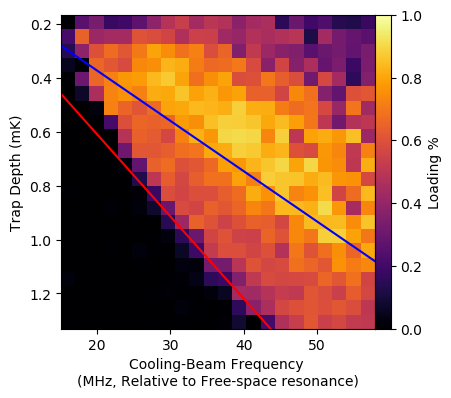

In [11]:
repsPerVar = 150
borders = [0,4,7,11,60,290,310,350,400,450,500]
errs, pixels, thresh, data = [[None for _ in range(len(borders)-1)] for _ in range(4)]
for bi in range(len(borders)-1):
    begin, end = borders[bi:bi+2]
    res = ma.standardPopulationAnalysis(grey_mol_file, [[2,2]], 0, 1, dataRange=np.arange(begin,end),
                                        picSlice=[begin*repsPerVar,repsPerVar*end], quiet=True);
    errs[bi], thresh[bi], pixels[bi], data[bi] = res[4][0], res[1][0], res[0][0], res[5][0]
with exp.ExpFile(grey_mol_file) as f:
    kn, key_grey = f.get_key()
avg_combined_grey = []
errsCombined = []
for e, l in zip(errs, data):
    avg_combined_grey += l
    errsCombined += e
single_atom_analysis_(None, 'Single_Atom_Grey_2D_Scan', realsize=True, data=avg_combined_grey, err=errsCombined, 
                      key=key_grey, units='grey', save=True, showVals=False)

In [12]:
key_scaled = []
for k in key_grey:
    key_scaled.append([D1_DacToFreq.f(k[0]), TweezerPowerToDepth.f(k[1])])

In [13]:
scaledXpts = []
selPts = []
offsetFactor = (20.8 + 12.0) # times depth
for k, p in zip(key_scaled, avg_combined_grey):
    if k[1] > 0.6:
        scaledXpts.append((k[0] - k[1] * offsetFactor)/k[1] / 20.8)
        selPts.append(p)

In [14]:
bins_r = np.arange( -0.5, 3, 0.05 )
binData = [[] for _ in bins_r]

In [15]:
for x, p in zip(scaledXpts,selPts):
    # find the bin
    for i, b in enumerate(bins_r):
        if b > x:
            binData[i].append(p)
            break

In [16]:
binAvgs = [np.mean(d) for d in binData]
binStds = [np.std(d) for d in binData]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning:

Mean of empty slice.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars



### Tobias's original style

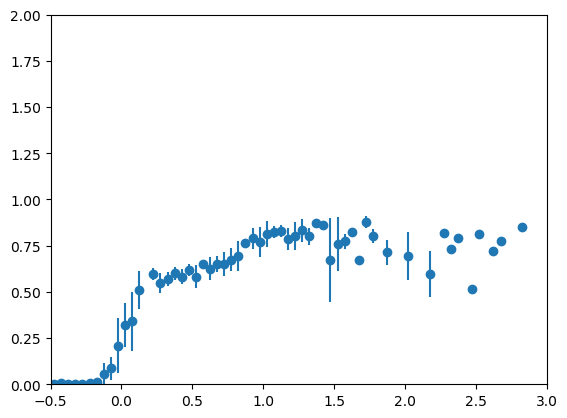

In [17]:
errorbar(arr(bins_r) - 0.025, binAvgs,yerr=binStds,marker='o',linestyle='')
xlim(-0.5,3)
ylim(0,2);

#### to pick a point for the baseline line and for coloring

In [18]:
for i, x in enumerate(loadingdatax):
    if x > 0.1:
        print(i)
        break

6


### main plot

In [27]:
import matplotlib as mpl
mpl.rc('font', family='cmr10') 
mpl.rcParams['mathtext.fontset'] = 'cm'
#mpl.rc('font', serif='Helvetica Neue') 
mpl.rc('font', size=9) 

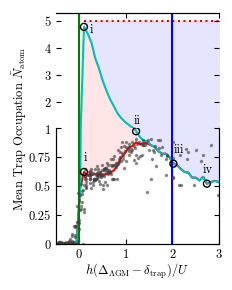

In [33]:
f = figure()
at = f.add_subplot(111)
at.spines['top'].set_color('none')
at.spines['bottom'].set_color('none')
at.spines['left'].set_color('none')
at.spines['right'].set_color('none')
at.set_xticks([])
at.set_yticks([])
at.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
at.set_ylabel(r'Mean Trap Occupation $\bar{N}_{\mathrm{atom}}$',labelpad=20)
axs = [f.add_subplot(211), f.add_subplot(212)]
f.subplots_adjust(hspace=0)

basex = loadingdatax[6:]
basey = np.ones_like(basex)*5

#axs[0].errorbar( scaledXpts, selPts, linestyle='', marker='.',color='grey', markersize=10, alpha=0.5 )
axs[0].plot( loadingdatax, ldy, color='r' )
axs[0].plot( simdatatracex, sdty, color='c')
axs[0].plot(basex,basey,':r')
axs[0].set_ylim( 1,5.3 )
axs[0].set_yticks([2,3,4,5])
axs[0].set_xlim( -0.5, 3)
sax0 = axs[0].twinx()
sax0.set_ylim(axs[0].get_ylim())
sax0.set_yticks([2,3,4,5])
sax0.set_yticklabels([])
for a in [axs[0], sax0]:    
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.tick_top()
    a.get_yaxis().set_tick_params(direction='in')
    a.get_xaxis().set_tick_params(direction='in')
    a.set_xticklabels([])
axs[0].fill_between(loadingdatax, ldy,sdty,color='r',alpha=0.1)
axs[0].fill_between(basex, basey, sdty[6:],color='b',alpha=0.1)

axs[1].errorbar( scaledXpts, selPts, linestyle='', marker='.',color='#404040', markersize=3, alpha=0.5 )
axs[1].plot( simdatatracex, sdty, color='c' )
axs[1].plot( loadingdatax, ldy, color='r',zorder=0 )
axs[1].set_xlim( -0.5, 3 )
axs[1].fill_between(loadingdatax, ldy,sdty,color='r',alpha=0.1)
axs[1].fill_between(basex, basey, sdty[6:],color='b',alpha=0.1)
axs[1].set_yticklabels([0,0.25,0.5,0.75,1])
sax1 = axs[1].twinx()
sax1.set_ylim(axs[1].get_ylim())
sax1.set_yticklabels([])
for a in [axs[1], sax1]:
    a.set_ylim( 0, 1 )
    a.spines['top'].set_visible(False)
    a.get_yaxis().set_tick_params(direction='in')
    a.get_xaxis().set_tick_params(direction='in')
axs[1].set_xlabel(r'$h(\Delta_{\mathrm{\Lambda GM}} - \delta_{\mathrm{trap}})/U$',labelpad=-0)
axs[1].axvline(0,color='g')
axs[1].axvline(2,color='b')
axs[0].axvline(0,color='g')
axs[0].axvline(2,color='b')
axs[0].scatter([loadingdatax[6]],[sdty[6]],marker='o', zorder=6,facecolors='none', edgecolors='k',s=25);
axs[0].text(loadingdatax[6]+0.12,sdty[6]-0.2,'i')
axs[1].text(loadingdatax[6],ldy[6]+0.1,'i')

axs[1].scatter([loadingdatax[6],loadingdatax[6],loadingdatax[20],loadingdatax[30],loadingdatax[39]],[ldy[6],sdty[6],sdty[20],sdty[30],sdty[39]],
               marker='o',facecolors='none', edgecolors='k', zorder=6,s=25);
axs[0].text(loadingdatax[20]-0.05,sdty[20]+0.2,'ii')
axs[1].text(loadingdatax[30]+0.01,sdty[30]+0.1,'iii')
axs[1].text(loadingdatax[39]-0.1,sdty[39]+0.1,'iv')
f.set_size_inches([2.1,3])

savefig('fig2d.svg', transparent=True, pad_inches=0, dpi=400)

### Atom # histograms

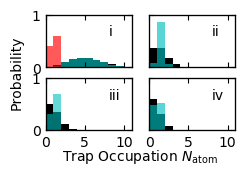

In [20]:
f, ax = subplots(2,2,sharex=True, sharey=True, figsize=(2,5))
a = ax[0,0]
a.hist(pd1, weights=np.ones_like(pd1)/float(len(pd1)),bins=np.arange(0, 14, 1), color='k')
a.hist(hd1, weights=np.ones_like(hd1)/float(len(hd1)),alpha=0.65, bins=np.arange(0, 14, 1),color='c')
a.hist(hd1r, weights=np.ones_like(hd1r)/float(len(hd1r)),alpha=0.65, bins=np.arange(0, 14, 1),color='r')
a.set_ylim(0,1)
a.set_xlim(0,11)
a.set_xticks([0,5,10])
a = ax[0,1]
a.hist(pd2, weights=np.ones_like(pd2)/float(len(pd2)), bins=np.arange(0, 14, 1),color='k')
a.hist(hd2, weights=np.ones_like(hd2)/float(len(hd2)),alpha=0.65, bins=np.arange(0, 14, 1),color='c')
a = ax[1,0]
a.hist(pd3, weights=np.ones_like(pd3)/float(len(pd3)), bins=np.arange(0, 14, 1),color='k')
a.hist(hd3, weights=np.ones_like(hd3)/float(len(hd3)),alpha=0.6, bins=np.arange(0, 14, 1),color='c')
a = ax[1,1]
a.hist(pd4, weights=np.ones_like(pd4)/float(len(pd4)), bins=np.arange(0, 14, 1),color='k')
a.hist(hd4, weights=np.ones_like(hd4)/float(len(hd4)),alpha=0.65, bins=np.arange(0, 14, 1),color='c')
for txt, a in zip(['i','ii','iii','iv'], ax.flatten()):
    a.get_yaxis().set_tick_params(direction='in')
    a.get_xaxis().set_tick_params(direction='in')
    a.text(8,0.6,txt)
    a_x = a.twinx()
    a_x.set_yticklabels([])
    a_x.get_yaxis().set_tick_params(direction='in')
    a_y = a.twiny()
    a_y.set_xlim(0,11)
    a_y.set_xticks([0,5,10])
    a_y.set_xticklabels([])
    a_y.get_xaxis().set_tick_params(direction='in')
a = f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
grid(False)
f.set_size_inches([2.45,1.5])
yticks([])
xticks([])
ylabel( 'Probability', labelpad=15.5 )
xlabel( r'Trap Occupation $N_{\mathrm{atom}}$', labelpad=12);
savefig('fig2e.svg', transparent=True, pad_inches=0, dpi=400)

## squiggle for axis

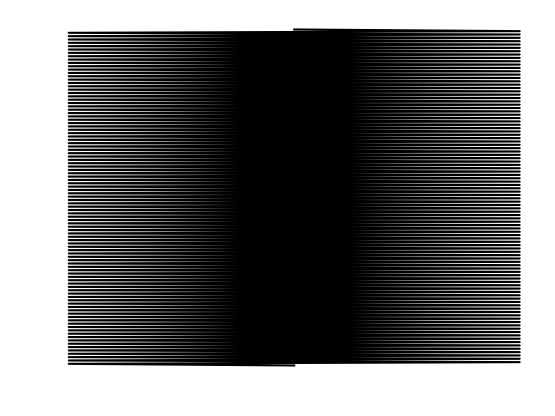

In [35]:
f, ax = subplots()
ax.axis('Off')
xpts = [0] + [-1,1] * 100 + [0]
ypts = np.arange(0,202,1)
ax.plot(xpts,ypts,'k')
savefig('squiggle.svg',transparent=True)

## molecule figures

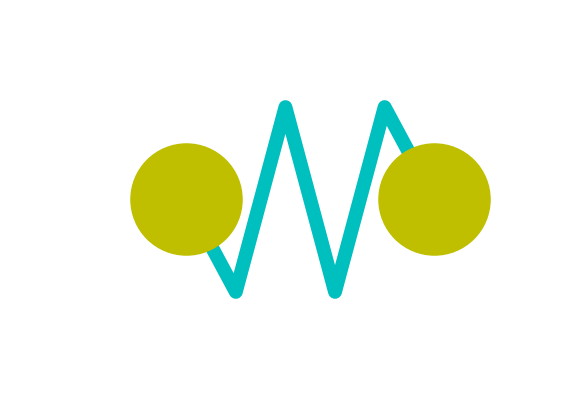

In [36]:
f, ax = subplots()
thunderbolt2D(ax,0,1,0, lineargs={'linewidth':10,'color':'c'},pointargs={'color':'y','markersize':80})
ax.axis('off')
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.2,0.2)
savefig('blue_molecule.svg', transparent=True, pad_inches=0, dpi=400)

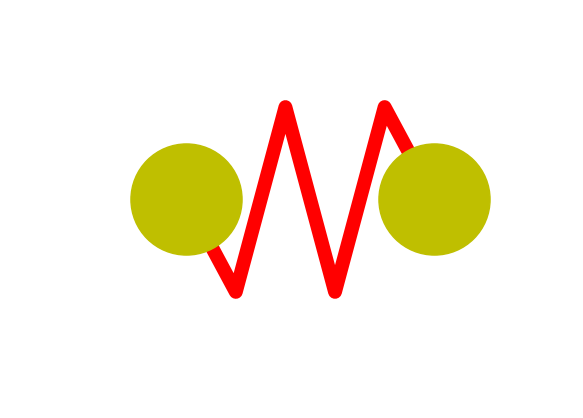

In [37]:
f, ax = subplots()
thunderbolt2D(ax,0,1,0, lineargs={'linewidth':10,'color':'r'},pointargs={'color':'y','markersize':80})
ax.axis('off')
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.2,0.2)
savefig('red_molecule.svg', transparent=True, pad_inches=0, dpi=400)